In [1]:
%matplotlib inline
import argparse

from ems.algorithms.analysis.analyze_percent_coverage import AnalyzePercentCoverage
from ems.algorithms.selection.dispatch_fastest_ambulance import BestTravelTimeAlgorithm
from ems.data.filters import kmeans_select_bases
from ems.data.tijuana import CSVTijuanaDataset
from ems.models.ambulance import Ambulance
from ems.settings import Settings
from ems.simulators.dispatcher_simulator import DispatcherSimulator

def go(settings:str="small_hans", ambulances:int = 7, bases:int = 7):

    clargs = argparse.Namespace(settings=settings, ambulances = ambulances, bases = bases)

    # Initialize settings
    settings = Settings(debug=True,
                        args=clargs
                       )

    # Initialize dataset
    dataset = CSVTijuanaDataset(demands_file_path=settings.demands_file,
                                bases_file_path=settings.bases_file,
                                cases_file_path=settings.cases_file,
                                travel_times_file_path=settings.travel_times_file)

    # Initialize ambulance_selection
    ambulance_select = BestTravelTimeAlgorithm(travel_times=dataset.travel_times)

    # Initialize demand_coverage
    determine_coverage = []
    determine_coverage.append(AnalyzePercentCoverage(travel_times=dataset.travel_times))

    # Select bases
    chosen_base_locations = kmeans_select_bases(dataset.bases, dataset.travel_times)

    # Generate ambulances - random base placement (may want to abstract into function)
    ambulances = []
    for index in range(settings.num_ambulances):
        ambulance = Ambulance(id=index,
                              base=chosen_base_locations[index],
                              location=chosen_base_locations[index])
        ambulances.append(ambulance)

    # Initialize the simulator
    sim = DispatcherSimulator(ambulances=ambulances,
                              cases=dataset.cases,
                              ambulance_selector=ambulance_select,
                              coverage_alg=determine_coverage,
                              plot=settings.plot
                              )

    # Start the whole thing
    finished_cases = sim.run()



Default init_bases(): Kmeans init bases

Current Time: 2014-01-01 00:13:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 138 which was recorded at 2014-01-01 00:13:00
Ambulance 5 chosen with one-way travel time 0:09:42 (total duration: 0 days 00:39:24)
Deploying ambulance 5 at time 2014-01-01 00:13:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [5]
Pending cases:  []

Current Time: 2014-01-01 00:21:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 36 which was recorded at 2014-01-01 00:21:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-01 00:21:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 5]
Pending cases:  []

Current Time: 2014-01-01 00:46:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 141 which was recorded at 2014-01-01 00:46:00
Ambulance 1 chosen with one-way travel time 0:07:24 (total duration: 0 days 00:34:48)
Deploying ambulance 1 at t

Coverage: 85.0 %. 
Retiring ambulance 6 at time 2014-01-01 07:58:22
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-01 08:01:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 26 which was recorded at 2014-01-01 08:01:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-01 08:01:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-01 08:33:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 112 which was recorded at 2014-01-01 08:33:00
Ambulance 2 chosen with one-way travel time 0:07:29 (total duration: 0 days 00:34:58)
Deploying ambulance 2 at time 2014-01-01 08:33:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2]
Pending cases:  []

Current Time: 2014-01-01 08:36:00
Current Event: Start Case
Coverage: 55.00000000000001 %. 
Starting case 6 which was recorded at 2014-01-01 08:36:00
Ambulance 3 chosen with one-way t

Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-01 12:08:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-01 12:20:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 114 which was recorded at 2014-01-01 12:20:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-01 12:20:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-01 12:53:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 8 which was recorded at 2014-01-01 12:53:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-01 12:53:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-01 12:58:00
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-01-01 12:58:00
Busy ambulances:  [3]
Pending cases:  []

Current 

Coverage: 71.0 %. 
Starting case 12 which was recorded at 2014-01-01 17:24:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-01 17:24:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-01 17:40:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 145 which was recorded at 2014-01-01 17:40:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-01-01 17:40:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-01 17:50:00
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 0 at time 2014-01-01 17:50:00
Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-01-01 17:56:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 119 which was recorded at 2014-01-01 17:56:00
Ambulance 0 chosen with one-

Coverage: 71.0 %. 
Starting case 15 which was recorded at 2014-01-01 21:50:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-01 21:50:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-01 21:55:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 134 which was recorded at 2014-01-01 21:55:00
Ambulance 6 chosen with one-way travel time 0:08:16 (total duration: 0 days 00:36:32)
Deploying ambulance 6 at time 2014-01-01 21:55:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-01 22:05:00
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 0 at time 2014-01-01 22:05:00
Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-01-01 22:16:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 94 which was recorded at 2014-01-01 22:16:00
Ambulance 0 chosen with one-w

Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-02 04:21:16
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-02 05:04:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 137 which was recorded at 2014-01-02 05:04:00
Ambulance 0 chosen with one-way travel time 0:06:21 (total duration: 0 days 00:32:42)
Deploying ambulance 0 at time 2014-01-02 05:04:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-02 05:36:42
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-02 05:36:42
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-02 05:59:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 19 which was recorded at 2014-01-02 05:59:00
Ambulance 1 chosen with one-way travel time 0:07:33 (total duration: 0 days 00:35:06)
Deploying ambulance 1 at time 2014-01-02 05:59:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1]
Pending cases:  []

Current Tim

Coverage: 30.0 %. 
Starting case 53 which was recorded at 2014-01-02 09:22:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-02 09:22:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-02 09:30:24
Current Event: Retire Ambulance
Coverage: 18.0 %. 
Retiring ambulance 5 at time 2014-01-02 09:30:24
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-02 09:35:22
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 6 at time 2014-01-02 09:35:22
Busy ambulances:  [0, 1, 3, 4]
Pending cases:  []

Current Time: 2014-01-02 09:42:00
Current Event: Start Case
Coverage: 36.0 %. 
Starting case 104 which was recorded at 2014-01-02 09:42:00
Ambulance 5 chosen with one-way travel time 0:09:42 (total duration: 0 days 00:39:24)
Deploying ambulance 5 at time 2014-01-02 09:42:00
Delay on this case: 0 days 00:00:00
Busy ambu

Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-02 11:40:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-02 12:12:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 124 which was recorded at 2014-01-02 12:12:00
Ambulance 0 chosen with one-way travel time 0:09:29 (total duration: 0 days 00:38:58)
Deploying ambulance 0 at time 2014-01-02 12:12:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-02 12:21:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 45 which was recorded at 2014-01-02 12:21:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-02 12:21:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-02 12:50:58
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-01-02 12:50:58
Busy ambulances:  [3]
Pending cases:  []

Current

Coverage: 73.0 %. 
Retiring ambulance 3 at time 2014-01-02 16:41:56
Busy ambulances:  [6]
Pending cases:  []

Current Time: 2014-01-02 16:52:22
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 6 at time 2014-01-02 16:52:22
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-02 17:03:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 126 which was recorded at 2014-01-02 17:03:00
Ambulance 0 chosen with one-way travel time 0:09:58 (total duration: 0 days 00:39:56)
Deploying ambulance 0 at time 2014-01-02 17:03:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-02 17:36:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 35 which was recorded at 2014-01-02 17:36:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-02 17:36:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current

Coverage: 69.0 %. 
Retiring ambulance 1 at time 2014-01-02 20:43:58
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-01-02 21:04:18
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 4 at time 2014-01-02 21:04:18
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-02 21:18:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 66 which was recorded at 2014-01-02 21:18:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-02 21:18:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-02 21:56:00
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-02 21:56:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-02 22:00:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 77 which was recorded at 2014-01-02 22:00:00
Ambulance 0 chosen with one-way travel time 0:09:0

Coverage: 50.0 %. 
Retiring ambulance 6 at time 2014-01-03 02:41:22
Busy ambulances:  [0, 2]
Pending cases:  []

Current Time: 2014-01-03 02:51:00
Current Event: Retire Ambulance
Coverage: 55.00000000000001 %. 
Retiring ambulance 0 at time 2014-01-03 02:51:00
Busy ambulances:  [2]
Pending cases:  []

Current Time: 2014-01-03 03:16:46
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 2 at time 2014-01-03 03:16:46
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-03 04:41:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 65 which was recorded at 2014-01-03 04:41:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-03 04:41:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-03 04:42:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 62 which was recorded at 2014-01-03 04:42:00
Ambulance 3 chosen with one-way t

Coverage: 65.0 %. 
Starting case 234 which was recorded at 2014-01-03 08:18:00
Ambulance 0 chosen with one-way travel time 0:05:33 (total duration: 0 days 00:31:06)
Deploying ambulance 0 at time 2014-01-03 08:18:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4, 5]
Pending cases:  []

Current Time: 2014-01-03 08:20:00
Current Event: Start Case
Coverage: 38.0 %. 
Starting case 151 which was recorded at 2014-01-03 08:20:00
Ambulance 6 chosen with one-way travel time 0:11:18 (total duration: 0 days 00:42:36)
Deploying ambulance 6 at time 2014-01-03 08:20:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-03 08:20:00
Current Event: Start Case
Coverage: 30.0 %. 
Starting case 148 which was recorded at 2014-01-03 08:20:00
Ambulance 3 chosen with one-way travel time 0:16:59 (total duration: 0 days 00:53:58)
Deploying ambulance 3 at time 2014-01-03 08:20:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 

Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-03 10:14:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-03 10:28:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 154 which was recorded at 2014-01-03 10:28:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-03 10:28:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-03 11:02:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 183 which was recorded at 2014-01-03 11:02:00
Ambulance 6 chosen with one-way travel time 0:06:29 (total duration: 0 days 00:32:58)
Deploying ambulance 6 at time 2014-01-03 11:02:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-01-03 11:06:00
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 0 at time 2014-01-03 11:06:00
Busy ambulances:  [6]
Pending cases:  []

Curren

Coverage: 50.0 %. 
Retiring ambulance 3 at time 2014-01-03 13:26:56
Busy ambulances:  [1, 4, 6]
Pending cases:  []

Current Time: 2014-01-03 13:31:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 189 which was recorded at 2014-01-03 13:31:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-03 13:31:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4, 6]
Pending cases:  []

Current Time: 2014-01-03 13:36:00
Current Event: Start Case
Coverage: 37.0 %. 
Starting case 159 which was recorded at 2014-01-03 13:36:00
Ambulance 5 chosen with one-way travel time 0:14:55 (total duration: 0 days 00:49:50)
Deploying ambulance 5 at time 2014-01-03 13:36:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-03 13:37:22
Current Event: Retire Ambulance
Coverage: 30.0 %. 
Retiring ambulance 6 at time 2014-01-03 13:37:22
Busy ambulances:  [0, 1

Coverage: 54.0 %. 
Retiring ambulance 3 at time 2014-01-03 15:20:56
Busy ambulances:  [0, 4, 5]
Pending cases:  []

Current Time: 2014-01-03 15:23:10
Current Event: Retire Ambulance
Coverage: 63.0 %. 
Retiring ambulance 4 at time 2014-01-03 15:23:10
Busy ambulances:  [0, 5]
Pending cases:  []

Current Time: 2014-01-03 15:26:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 158 which was recorded at 2014-01-03 15:26:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-03 15:26:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 5]
Pending cases:  []

Current Time: 2014-01-03 15:30:00
Current Event: Retire Ambulance
Coverage: 57.99999999999999 %. 
Retiring ambulance 5 at time 2014-01-03 15:30:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-03 15:33:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 162 which was recorded at 2014-01-03 15:33:00
Ambulance 1 cho

Coverage: 56.99999999999999 %. 
Retiring ambulance 3 at time 2014-01-03 19:38:24
Busy ambulances:  [1, 6]
Pending cases:  []

Current Time: 2014-01-03 19:50:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 198 which was recorded at 2014-01-03 19:50:00
Ambulance 0 chosen with one-way travel time 0:08:13 (total duration: 0 days 00:36:26)
Deploying ambulance 0 at time 2014-01-03 19:50:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-01-03 19:57:34
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 6 at time 2014-01-03 19:57:34
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-03 20:16:10
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 1 at time 2014-01-03 20:16:10
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-03 20:26:26
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-03 20:26:26
Busy ambulances:  []
Pendi

Coverage: 44.0 %. 
Starting case 83 which was recorded at 2014-01-03 23:45:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-03 23:45:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-03 23:47:00
Current Event: Start Case
Coverage: 32.0 %. 
Starting case 213 which was recorded at 2014-01-03 23:47:00
Ambulance 2 chosen with one-way travel time 0:06:45 (total duration: 0 days 00:33:30)
Deploying ambulance 2 at time 2014-01-03 23:47:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 6]
Pending cases:  []

Current Time: 2014-01-03 23:50:42
Current Event: Retire Ambulance
Coverage: 14.000000000000002 %. 
Retiring ambulance 6 at time 2014-01-03 23:50:42
Busy ambulances:  [0, 1, 2, 3]
Pending cases:  []

Current Time: 2014-01-03 23:55:14
Current Event: Retire Ambulance
Coverage: 22.0 %. 
Retiring ambulance 0 at time 2014-01-03 23:55:14
B

Coverage: 80.0 %. 
Starting case 254 which was recorded at 2014-01-04 07:01:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-04 07:01:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-04 07:09:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 302 which was recorded at 2014-01-04 07:09:00
Ambulance 1 chosen with one-way travel time 0:08:34 (total duration: 0 days 00:37:08)
Deploying ambulance 1 at time 2014-01-04 07:09:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-01-04 07:20:56
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 3 at time 2014-01-04 07:20:56
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-04 07:39:00
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 0 at time 2014-01-04 07:39:00
Busy ambulances:  [1]
Pending ca

Coverage: 54.0 %. 
Retiring ambulance 0 at time 2014-01-04 12:39:00
Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-01-04 12:43:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 364 which was recorded at 2014-01-04 12:43:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-04 12:43:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-04 12:44:00
Current Event: Start Case
Coverage: 54.0 %. 
Starting case 248 which was recorded at 2014-01-04 12:44:00
Ambulance 1 chosen with one-way travel time 0:18:05 (total duration: 0 days 00:56:10)
Deploying ambulance 1 at time 2014-01-04 12:44:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-04 13:02:56
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 3 at time 2014-01-04 13:02:56
Busy ambulances:  [0, 1, 6]
Pend

Coverage: 46.0 %. 
Starting case 297 which was recorded at 2014-01-04 15:04:00
Ambulance 1 chosen with one-way travel time 0:16:04 (total duration: 0 days 00:52:08)
Deploying ambulance 1 at time 2014-01-04 15:04:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 5, 6]
Pending cases:  []

Current Time: 2014-01-04 15:05:00
Current Event: Start Case
Coverage: 19.0 %. 
Starting case 267 which was recorded at 2014-01-04 15:05:00
Ambulance 3 chosen with one-way travel time 0:15:05 (total duration: 0 days 00:50:10)
Deploying ambulance 3 at time 2014-01-04 15:05:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-04 15:06:44
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 5 at time 2014-01-04 15:06:44
Busy ambulances:  [0, 1, 2, 3, 6]
Pending cases:  []

Current Time: 2014-01-04 15:21:20
Current Event: Retire Ambulance
Coverage: 14.000000000000002 %. 
Retiring ambulance 6 at tim

Coverage: 25.0 %. 
Retiring ambulance 0 at time 2014-01-04 16:59:00
Busy ambulances:  [1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-04 17:00:00
Current Event: Start Case
Coverage: 50.0 %. 
Starting case 366 which was recorded at 2014-01-04 17:00:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-04 17:00:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-04 17:02:56
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 3 at time 2014-01-04 17:02:56
Busy ambulances:  [0, 1, 4, 6]
Pending cases:  []

Current Time: 2014-01-04 17:07:02
Current Event: Retire Ambulance
Coverage: 37.0 %. 
Retiring ambulance 1 at time 2014-01-04 17:07:02
Busy ambulances:  [0, 4, 6]
Pending cases:  []

Current Time: 2014-01-04 17:08:46
Current Event: Retire Ambulance
Coverage: 59.0 %. 
Retiring ambulance 6 at time 2014-01-04 17:08:46
Busy ambulances

Coverage: 42.0 %. 
Retiring ambulance 5 at time 2014-01-04 19:20:28
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-04 19:21:10
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 1 at time 2014-01-04 19:21:10
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-04 19:27:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 261 which was recorded at 2014-01-04 19:27:00
Ambulance 4 chosen with one-way travel time 0:06:59 (total duration: 0 days 00:33:58)
Deploying ambulance 4 at time 2014-01-04 19:27:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-01-04 19:29:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 334 which was recorded at 2014-01-04 19:29:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-04 19:29:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4]
Pending cases:  

Coverage: 25.0 %. 
Starting case 276 which was recorded at 2014-01-04 21:29:00
Ambulance 2 chosen with one-way travel time 0:07:33 (total duration: 0 days 00:35:06)
Deploying ambulance 2 at time 2014-01-04 21:29:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-04 21:45:12
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 0 at time 2014-01-04 21:45:12
Busy ambulances:  [1, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-04 21:50:00
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 6 at time 2014-01-04 21:50:00
Busy ambulances:  [1, 2, 3, 4]
Pending cases:  []

Current Time: 2014-01-04 21:50:56
Current Event: Retire Ambulance
Coverage: 42.0 %. 
Retiring ambulance 3 at time 2014-01-04 21:50:56
Busy ambulances:  [1, 2, 4]
Pending cases:  []

Current Time: 2014-01-04 21:51:00
Current Event: Start Case
Coverage: 51.0 %. 
Starting case 294 which was recorded at 2014-


Current Time: 2014-01-04 23:36:00
Current Event: Start Case
Coverage: 7.000000000000001 %. 
Starting case 299 which was recorded at 2014-01-04 23:36:00
Ambulance 5 chosen with one-way travel time 0:12:15 (total duration: 0 days 00:44:30)
Deploying ambulance 5 at time 2014-01-04 23:36:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-05 00:00:22
Current Event: Retire Ambulance
Coverage: 0.0 %. 
Retiring ambulance 6 at time 2014-01-05 00:00:22
Busy ambulances:  [0, 1, 2, 3, 4, 5]
Pending cases:  []

Current Time: 2014-01-05 00:10:10
Current Event: Retire Ambulance
Coverage: 11.0 %. 
Retiring ambulance 1 at time 2014-01-05 00:10:10
Busy ambulances:  [0, 2, 3, 4, 5]
Pending cases:  []

Current Time: 2014-01-05 00:12:22
Current Event: Retire Ambulance
Coverage: 38.0 %. 
Retiring ambulance 0 at time 2014-01-05 00:12:22
Busy ambulances:  [2, 3, 4, 5]
Pending cases:  []

Current Time: 2014-01-05 00:20:30
Current Event: Ret

Coverage: 40.0 %. 
Retiring ambulance 1 at time 2014-01-05 03:36:10
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-05 03:38:00
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-01-05 03:38:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-01-05 03:56:56
Current Event: Retire Ambulance
Coverage: 80.0 %. 
Retiring ambulance 3 at time 2014-01-05 03:56:56
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-05 04:06:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 280 which was recorded at 2014-01-05 04:06:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-05 04:06:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-05 04:40:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 375 which was recorded at 2014-01-05 04:40:00
Ambulance 6 chosen with one-way travel time 

Coverage: 74.0 %. 
Starting case 310 which was recorded at 2014-01-05 09:30:00
Ambulance 0 chosen with one-way travel time 0:06:35 (total duration: 0 days 00:33:10)
Deploying ambulance 0 at time 2014-01-05 09:30:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-05 09:46:22
Current Event: Retire Ambulance
Coverage: 55.00000000000001 %. 
Retiring ambulance 6 at time 2014-01-05 09:46:22
Busy ambulances:  [0, 4, 5]
Pending cases:  []

Current Time: 2014-01-05 09:49:12
Current Event: Retire Ambulance
Coverage: 63.0 %. 
Retiring ambulance 4 at time 2014-01-05 09:49:12
Busy ambulances:  [0, 5]
Pending cases:  []

Current Time: 2014-01-05 09:54:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 306 which was recorded at 2014-01-05 09:54:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-05 09:54:00
Delay on this case: 0 days 00:00:00
Busy ambulanc

Coverage: 50.0 %. 
Retiring ambulance 0 at time 2014-01-05 12:28:00
Busy ambulances:  [3, 5, 6]
Pending cases:  []

Current Time: 2014-01-05 12:29:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 326 which was recorded at 2014-01-05 12:29:00
Ambulance 0 chosen with one-way travel time 0:13:19 (total duration: 0 days 00:46:38)
Deploying ambulance 0 at time 2014-01-05 12:29:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-05 12:30:34
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 5 at time 2014-01-05 12:30:34
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-05 12:43:00
Current Event: Start Case
Coverage: 54.0 %. 
Starting case 307 which was recorded at 2014-01-05 12:43:00
Ambulance 1 chosen with one-way travel time 0:18:05 (total duration: 0 days 00:56:10)
Deploying ambulance 1 at time 2014-01-05 12:43:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6

Coverage: 50.0 %. 
Starting case 313 which was recorded at 2014-01-05 16:32:00
Ambulance 1 chosen with one-way travel time 0:11:35 (total duration: 0 days 00:43:10)
Deploying ambulance 1 at time 2014-01-05 16:32:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 6]
Pending cases:  []

Current Time: 2014-01-05 16:41:00
Current Event: Start Case
Coverage: 26.0 %. 
Starting case 323 which was recorded at 2014-01-05 16:41:00
Ambulance 3 chosen with one-way travel time 0:08:00 (total duration: 0 days 00:36:00)
Deploying ambulance 3 at time 2014-01-05 16:41:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 6]
Pending cases:  []

Current Time: 2014-01-05 16:45:58
Current Event: Retire Ambulance
Coverage: 14.000000000000002 %. 
Retiring ambulance 6 at time 2014-01-05 16:45:58
Busy ambulances:  [0, 1, 2, 3]
Pending cases:  []

Current Time: 2014-01-05 16:52:00
Current Event: Retire Ambulance
Coverage: 22.0 %. 
Retiring ambulance 0 at time 2014-01-05 16:52:00


Coverage: 64.0 %. 
Retiring ambulance 3 at time 2014-01-05 21:13:32
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-01-05 21:28:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 531 which was recorded at 2014-01-05 21:28:00
Ambulance 0 chosen with one-way travel time 0:04:59 (total duration: 0 days 00:29:58)
Deploying ambulance 0 at time 2014-01-05 21:28:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-05 21:34:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 340 which was recorded at 2014-01-05 21:34:00
Ambulance 6 chosen with one-way travel time 0:07:39 (total duration: 0 days 00:35:18)
Deploying ambulance 6 at time 2014-01-05 21:34:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-01-05 21:39:48
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 1 at time 2014-01-05 21:39:48
Busy ambulances:  [0, 6]
Pending cases:  

Coverage: 73.0 %. 
Retiring ambulance 3 at time 2014-01-06 02:26:28
Busy ambulances:  [6]
Pending cases:  []

Current Time: 2014-01-06 02:27:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 324 which was recorded at 2014-01-06 02:27:00
Ambulance 0 chosen with one-way travel time 0:09:42 (total duration: 0 days 00:39:24)
Deploying ambulance 0 at time 2014-01-06 02:27:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-01-06 02:56:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 361 which was recorded at 2014-01-06 02:56:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-06 02:56:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-06 03:04:38
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 6 at time 2014-01-06 03:04:38
Busy ambulances:  [0, 3]
Pending cases:  

Coverage: 54.0 %. 
Starting case 399 which was recorded at 2014-01-06 09:38:00
Ambulance 1 chosen with one-way travel time 0:11:49 (total duration: 0 days 00:43:38)
Deploying ambulance 1 at time 2014-01-06 09:38:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-06 09:47:00
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 0 at time 2014-01-06 09:47:00
Busy ambulances:  [1, 3, 6]
Pending cases:  []

Current Time: 2014-01-06 09:51:00
Current Event: Start Case
Coverage: 56.99999999999999 %. 
Starting case 451 which was recorded at 2014-01-06 09:51:00
Ambulance 0 chosen with one-way travel time 0:07:07 (total duration: 0 days 00:34:14)
Deploying ambulance 0 at time 2014-01-06 09:51:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-06 09:58:00
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 3 at time 2014-01-06 09:58:00
Busy am

Coverage: 64.0 %. 
Starting case 443 which was recorded at 2014-01-06 12:39:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-06 12:39:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-01-06 12:40:44
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 3 at time 2014-01-06 12:40:44
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-06 12:54:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 385 which was recorded at 2014-01-06 12:54:00
Ambulance 6 chosen with one-way travel time 0:11:19 (total duration: 0 days 00:42:38)
Deploying ambulance 6 at time 2014-01-06 12:54:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-01-06 13:03:06
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 1 at time 2014-01-06 13:03:06
Busy ambulances:  [0, 6]
Pend

Coverage: 46.0 %. 
Starting case 406 which was recorded at 2014-01-06 16:09:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-01-06 16:09:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 6]
Pending cases:  []

Current Time: 2014-01-06 16:13:00
Current Event: Start Case
Coverage: 38.0 %. 
Starting case 416 which was recorded at 2014-01-06 16:13:00
Ambulance 4 chosen with one-way travel time 0:14:57 (total duration: 0 days 00:49:54)
Deploying ambulance 4 at time 2014-01-06 16:13:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-06 16:20:22
Current Event: Retire Ambulance
Coverage: 31.0 %. 
Retiring ambulance 2 at time 2014-01-06 16:20:22
Busy ambulances:  [0, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-06 16:22:00
Current Event: Start Case
Coverage: 47.0 %. 
Starting case 427 which was recorded at 2014-01-06 16:22:00
Ambulance

Coverage: 89.0 %. 
Starting case 392 which was recorded at 2014-01-06 18:32:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-06 18:32:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-06 18:38:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 418 which was recorded at 2014-01-06 18:38:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-06 18:38:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-06 18:50:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 437 which was recorded at 2014-01-06 18:50:00
Ambulance 1 chosen with one-way travel time 0:08:46 (total duration: 0 days 00:37:32)
Deploying ambulance 1 at time 2014-01-06 18:50:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending case

Coverage: 37.0 %. 
Retiring ambulance 5 at time 2014-01-06 20:37:30
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-01-06 20:37:56
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 1 at time 2014-01-06 20:37:56
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-01-06 20:42:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 420 which was recorded at 2014-01-06 20:42:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-06 20:42:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-06 20:44:58
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 6 at time 2014-01-06 20:44:58
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-06 20:46:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 400 which was recorded at 2014-01-06 20:46:00
Ambulance 1 chosen with one-

Coverage: 80.0 %. 
Retiring ambulance 3 at time 2014-01-07 01:36:32
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-07 01:46:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 393 which was recorded at 2014-01-07 01:46:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-07 01:46:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-07 02:01:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 410 which was recorded at 2014-01-07 02:01:00
Ambulance 3 chosen with one-way travel time 0:13:58 (total duration: 0 days 00:47:56)
Deploying ambulance 3 at time 2014-01-07 02:01:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-07 02:24:00
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-01-07 02:24:00
Busy ambulances:  [3]
Pending cases:  []

Curren

Coverage: 73.0 %. 
Retiring ambulance 1 at time 2014-01-07 07:39:44
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-07 07:47:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 472 which was recorded at 2014-01-07 07:47:00
Ambulance 1 chosen with one-way travel time 0:14:13 (total duration: 0 days 00:48:26)
Deploying ambulance 1 at time 2014-01-07 07:47:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-01-07 08:10:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 500 which was recorded at 2014-01-07 08:10:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-07 08:10:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-07 08:20:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 502 which was recorded at 2014-01-07 08:20:00
Ambulance 3 chosen with one-way travel time

Coverage: 89.0 %. 
Starting case 498 which was recorded at 2014-01-07 13:22:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-07 13:22:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-07 13:45:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 599 which was recorded at 2014-01-07 13:45:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-07 13:45:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-07 14:00:00
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-01-07 14:00:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-01-07 14:12:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 471 which was recorded at 2014-01-07 14:12:00
Ambulance 4 chosen with one-way trav

Coverage: 62.0 %. 
Starting case 504 which was recorded at 2014-01-07 18:16:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-01-07 18:16:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-07 18:16:00
Current Event: Start Case
Coverage: 54.0 %. 
Starting case 508 which was recorded at 2014-01-07 18:16:00
Ambulance 1 chosen with one-way travel time 0:18:05 (total duration: 0 days 00:56:10)
Deploying ambulance 1 at time 2014-01-07 18:16:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-07 18:21:00
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 0 at time 2014-01-07 18:21:00
Busy ambulances:  [1, 3, 6]
Pending cases:  []

Current Time: 2014-01-07 18:26:00
Current Event: Start Case
Coverage: 56.99999999999999 %. 
Starting case 518 which was recorded at 2014-01-07 18:26:00
Ambul

Coverage: 89.0 %. 
Starting case 473 which was recorded at 2014-01-07 21:32:00
Ambulance 0 chosen with one-way travel time 0:08:13 (total duration: 0 days 00:36:26)
Deploying ambulance 0 at time 2014-01-07 21:32:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-07 21:40:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 493 which was recorded at 2014-01-07 21:40:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-07 21:40:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-07 22:02:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 505 which was recorded at 2014-01-07 22:02:00
Ambulance 1 chosen with one-way travel time 0:07:33 (total duration: 0 days 00:35:06)
Deploying ambulance 1 at time 2014-01-07 22:02:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending case

Coverage: 69.0 %. 
Retiring ambulance 1 at time 2014-01-08 05:06:26
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-01-08 05:38:28
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 4 at time 2014-01-08 05:38:28
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-08 06:33:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 600 which was recorded at 2014-01-08 06:33:00
Ambulance 3 chosen with one-way travel time 0:09:06 (total duration: 0 days 00:38:12)
Deploying ambulance 3 at time 2014-01-08 06:33:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-01-08 06:51:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 588 which was recorded at 2014-01-08 06:51:00
Ambulance 1 chosen with one-way travel time 0:09:05 (total duration: 0 days 00:38:10)
Deploying ambulance 1 at time 2014-01-08 06:51:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 3]
Pending cases:  []

Curren

Coverage: 56.99999999999999 %. 
Retiring ambulance 3 at time 2014-01-08 13:07:56
Busy ambulances:  [2, 6]
Pending cases:  []

Current Time: 2014-01-08 13:13:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 584 which was recorded at 2014-01-08 13:13:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-08 13:13:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 6]
Pending cases:  []

Current Time: 2014-01-08 13:33:54
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 2 at time 2014-01-08 13:33:54
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-01-08 13:35:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 544 which was recorded at 2014-01-08 13:35:00
Ambulance 1 chosen with one-way travel time 0:12:18 (total duration: 0 days 00:44:36)
Deploying ambulance 1 at time 2014-01-08 13:35:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 

Coverage: 30.0 %. 
Retiring ambulance 1 at time 2014-01-08 15:20:10
Busy ambulances:  [0, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-08 15:42:00
Current Event: Retire Ambulance
Coverage: 55.00000000000001 %. 
Retiring ambulance 6 at time 2014-01-08 15:42:00
Busy ambulances:  [0, 4, 5]
Pending cases:  []

Current Time: 2014-01-08 15:47:00
Current Event: Start Case
Coverage: 63.0 %. 
Starting case 574 which was recorded at 2014-01-08 15:47:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-08 15:47:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4, 5]
Pending cases:  []

Current Time: 2014-01-08 15:51:00
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 0 at time 2014-01-08 15:51:00
Busy ambulances:  [3, 4, 5]
Pending cases:  []

Current Time: 2014-01-08 15:57:18
Current Event: Retire Ambulance
Coverage: 72.0 %. 
Retiring ambulance 4 at time 2014-01-08 15:57:18
Busy amb

Coverage: 73.0 %. 
Starting case 572 which was recorded at 2014-01-08 19:01:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-08 19:01:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-08 19:05:00
Current Event: Start Case
Coverage: 54.0 %. 
Starting case 561 which was recorded at 2014-01-08 19:05:00
Ambulance 1 chosen with one-way travel time 0:18:05 (total duration: 0 days 00:56:10)
Deploying ambulance 1 at time 2014-01-08 19:05:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-08 19:12:00
Current Event: Start Case
Coverage: 32.0 %. 
Starting case 557 which was recorded at 2014-01-08 19:12:00
Ambulance 4 chosen with one-way travel time 0:26:28 (total duration: 0 days 01:12:56)
Deploying ambulance 4 at time 2014-01-08 19:12:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 

Coverage: 47.0 %. 
Retiring ambulance 3 at time 2014-01-08 21:30:12
Busy ambulances:  [0, 4, 6]
Pending cases:  []

Current Time: 2014-01-08 21:36:00
Current Event: Start Case
Coverage: 59.0 %. 
Starting case 606 which was recorded at 2014-01-08 21:36:00
Ambulance 3 chosen with one-way travel time 0:09:31 (total duration: 0 days 00:39:02)
Deploying ambulance 3 at time 2014-01-08 21:36:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-08 21:38:00
Current Event: Retire Ambulance
Coverage: 47.0 %. 
Retiring ambulance 0 at time 2014-01-08 21:38:00
Busy ambulances:  [3, 4, 6]
Pending cases:  []

Current Time: 2014-01-08 22:06:22
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 6 at time 2014-01-08 22:06:22
Busy ambulances:  [3, 4]
Pending cases:  []

Current Time: 2014-01-08 22:15:02
Current Event: Retire Ambulance
Coverage: 76.0 %. 
Retiring ambulance 3 at time 2014-01-08 22:15:02
Busy ambulances:  [4]
Pendi

Coverage: 89.0 %. 
Starting case 631 which was recorded at 2014-01-09 06:42:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-09 06:42:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-09 06:52:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 617 which was recorded at 2014-01-09 06:52:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-09 06:52:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-09 06:56:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 646 which was recorded at 2014-01-09 06:56:00
Ambulance 6 chosen with one-way travel time 0:13:25 (total duration: 0 days 00:46:50)
Deploying ambulance 6 at time 2014-01-09 06:56:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending case

Coverage: 18.0 %. 
Retiring ambulance 1 at time 2014-01-09 09:46:10
Busy ambulances:  [0, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-09 09:50:56
Current Event: Retire Ambulance
Coverage: 43.0 %. 
Retiring ambulance 3 at time 2014-01-09 09:50:56
Busy ambulances:  [0, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-09 09:51:00
Current Event: Start Case
Coverage: 55.00000000000001 %. 
Starting case 633 which was recorded at 2014-01-09 09:51:00
Ambulance 2 chosen with one-way travel time 0:05:01 (total duration: 0 days 00:30:02)
Deploying ambulance 2 at time 2014-01-09 09:51:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-09 09:52:00
Current Event: Start Case
Coverage: 39.0 %. 
Starting case 699 which was recorded at 2014-01-09 09:52:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-09 09:52:00
Delay on this case: 0 days 00:00:00
Busy

Coverage: 44.0 %. 
Starting case 673 which was recorded at 2014-01-09 11:45:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-09 11:45:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-09 11:48:46
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 6 at time 2014-01-09 11:48:46
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-01-09 12:00:00
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 0 at time 2014-01-09 12:00:00
Busy ambulances:  [1, 3]
Pending cases:  []

Current Time: 2014-01-09 12:02:38
Current Event: Retire Ambulance
Coverage: 64.0 %. 
Retiring ambulance 1 at time 2014-01-09 12:02:38
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-01-09 12:14:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 611 which was recorded at 2014-01-09 12:14:00
Ambulance 0 chosen wit

Ambulance 3 chosen with one-way travel time 0:09:31 (total duration: 0 days 00:39:02)
Deploying ambulance 3 at time 2014-01-09 14:56:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-09 14:59:18
Current Event: Retire Ambulance
Coverage: 0.0 %. 
Retiring ambulance 4 at time 2014-01-09 14:59:18
Busy ambulances:  [0, 1, 2, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-09 15:16:30
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 2 at time 2014-01-09 15:16:30
Busy ambulances:  [0, 1, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-09 15:17:08
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 5 at time 2014-01-09 15:17:08
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-09 15:17:58
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 6 at time 2014-01-09 15:17:58
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Ti

Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-01-09 20:14:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-09 20:15:00
Current Event: Start Case
Coverage: 25.0 %. 
Starting case 680 which was recorded at 2014-01-09 20:15:00
Ambulance 4 chosen with one-way travel time 0:22:39 (total duration: 0 days 01:05:18)
Deploying ambulance 4 at time 2014-01-09 20:15:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-09 20:20:00
Current Event: Start Case
Coverage: 18.0 %. 
Starting case 621 which was recorded at 2014-01-09 20:20:00
Ambulance 2 chosen with one-way travel time 0:31:34 (total duration: 0 days 01:23:08)
Deploying ambulance 2 at time 2014-01-09 20:20:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-09 20:27:38
C

Coverage: 55.00000000000001 %. 
Retiring ambulance 0 at time 2014-01-09 22:53:58
Busy ambulances:  [2]
Pending cases:  []

Current Time: 2014-01-09 22:57:50
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 2 at time 2014-01-09 22:57:50
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-09 23:18:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 663 which was recorded at 2014-01-09 23:18:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-09 23:18:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-09 23:56:00
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-09 23:56:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-10 00:04:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 737 which was recorded at 2014-01-10 00:04:00
Ambulance 0 chosen with one-way tra

Coverage: 50.0 %. 
Starting case 722 which was recorded at 2014-01-10 08:46:00
Ambulance 4 chosen with one-way travel time 0:07:11 (total duration: 0 days 00:34:22)
Deploying ambulance 4 at time 2014-01-10 08:46:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 4, 6]
Pending cases:  []

Current Time: 2014-01-10 08:53:00
Current Event: Start Case
Coverage: 43.0 %. 
Starting case 751 which was recorded at 2014-01-10 08:53:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-10 08:53:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-10 08:56:06
Current Event: Retire Ambulance
Coverage: 31.0 %. 
Retiring ambulance 2 at time 2014-01-10 08:56:06
Busy ambulances:  [0, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-10 09:07:00
Current Event: Retire Ambulance
Coverage: 47.0 %. 
Retiring ambulance 0 at time 2014-01-10 09:07:00
Busy ambulance

Coverage: 67.0 %. 
Retiring ambulance 4 at time 2014-01-10 12:22:28
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-10 12:43:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 708 which was recorded at 2014-01-10 12:43:00
Ambulance 1 chosen with one-way travel time 0:06:51 (total duration: 0 days 00:33:42)
Deploying ambulance 1 at time 2014-01-10 12:43:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-10 12:48:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 755 which was recorded at 2014-01-10 12:48:00
Ambulance 3 chosen with one-way travel time 0:15:14 (total duration: 0 days 00:50:28)
Deploying ambulance 3 at time 2014-01-10 12:48:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-01-10 12:50:00
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 0 at time 2014-01-10 12:50:00
Busy ambulances:  [1, 3]
Pending cases:  

Coverage: 62.0 %. 
Retiring ambulance 3 at time 2014-01-10 15:18:04
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-10 15:25:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 707 which was recorded at 2014-01-10 15:25:00
Ambulance 2 chosen with one-way travel time 0:08:34 (total duration: 0 days 00:37:08)
Deploying ambulance 2 at time 2014-01-10 15:25:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2]
Pending cases:  []

Current Time: 2014-01-10 15:27:00
Current Event: Start Case
Coverage: 55.00000000000001 %. 
Starting case 759 which was recorded at 2014-01-10 15:27:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-10 15:27:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3]
Pending cases:  []

Current Time: 2014-01-10 15:53:00
Current Event: Retire Ambulance
Coverage: 46.0 %. 
Retiring ambulance 0 at time 2014-01-10 15:53:00
Busy ambulances:  [2, 3]
Pen

Coverage: 49.0 %. 
Starting case 758 which was recorded at 2014-01-10 19:31:00
Ambulance 3 chosen with one-way travel time 0:12:32 (total duration: 0 days 00:45:04)
Deploying ambulance 3 at time 2014-01-10 19:31:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-01-10 19:58:10
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 1 at time 2014-01-10 19:58:10
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-10 19:59:08
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-01-10 19:59:08
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-01-10 20:07:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 1078 which was recorded at 2014-01-10 20:07:00
Ambulance 0 chosen with one-way travel time 0:13:19 (total duration: 0 days 00:46:38)
Deploying ambulance 0 at time 2014-01-10 20:07:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending c

Coverage: 42.0 %. 
Starting case 734 which was recorded at 2014-01-10 22:13:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-10 22:13:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 5]
Pending cases:  []

Current Time: 2014-01-10 22:18:00
Current Event: Start Case
Coverage: 33.0 %. 
Starting case 1081 which was recorded at 2014-01-10 22:18:00
Ambulance 2 chosen with one-way travel time 0:15:20 (total duration: 0 days 00:50:40)
Deploying ambulance 2 at time 2014-01-10 22:18:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 5]
Pending cases:  []

Current Time: 2014-01-10 22:21:42
Current Event: Retire Ambulance
Coverage: 15.0 %. 
Retiring ambulance 5 at time 2014-01-10 22:21:42
Busy ambulances:  [0, 1, 2, 3]
Pending cases:  []

Current Time: 2014-01-10 22:23:48
Current Event: Retire Ambulance
Coverage: 22.0 %. 
Retiring ambulance 1 at time 2014-01-10 22:23:48
Busy ambulanc

Coverage: 73.0 %. 
Starting case 855 which was recorded at 2014-01-11 06:37:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-11 06:37:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-11 06:50:24
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 1 at time 2014-01-11 06:50:24
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-11 07:15:00
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-11 07:15:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-11 07:15:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 779 which was recorded at 2014-01-11 07:15:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-11 07:15:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []



Ambulance 6 chosen with one-way travel time 0:08:56 (total duration: 0 days 00:37:52)
Deploying ambulance 6 at time 2014-01-11 11:53:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-11 11:57:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 781 which was recorded at 2014-01-11 11:57:00
Ambulance 0 chosen with one-way travel time 0:21:09 (total duration: 0 days 01:02:18)
Deploying ambulance 0 at time 2014-01-11 11:57:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-11 12:10:56
Current Event: Retire Ambulance
Coverage: 43.0 %. 
Retiring ambulance 3 at time 2014-01-11 12:10:56
Busy ambulances:  [0, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-11 12:12:18
Current Event: Retire Ambulance
Coverage: 55.00000000000001 %. 
Retiring ambulance 4 at time 2014-01-11 12:12:18
Busy ambulances:  [0, 5, 6]
Pending cases:  []

Current Time: 2014-01-11 12:20:0

Coverage: 62.0 %. 
Starting case 847 which was recorded at 2014-01-11 16:32:00
Ambulance 4 chosen with one-way travel time 0:06:59 (total duration: 0 days 00:33:58)
Deploying ambulance 4 at time 2014-01-11 16:32:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4]
Pending cases:  []

Current Time: 2014-01-11 16:41:56
Current Event: Retire Ambulance
Coverage: 57.99999999999999 %. 
Retiring ambulance 3 at time 2014-01-11 16:41:56
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-01-11 17:05:00
Current Event: Retire Ambulance
Coverage: 67.0 %. 
Retiring ambulance 0 at time 2014-01-11 17:05:00
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-01-11 17:05:58
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 4 at time 2014-01-11 17:05:58
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-11 17:17:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 794 which was recorded at 2014-01-11 17:17:00
Ambulance 0 chosen 

Coverage: 11.0 %. 
Retiring ambulance 0 at time 2014-01-11 20:47:58
Busy ambulances:  [1, 2, 3, 4, 5]
Pending cases:  []

Current Time: 2014-01-11 20:51:38
Current Event: Retire Ambulance
Coverage: 38.0 %. 
Retiring ambulance 1 at time 2014-01-11 20:51:38
Busy ambulances:  [2, 3, 4, 5]
Pending cases:  []

Current Time: 2014-01-11 20:56:00
Current Event: Start Case
Coverage: 56.00000000000001 %. 
Starting case 849 which was recorded at 2014-01-11 20:56:00
Ambulance 1 chosen with one-way travel time 0:10:35 (total duration: 0 days 00:41:10)
Deploying ambulance 1 at time 2014-01-11 20:56:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 2, 3, 4, 5]
Pending cases:  []

Current Time: 2014-01-11 21:09:00
Current Event: Start Case
Coverage: 38.0 %. 
Starting case 840 which was recorded at 2014-01-11 21:09:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-11 21:09:00
Delay on this case: 0 days 00:00:00
Busy

Coverage: 39.0 %. 
Starting case 832 which was recorded at 2014-01-11 23:53:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-11 23:53:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 6]
Pending cases:  []

Current Time: 2014-01-11 23:59:00
Current Event: Start Case
Coverage: 14.000000000000002 %. 
Starting case 846 which was recorded at 2014-01-11 23:59:00
Ambulance 4 chosen with one-way travel time 0:22:39 (total duration: 0 days 01:05:18)
Deploying ambulance 4 at time 2014-01-11 23:59:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-12 00:01:08
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 1 at time 2014-01-12 00:01:08
Busy ambulances:  [0, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-12 00:02:00
Current Event: Retire Ambulance
Coverage: 31.0 %. 
Retiring ambulance 3 at tim

Coverage: 73.0 %. 
Starting case 796 which was recorded at 2014-01-12 04:36:00
Ambulance 0 chosen with one-way travel time 0:07:07 (total duration: 0 days 00:34:14)
Deploying ambulance 0 at time 2014-01-12 04:36:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-12 05:03:30
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 1 at time 2014-01-12 05:03:30
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-12 05:10:14
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-12 05:10:14
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-12 06:40:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 861 which was recorded at 2014-01-12 06:40:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-12 06:40:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []



Coverage: 89.0 %. 
Starting case 868 which was recorded at 2014-01-12 11:13:00
Ambulance 0 chosen with one-way travel time 0:02:27 (total duration: 0 days 00:24:54)
Deploying ambulance 0 at time 2014-01-12 11:13:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-12 11:20:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 875 which was recorded at 2014-01-12 11:20:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-12 11:20:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-12 11:22:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 841 which was recorded at 2014-01-12 11:22:00
Ambulance 6 chosen with one-way travel time 0:07:41 (total duration: 0 days 00:35:22)
Deploying ambulance 6 at time 2014-01-12 11:22:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending case

Coverage: 71.0 %. 
Starting case 932 which was recorded at 2014-01-12 14:34:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-12 14:34:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-12 15:02:00
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-01-12 15:02:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-01-12 15:15:56
Current Event: Retire Ambulance
Coverage: 80.0 %. 
Retiring ambulance 3 at time 2014-01-12 15:15:56
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-12 15:47:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 1098 which was recorded at 2014-01-12 15:47:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-12 15:47:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []


Coverage: 47.0 %. 
Starting case 886 which was recorded at 2014-01-12 18:56:00
Ambulance 1 chosen with one-way travel time 0:07:24 (total duration: 0 days 00:34:48)
Deploying ambulance 1 at time 2014-01-12 18:56:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-12 18:56:00
Current Event: Start Case
Coverage: 25.0 %. 
Starting case 879 which was recorded at 2014-01-12 18:56:00
Ambulance 5 chosen with one-way travel time 0:23:34 (total duration: 0 days 01:07:08)
Deploying ambulance 5 at time 2014-01-12 18:56:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-12 18:59:56
Current Event: Retire Ambulance
Coverage: 18.0 %. 
Retiring ambulance 3 at time 2014-01-12 18:59:56
Busy ambulances:  [0, 1, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-12 19:02:12
Current Event: Retire Ambulance
Coverage: 30.0 %. 
Retiring ambulance 4 at time 2014-01-12 19:02:12
Busy 

Ambulance 5 chosen with one-way travel time 0:08:30 (total duration: 0 days 00:37:00)
Deploying ambulance 5 at time 2014-01-12 22:54:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [5]
Pending cases:  []

Current Time: 2014-01-12 23:09:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 909 which was recorded at 2014-01-12 23:09:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-12 23:09:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 5]
Pending cases:  []

Current Time: 2014-01-12 23:31:00
Current Event: Retire Ambulance
Coverage: 67.0 %. 
Retiring ambulance 5 at time 2014-01-12 23:31:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-12 23:37:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 860 which was recorded at 2014-01-12 23:37:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time

Ambulance 0 chosen with one-way travel time 0:09:29 (total duration: 0 days 00:38:58)
Deploying ambulance 0 at time 2014-01-13 05:06:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-13 05:44:58
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-13 05:44:58
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-13 06:11:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 975 which was recorded at 2014-01-13 06:11:00
Ambulance 6 chosen with one-way travel time 0:06:29 (total duration: 0 days 00:32:58)
Deploying ambulance 6 at time 2014-01-13 06:11:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [6]
Pending cases:  []

Current Time: 2014-01-13 06:29:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 933 which was recorded at 2014-01-13 06:29:00
Ambulance 1 chosen with one-way travel time 0:08:28 (total duration: 0 days 00:36:56)
Deploying ambulance 1 at time 201

Coverage: 59.0 %. 
Starting case 958 which was recorded at 2014-01-13 09:43:00
Ambulance 1 chosen with one-way travel time 0:08:13 (total duration: 0 days 00:36:26)
Deploying ambulance 1 at time 2014-01-13 09:43:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4, 6]
Pending cases:  []

Current Time: 2014-01-13 09:46:00
Current Event: Retire Ambulance
Coverage: 37.0 %. 
Retiring ambulance 0 at time 2014-01-13 09:46:00
Busy ambulances:  [1, 4, 6]
Pending cases:  []

Current Time: 2014-01-13 09:48:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 967 which was recorded at 2014-01-13 09:48:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-13 09:48:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4, 6]
Pending cases:  []

Current Time: 2014-01-13 09:54:44
Current Event: Retire Ambulance
Coverage: 37.0 %. 
Retiring ambulance 6 at time 2014-01-13 09:54:44
Busy ambulances:  [0

Coverage: 59.0 %. 
Retiring ambulance 6 at time 2014-01-13 12:50:22
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-01-13 13:00:00
Current Event: Retire Ambulance
Coverage: 67.0 %. 
Retiring ambulance 0 at time 2014-01-13 13:00:00
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-01-13 13:11:18
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 4 at time 2014-01-13 13:11:18
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-13 13:16:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 947 which was recorded at 2014-01-13 13:16:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-13 13:16:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-13 13:53:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 1008 which was recorded at 2014-01-13 13:53:00
Ambulance 4 chosen with one-way travel time

Ambulance 1 chosen with one-way travel time 0:10:36 (total duration: 0 days 00:41:12)
Deploying ambulance 1 at time 2014-01-13 16:56:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 6]
Pending cases:  []

Current Time: 2014-01-13 16:57:00
Current Event: Start Case
Coverage: 14.000000000000002 %. 
Starting case 960 which was recorded at 2014-01-13 16:57:00
Ambulance 4 chosen with one-way travel time 0:22:39 (total duration: 0 days 01:05:18)
Deploying ambulance 4 at time 2014-01-13 16:57:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-13 16:59:00
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 0 at time 2014-01-13 16:59:00
Busy ambulances:  [1, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-13 17:06:58
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 2 at time 2014-01-13 17:06:58
Busy ambulances:  [1, 3, 4, 6]
Pending cases:  []

Curren

Coverage: 19.0 %. 
Starting case 1105 which was recorded at 2014-01-13 18:59:00
Ambulance 5 chosen with one-way travel time 0:18:36 (total duration: 0 days 00:57:12)
Deploying ambulance 5 at time 2014-01-13 18:59:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-13 18:59:10
Current Event: Retire Ambulance
Coverage: 12.0 %. 
Retiring ambulance 1 at time 2014-01-13 18:59:10
Busy ambulances:  [0, 2, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-13 19:23:18
Current Event: Retire Ambulance
Coverage: 39.0 %. 
Retiring ambulance 4 at time 2014-01-13 19:23:18
Busy ambulances:  [0, 2, 5, 6]
Pending cases:  []

Current Time: 2014-01-13 19:25:00
Current Event: Retire Ambulance
Coverage: 46.0 %. 
Retiring ambulance 0 at time 2014-01-13 19:25:00
Busy ambulances:  [2, 5, 6]
Pending cases:  []

Current Time: 2014-01-13 19:32:14
Current Event: Retire Ambulance
Coverage: 65.0 %. 
Retiring ambulance 6 at time 2014-01-13 19:32:14
Bu

Coverage: 89.0 %. 
Starting case 889 which was recorded at 2014-01-13 23:38:00
Ambulance 0 chosen with one-way travel time 0:06:35 (total duration: 0 days 00:33:10)
Deploying ambulance 0 at time 2014-01-13 23:38:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-13 23:45:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 1010 which was recorded at 2014-01-13 23:45:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-13 23:45:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-13 23:52:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 963 which was recorded at 2014-01-13 23:52:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-01-13 23:52:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cas

Coverage: 15.0 %. 
Retiring ambulance 1 at time 2014-01-14 08:05:36
Busy ambulances:  [0, 2, 3, 5]
Pending cases:  []

Current Time: 2014-01-14 08:09:56
Current Event: Retire Ambulance
Coverage: 42.0 %. 
Retiring ambulance 3 at time 2014-01-14 08:09:56
Busy ambulances:  [0, 2, 5]
Pending cases:  []

Current Time: 2014-01-14 08:10:44
Current Event: Retire Ambulance
Coverage: 51.0 %. 
Retiring ambulance 2 at time 2014-01-14 08:10:44
Busy ambulances:  [0, 5]
Pending cases:  []

Current Time: 2014-01-14 08:33:06
Current Event: Retire Ambulance
Coverage: 67.0 %. 
Retiring ambulance 5 at time 2014-01-14 08:33:06
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-14 08:39:48
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-14 08:39:48
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-14 08:50:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 1108 which was recorded at 2014-01-14 08:50:00
Ambulance 4 chosen with one-w

Coverage: 32.0 %. 
Starting case 1277 which was recorded at 2014-01-14 15:28:00
Ambulance 4 chosen with one-way travel time 0:18:20 (total duration: 0 days 00:56:40)
Deploying ambulance 4 at time 2014-01-14 15:28:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-14 15:34:12
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 3 at time 2014-01-14 15:34:12
Busy ambulances:  [0, 1, 4, 6]
Pending cases:  []

Current Time: 2014-01-14 15:41:00
Current Event: Start Case
Coverage: 37.0 %. 
Starting case 1050 which was recorded at 2014-01-14 15:41:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-14 15:41:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-14 15:49:00
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 0 at time 2014-01-14 15:49:00
Busy ambu

Coverage: 85.0 %. 
Retiring ambulance 5 at time 2014-01-14 19:37:12
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-14 19:42:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 1042 which was recorded at 2014-01-14 19:42:00
Ambulance 3 chosen with one-way travel time 0:09:06 (total duration: 0 days 00:38:12)
Deploying ambulance 3 at time 2014-01-14 19:42:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-01-14 20:07:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 1069 which was recorded at 2014-01-14 20:07:00
Ambulance 0 chosen with one-way travel time 0:11:23 (total duration: 0 days 00:42:46)
Deploying ambulance 0 at time 2014-01-14 20:07:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-14 20:20:12
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 3 at time 2014-01-14 20:20:12
Busy ambulances:  [0]
Pending cases:  []

Curr

Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-15 00:12:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-15 00:32:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 1066 which was recorded at 2014-01-15 00:32:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-15 00:32:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-15 01:10:00
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-15 01:10:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-15 01:25:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 1057 which was recorded at 2014-01-15 01:25:00
Ambulance 2 chosen with one-way travel time 0:05:31 (total duration: 0 days 00:31:02)
Deploying ambulance 2 at time 2014-01-15 01:25:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [2]
Pending cases:  []

Current 

Coverage: 71.0 %. 
Starting case 1071 which was recorded at 2014-01-15 08:46:00
Ambulance 3 chosen with one-way travel time 0:15:14 (total duration: 0 days 00:50:28)
Deploying ambulance 3 at time 2014-01-15 08:46:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-15 08:48:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 1184 which was recorded at 2014-01-15 08:48:00
Ambulance 1 chosen with one-way travel time 0:11:49 (total duration: 0 days 00:43:38)
Deploying ambulance 1 at time 2014-01-15 08:48:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-01-15 08:48:00
Current Event: Start Case
Coverage: 40.0 %. 
Starting case 1187 which was recorded at 2014-01-15 08:48:00
Ambulance 6 chosen with one-way travel time 0:11:42 (total duration: 0 days 00:43:24)
Deploying ambulance 6 at time 2014-01-15 08:48:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]


Coverage: 76.0 %. 
Starting case 1118 which was recorded at 2014-01-15 11:11:00
Ambulance 0 chosen with one-way travel time 0:05:33 (total duration: 0 days 00:31:06)
Deploying ambulance 0 at time 2014-01-15 11:11:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 5]
Pending cases:  []

Current Time: 2014-01-15 11:13:00
Current Event: Start Case
Coverage: 57.99999999999999 %. 
Starting case 1117 which was recorded at 2014-01-15 11:13:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-01-15 11:13:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-15 11:20:00
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 5 at time 2014-01-15 11:20:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-15 11:20:00
Current Event: Start Case
Coverage: 54.0 %. 
Starting case 1634 which was recorded at 2014-01-15 11:20:00
Am

Coverage: 35.0 %. 
Starting case 1164 which was recorded at 2014-01-15 12:39:00
Ambulance 0 chosen with one-way travel time 0:08:42 (total duration: 0 days 00:37:24)
Deploying ambulance 0 at time 2014-01-15 12:39:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-15 12:44:36
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 1 at time 2014-01-15 12:44:36
Busy ambulances:  [0, 2, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-15 12:53:50
Current Event: Retire Ambulance
Coverage: 34.0 %. 
Retiring ambulance 6 at time 2014-01-15 12:53:50
Busy ambulances:  [0, 2, 3, 5]
Pending cases:  []

Current Time: 2014-01-15 12:55:00
Current Event: Start Case
Coverage: 42.0 %. 
Starting case 1148 which was recorded at 2014-01-15 12:55:00
Ambulance 1 chosen with one-way travel time 0:14:21 (total duration: 0 days 00:48:42)
Deploying ambulance 1 at time 2014-01-15 12:55:00
Delay on this case: 0 days 00

Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-01-15 15:48:00
Current Event: Start Case
Coverage: 44.0 %. 
Starting case 1635 which was recorded at 2014-01-15 15:48:00
Ambulance 3 chosen with one-way travel time 0:09:06 (total duration: 0 days 00:38:12)
Deploying ambulance 3 at time 2014-01-15 15:48:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-15 15:58:00
Current Event: Start Case
Coverage: 32.0 %. 
Starting case 1141 which was recorded at 2014-01-15 15:58:00
Ambulance 4 chosen with one-way travel time 0:22:39 (total duration: 0 days 01:05:18)
Deploying ambulance 4 at time 2014-01-15 15:58:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-15 16:02:00
Current Event: Start Case
Coverage: 25.0 %. 
Starting case 1167 which was recorded at 2014-01-15 16:02:00
Ambulance 5 chosen with one-way travel time 0:23:34 (total duration: 0 days 01:07:0

Coverage: 33.0 %. 
Retiring ambulance 5 at time 2014-01-15 18:20:34
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-01-15 18:27:06
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 0 at time 2014-01-15 18:27:06
Busy ambulances:  [1, 3]
Pending cases:  []

Current Time: 2014-01-15 18:28:56
Current Event: Retire Ambulance
Coverage: 64.0 %. 
Retiring ambulance 3 at time 2014-01-15 18:28:56
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-01-15 18:29:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 1129 which was recorded at 2014-01-15 18:29:00
Ambulance 2 chosen with one-way travel time 0:07:33 (total duration: 0 days 00:35:06)
Deploying ambulance 2 at time 2014-01-15 18:29:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 2]
Pending cases:  []

Current Time: 2014-01-15 18:37:00
Current Event: Start Case
Coverage: 55.00000000000001 %. 
Starting case 1176 which was recorded at 2014-01-15 18:37:00
Ambulance 0 chosen 

Coverage: 50.0 %. 
Starting case 1199 which was recorded at 2014-01-15 20:50:00
Ambulance 2 chosen with one-way travel time 0:07:41 (total duration: 0 days 00:35:22)
Deploying ambulance 2 at time 2014-01-15 20:50:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-15 21:03:28
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 4 at time 2014-01-15 21:03:28
Busy ambulances:  [1, 2, 3, 6]
Pending cases:  []

Current Time: 2014-01-15 21:11:00
Current Event: Retire Ambulance
Coverage: 39.0 %. 
Retiring ambulance 3 at time 2014-01-15 21:11:00
Busy ambulances:  [1, 2, 6]
Pending cases:  []

Current Time: 2014-01-15 21:12:38
Current Event: Retire Ambulance
Coverage: 51.0 %. 
Retiring ambulance 6 at time 2014-01-15 21:12:38
Busy ambulances:  [1, 2]
Pending cases:  []

Current Time: 2014-01-15 21:25:22
Current Event: Retire Ambulance
Coverage: 55.00000000000001 %. 
Retiring ambulance 2 at time 2014-01-15 21:25:22
B

Coverage: 54.0 %. 
Retiring ambulance 6 at time 2014-01-16 00:48:58
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-16 00:52:06
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 3 at time 2014-01-16 00:52:06
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-16 01:23:20
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-16 01:23:20
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-16 02:09:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 1198 which was recorded at 2014-01-16 02:09:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-16 02:09:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-16 02:47:00
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-16 02:47:00
Busy ambulances:  []
Pending cases:  []

Current

Coverage: 62.0 %. 
Starting case 1230 which was recorded at 2014-01-16 09:45:00
Ambulance 2 chosen with one-way travel time 0:07:41 (total duration: 0 days 00:35:22)
Deploying ambulance 2 at time 2014-01-16 09:45:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3]
Pending cases:  []

Current Time: 2014-01-16 09:48:54
Current Event: Retire Ambulance
Coverage: 46.0 %. 
Retiring ambulance 0 at time 2014-01-16 09:48:54
Busy ambulances:  [2, 3]
Pending cases:  []

Current Time: 2014-01-16 09:57:46
Current Event: Retire Ambulance
Coverage: 64.0 %. 
Retiring ambulance 3 at time 2014-01-16 09:57:46
Busy ambulances:  [2]
Pending cases:  []

Current Time: 2014-01-16 10:16:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 1265 which was recorded at 2014-01-16 10:16:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-16 10:16:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2]
Pending 

Coverage: 33.0 %. 
Starting case 1269 which was recorded at 2014-01-16 12:40:00
Ambulance 2 chosen with one-way travel time 0:09:01 (total duration: 0 days 00:38:02)
Deploying ambulance 2 at time 2014-01-16 12:40:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 5]
Pending cases:  []

Current Time: 2014-01-16 12:57:00
Current Event: Start Case
Coverage: 15.0 %. 
Starting case 1227 which was recorded at 2014-01-16 12:57:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-01-16 12:57:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-16 13:09:12
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 5 at time 2014-01-16 13:09:12
Busy ambulances:  [0, 1, 2, 3, 6]
Pending cases:  []

Current Time: 2014-01-16 13:18:02
Current Event: Retire Ambulance
Coverage: 14.000000000000002 %. 
Retiring ambulance 2 at t

Coverage: 49.0 %. 
Starting case 1221 which was recorded at 2014-01-16 16:11:00
Ambulance 3 chosen with one-way travel time 0:09:06 (total duration: 0 days 00:38:12)
Deploying ambulance 3 at time 2014-01-16 16:11:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-01-16 16:17:00
Current Event: Start Case
Coverage: 40.0 %. 
Starting case 1250 which was recorded at 2014-01-16 16:17:00
Ambulance 6 chosen with one-way travel time 0:14:13 (total duration: 0 days 00:48:26)
Deploying ambulance 6 at time 2014-01-16 16:17:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-16 16:18:48
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 1 at time 2014-01-16 16:18:48
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-16 16:33:00
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 0 at time 2014-01-16 16:33:00
Busy ambulances:  [3,

Coverage: 42.0 %. 
Starting case 1272 which was recorded at 2014-01-16 18:50:00
Ambulance 0 chosen with one-way travel time 0:09:58 (total duration: 0 days 00:39:56)
Deploying ambulance 0 at time 2014-01-16 18:50:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 5]
Pending cases:  []

Current Time: 2014-01-16 18:58:00
Current Event: Start Case
Coverage: 15.0 %. 
Starting case 1236 which was recorded at 2014-01-16 18:58:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-01-16 18:58:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-16 19:02:30
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 2 at time 2014-01-16 19:02:30
Busy ambulances:  [0, 1, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-16 19:08:04
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 3 at time 2014-01-16

Coverage: 62.0 %. 
Retiring ambulance 5 at time 2014-01-16 21:35:38
Busy ambulances:  [3, 4, 6]
Pending cases:  []

Current Time: 2014-01-16 21:41:18
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 6 at time 2014-01-16 21:41:18
Busy ambulances:  [3, 4]
Pending cases:  []

Current Time: 2014-01-16 21:50:00
Current Event: Start Case
Coverage: 76.0 %. 
Starting case 1247 which was recorded at 2014-01-16 21:50:00
Ambulance 6 chosen with one-way travel time 0:11:13 (total duration: 0 days 00:42:26)
Deploying ambulance 6 at time 2014-01-16 21:50:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3, 4, 6]
Pending cases:  []

Current Time: 2014-01-16 21:54:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 1234 which was recorded at 2014-01-16 21:54:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-16 21:54:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4, 6]
Pe

Coverage: 73.0 %. 
Retiring ambulance 1 at time 2014-01-17 05:59:10
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-17 06:37:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 1308 which was recorded at 2014-01-17 06:37:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-17 06:37:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-17 07:15:00
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-17 07:15:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-17 08:23:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 1286 which was recorded at 2014-01-17 08:23:00
Ambulance 0 chosen with one-way travel time 0:09:29 (total duration: 0 days 00:38:58)
Deploying ambulance 0 at time 2014-01-17 08:23:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current 

Coverage: 57.99999999999999 %. 
Retiring ambulance 0 at time 2014-01-17 11:07:00
Busy ambulances:  [3, 4]
Pending cases:  []

Current Time: 2014-01-17 11:10:00
Current Event: Start Case
Coverage: 76.0 %. 
Starting case 1287 which was recorded at 2014-01-17 11:10:00
Ambulance 6 chosen with one-way travel time 0:10:08 (total duration: 0 days 00:40:16)
Deploying ambulance 6 at time 2014-01-17 11:10:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3, 4, 6]
Pending cases:  []

Current Time: 2014-01-17 11:10:56
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 3 at time 2014-01-17 11:10:56
Busy ambulances:  [4, 6]
Pending cases:  []

Current Time: 2014-01-17 11:25:00
Current Event: Start Case
Coverage: 78.0 %. 
Starting case 1325 which was recorded at 2014-01-17 11:25:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-17 11:25:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 4

Coverage: 62.0 %. 
Starting case 1354 which was recorded at 2014-01-17 14:40:00
Ambulance 0 chosen with one-way travel time 0:05:50 (total duration: 0 days 00:31:40)
Deploying ambulance 0 at time 2014-01-17 14:40:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-17 14:45:24
Current Event: Retire Ambulance
Coverage: 43.0 %. 
Retiring ambulance 5 at time 2014-01-17 14:45:24
Busy ambulances:  [0, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-17 14:47:00
Current Event: Start Case
Coverage: 47.0 %. 
Starting case 1322 which was recorded at 2014-01-17 14:47:00
Ambulance 1 chosen with one-way travel time 0:18:05 (total duration: 0 days 00:56:10)
Deploying ambulance 1 at time 2014-01-17 14:47:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-17 14:47:32
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 3 at time 2014-01-17 14:47:32
Busy ambu

Ambulance 1 chosen with one-way travel time 0:18:11 (total duration: 0 days 00:56:22)
Deploying ambulance 1 at time 2014-01-17 17:51:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-17 17:51:06
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 5 at time 2014-01-17 17:51:06
Busy ambulances:  [0, 1, 2, 3, 6]
Pending cases:  []

Current Time: 2014-01-17 18:03:00
Current Event: Start Case
Coverage: 14.000000000000002 %. 
Starting case 1297 which was recorded at 2014-01-17 18:03:00
Ambulance 4 chosen with one-way travel time 0:09:44 (total duration: 0 days 00:39:28)
Deploying ambulance 4 at time 2014-01-17 18:03:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-17 18:05:00
Current Event: Start Case
Coverage: 7.000000000000001 %. 
Starting case 1295 which was recorded at 2014-01-17 18:05:00
Ambulance 5 chosen with one-way tr

Coverage: 69.0 %. 
Retiring ambulance 4 at time 2014-01-17 19:38:18
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-01-17 19:39:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 1327 which was recorded at 2014-01-17 19:39:00
Ambulance 3 chosen with one-way travel time 0:08:04 (total duration: 0 days 00:36:08)
Deploying ambulance 3 at time 2014-01-17 19:39:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 3]
Pending cases:  []

Current Time: 2014-01-17 19:40:00
Current Event: Start Case
Coverage: 64.0 %. 
Starting case 1351 which was recorded at 2014-01-17 19:40:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-17 19:40:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-01-17 19:49:00
Current Event: Start Case
Coverage: 40.0 %. 
Starting case 1343 which was recorded at 2014-01-17 19:49:00
Ambulance 6 chosen with one-way t

Coverage: 89.0 %. 
Starting case 1306 which was recorded at 2014-01-17 22:17:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-17 22:17:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-17 22:24:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 1372 which was recorded at 2014-01-17 22:24:00
Ambulance 6 chosen with one-way travel time 0:08:16 (total duration: 0 days 00:36:32)
Deploying ambulance 6 at time 2014-01-17 22:24:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-01-17 22:30:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 1311 which was recorded at 2014-01-17 22:30:00
Ambulance 3 chosen with one-way travel time 0:08:00 (total duration: 0 days 00:36:00)
Deploying ambulance 3 at time 2014-01-17 22:30:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending c

Coverage: 89.0 %. 
Starting case 1377 which was recorded at 2014-01-18 06:49:00
Ambulance 5 chosen with one-way travel time 0:06:42 (total duration: 0 days 00:33:24)
Deploying ambulance 5 at time 2014-01-18 06:49:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [5]
Pending cases:  []

Current Time: 2014-01-18 06:59:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 1422 which was recorded at 2014-01-18 06:59:00
Ambulance 0 chosen with one-way travel time 0:07:07 (total duration: 0 days 00:34:14)
Deploying ambulance 0 at time 2014-01-18 06:59:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 5]
Pending cases:  []

Current Time: 2014-01-18 07:14:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 1387 which was recorded at 2014-01-18 07:14:00
Ambulance 1 chosen with one-way travel time 0:09:45 (total duration: 0 days 00:39:30)
Deploying ambulance 1 at time 2014-01-18 07:14:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 5]
Pending c

Coverage: 59.0 %. 
Retiring ambulance 6 at time 2014-01-18 09:35:46
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-01-18 09:37:10
Current Event: Retire Ambulance
Coverage: 67.0 %. 
Retiring ambulance 4 at time 2014-01-18 09:37:10
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-18 09:43:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 1396 which was recorded at 2014-01-18 09:43:00
Ambulance 4 chosen with one-way travel time 0:09:44 (total duration: 0 days 00:39:28)
Deploying ambulance 4 at time 2014-01-18 09:43:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-01-18 09:44:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 1383 which was recorded at 2014-01-18 09:44:00
Ambulance 3 chosen with one-way travel time 0:08:00 (total duration: 0 days 00:36:00)
Deploying ambulance 3 at time 2014-01-18 09:44:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4]
Pending cases:

Coverage: 54.0 %. 
Starting case 1469 which was recorded at 2014-01-18 12:38:00
Ambulance 1 chosen with one-way travel time 0:18:05 (total duration: 0 days 00:56:10)
Deploying ambulance 1 at time 2014-01-18 12:38:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-18 12:41:00
Current Event: Start Case
Coverage: 32.0 %. 
Starting case 1434 which was recorded at 2014-01-18 12:41:00
Ambulance 5 chosen with one-way travel time 0:17:47 (total duration: 0 days 00:55:34)
Deploying ambulance 5 at time 2014-01-18 12:41:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-18 12:51:00
Current Event: Start Case
Coverage: 25.0 %. 
Starting case 1409 which was recorded at 2014-01-18 12:51:00
Ambulance 4 chosen with one-way travel time 0:15:30 (total duration: 0 days 00:51:00)
Deploying ambulance 4 at time 2014-01-18 12:51:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [

Coverage: 42.0 %. 
Starting case 1435 which was recorded at 2014-01-18 14:56:00
Ambulance 2 chosen with one-way travel time 0:05:27 (total duration: 0 days 00:30:54)
Deploying ambulance 2 at time 2014-01-18 14:56:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 5]
Pending cases:  []

Current Time: 2014-01-18 15:06:00
Current Event: Start Case
Coverage: 24.0 %. 
Starting case 1386 which was recorded at 2014-01-18 15:06:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-18 15:06:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 5]
Pending cases:  []

Current Time: 2014-01-18 15:08:24
Current Event: Retire Ambulance
Coverage: 15.0 %. 
Retiring ambulance 5 at time 2014-01-18 15:08:24
Busy ambulances:  [0, 1, 2, 3]
Pending cases:  []

Current Time: 2014-01-18 15:08:50
Current Event: Retire Ambulance
Coverage: 22.0 %. 
Retiring ambulance 1 at time 2014-01-18 15:08:50
Busy ambulan

Coverage: 44.0 %. 
Starting case 1412 which was recorded at 2014-01-18 17:30:00
Ambulance 3 chosen with one-way travel time 0:14:34 (total duration: 0 days 00:49:08)
Deploying ambulance 3 at time 2014-01-18 17:30:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-18 17:34:00
Current Event: Start Case
Coverage: 32.0 %. 
Starting case 1474 which was recorded at 2014-01-18 17:34:00
Ambulance 5 chosen with one-way travel time 0:06:42 (total duration: 0 days 00:33:24)
Deploying ambulance 5 at time 2014-01-18 17:34:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-18 17:52:56
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 1 at time 2014-01-18 17:52:56
Busy ambulances:  [0, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-18 18:07:00
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 0 at time 2014-01-18 18:07:00
Busy ambulan

Coverage: 7.000000000000001 %. 
Retiring ambulance 6 at time 2014-01-18 19:48:22
Busy ambulances:  [0, 1, 2, 3, 5]
Pending cases:  []

Current Time: 2014-01-18 20:00:00
Current Event: Start Case
Coverage: 15.0 %. 
Starting case 1449 which was recorded at 2014-01-18 20:00:00
Ambulance 4 chosen with one-way travel time 0:31:18 (total duration: 0 days 01:22:36)
Deploying ambulance 4 at time 2014-01-18 20:00:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 5]
Pending cases:  []

Current Time: 2014-01-18 20:04:00
Current Event: Retire Ambulance
Coverage: 11.0 %. 
Retiring ambulance 0 at time 2014-01-18 20:04:00
Busy ambulances:  [1, 2, 3, 4, 5]
Pending cases:  []

Current Time: 2014-01-18 20:06:10
Current Event: Retire Ambulance
Coverage: 38.0 %. 
Retiring ambulance 1 at time 2014-01-18 20:06:10
Busy ambulances:  [2, 3, 4, 5]
Pending cases:  []

Current Time: 2014-01-18 20:14:48
Current Event: Retire Ambulance
Coverage: 56.00000000000001 %. 
Retiring ambulance 5 at t

Coverage: 15.0 %. 
Starting case 1444 which was recorded at 2014-01-18 21:51:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-01-18 21:51:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-18 21:52:00
Current Event: Start Case
Coverage: 7.000000000000001 %. 
Starting case 1450 which was recorded at 2014-01-18 21:52:00
Ambulance 4 chosen with one-way travel time 0:20:09 (total duration: 0 days 01:00:18)
Deploying ambulance 4 at time 2014-01-18 21:52:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-18 21:52:08
Current Event: Retire Ambulance
Coverage: 0.0 %. 
Retiring ambulance 5 at time 2014-01-18 21:52:08
Busy ambulances:  [0, 1, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-18 21:57:40
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance

Coverage: 12.0 %. 
Retiring ambulance 6 at time 2014-01-18 23:41:58
Busy ambulances:  [0, 1, 2, 4, 5]
Pending cases:  []

Current Time: 2014-01-18 23:58:00
Current Event: Retire Ambulance
Coverage: 20.0 %. 
Retiring ambulance 0 at time 2014-01-18 23:58:00
Busy ambulances:  [1, 2, 4, 5]
Pending cases:  []

Current Time: 2014-01-19 00:02:18
Current Event: Retire Ambulance
Coverage: 47.0 %. 
Retiring ambulance 4 at time 2014-01-19 00:02:18
Busy ambulances:  [1, 2, 5]
Pending cases:  []

Current Time: 2014-01-19 00:02:34
Current Event: Retire Ambulance
Coverage: 51.0 %. 
Retiring ambulance 5 at time 2014-01-19 00:02:34
Busy ambulances:  [1, 2]
Pending cases:  []

Current Time: 2014-01-19 00:07:08
Current Event: Retire Ambulance
Coverage: 55.00000000000001 %. 
Retiring ambulance 2 at time 2014-01-19 00:07:08
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-01-19 00:10:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 1466 which was recorded at 2014-01-19 00:10:00
Amb

Coverage: 89.0 %. 
Starting case 1418 which was recorded at 2014-01-19 02:06:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-19 02:06:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-19 02:44:00
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-19 02:44:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-19 02:45:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 1475 which was recorded at 2014-01-19 02:45:00
Ambulance 2 chosen with one-way travel time 0:07:41 (total duration: 0 days 00:35:22)
Deploying ambulance 2 at time 2014-01-19 02:45:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [2]
Pending cases:  []

Current Time: 2014-01-19 02:46:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 1483 which was recorded at 2014-01-19 02:46:00
Ambulance 6 chosen with one-way trave

Coverage: 80.0 %. 
Starting case 1486 which was recorded at 2014-01-19 05:59:00
Ambulance 0 chosen with one-way travel time 0:06:35 (total duration: 0 days 00:33:10)
Deploying ambulance 0 at time 2014-01-19 05:59:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-19 06:30:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 1487 which was recorded at 2014-01-19 06:30:00
Ambulance 6 chosen with one-way travel time 0:11:19 (total duration: 0 days 00:42:38)
Deploying ambulance 6 at time 2014-01-19 06:30:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-19 06:32:10
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 0 at time 2014-01-19 06:32:10
Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-01-19 06:35:56
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 3 at time 2014-01-19 06:35:56
Busy ambulances:  [6]
Pending 

Coverage: 49.0 %. 
Retiring ambulance 0 at time 2014-01-19 09:08:24
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-01-19 09:17:10
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 1 at time 2014-01-19 09:17:10
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-19 09:57:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 1527 which was recorded at 2014-01-19 09:57:00
Ambulance 0 chosen with one-way travel time 0:08:42 (total duration: 0 days 00:37:24)
Deploying ambulance 0 at time 2014-01-19 09:57:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-19 10:04:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 1498 which was recorded at 2014-01-19 10:04:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-19 10:04:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Curr

Coverage: 60.0 %. 
Retiring ambulance 3 at time 2014-01-19 13:13:56
Busy ambulances:  [2, 4]
Pending cases:  []

Current Time: 2014-01-19 13:26:02
Current Event: Retire Ambulance
Coverage: 69.0 %. 
Retiring ambulance 2 at time 2014-01-19 13:26:02
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-01-19 13:26:18
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 4 at time 2014-01-19 13:26:18
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-19 14:02:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 1534 which was recorded at 2014-01-19 14:02:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-19 14:02:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-19 14:06:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 1544 which was recorded at 2014-01-19 14:06:00
Ambulance 1 chosen with one-way travel tim

Coverage: 73.0 %. 
Retiring ambulance 3 at time 2014-01-19 16:39:56
Busy ambulances:  [6]
Pending cases:  []

Current Time: 2014-01-19 16:49:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 1525 which was recorded at 2014-01-19 16:49:00
Ambulance 3 chosen with one-way travel time 0:13:33 (total duration: 0 days 00:47:06)
Deploying ambulance 3 at time 2014-01-19 16:49:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-01-19 17:16:22
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 6 at time 2014-01-19 17:16:22
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-01-19 17:24:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 1493 which was recorded at 2014-01-19 17:24:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-19 17:24:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []



Coverage: 45.0 %. 
Retiring ambulance 1 at time 2014-01-19 19:53:10
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-01-19 19:53:48
Current Event: Retire Ambulance
Coverage: 67.0 %. 
Retiring ambulance 4 at time 2014-01-19 19:53:48
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-19 19:58:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 1520 which was recorded at 2014-01-19 19:58:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-19 19:58:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-19 20:07:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 1556 which was recorded at 2014-01-19 20:07:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-01-19 20:07:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:

Coverage: 60.0 %. 
Retiring ambulance 4 at time 2014-01-19 22:23:58
Busy ambulances:  [1, 3]
Pending cases:  []

Current Time: 2014-01-19 22:29:56
Current Event: Retire Ambulance
Coverage: 64.0 %. 
Retiring ambulance 3 at time 2014-01-19 22:29:56
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-01-19 22:35:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 1506 which was recorded at 2014-01-19 22:35:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-19 22:35:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-19 22:37:10
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 1 at time 2014-01-19 22:37:10
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-19 22:54:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 1528 which was recorded at 2014-01-19 22:54:00
Ambulance 1 chosen with one-way travel

Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-20 05:57:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-20 06:27:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 1607 which was recorded at 2014-01-20 06:27:00
Ambulance 2 chosen with one-way travel time 0:06:21 (total duration: 0 days 00:32:42)
Deploying ambulance 2 at time 2014-01-20 06:27:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2]
Pending cases:  []

Current Time: 2014-01-20 06:35:00
Current Event: Retire Ambulance
Coverage: 55.00000000000001 %. 
Retiring ambulance 0 at time 2014-01-20 06:35:00
Busy ambulances:  [2]
Pending cases:  []

Current Time: 2014-01-20 06:59:42
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 2 at time 2014-01-20 06:59:42
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-20 08:10:00
Current Event: Start Case
Cover

Ambulance 4 chosen with one-way travel time 0:23:03 (total duration: 0 days 01:06:06)
Deploying ambulance 4 at time 2014-01-20 10:41:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-20 10:54:02
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 1 at time 2014-01-20 10:54:02
Busy ambulances:  [0, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-20 10:58:16
Current Event: Retire Ambulance
Coverage: 31.0 %. 
Retiring ambulance 3 at time 2014-01-20 10:58:16
Busy ambulances:  [0, 2, 4, 6]
Pending cases:  []

Current Time: 2014-01-20 10:59:00
Current Event: Start Case
Coverage: 43.0 %. 
Starting case 1580 which was recorded at 2014-01-20 10:59:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-20 10:59:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-

Coverage: 73.0 %. 
Starting case 1621 which was recorded at 2014-01-20 14:00:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-20 14:00:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-20 14:10:26
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 1 at time 2014-01-20 14:10:26
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-20 14:26:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 1568 which was recorded at 2014-01-20 14:26:00
Ambulance 4 chosen with one-way travel time 0:09:44 (total duration: 0 days 00:39:28)
Deploying ambulance 4 at time 2014-01-20 14:26:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-01-20 14:38:00
Current Event: Retire Ambulance
Coverage: 67.0 %. 
Retiring ambulance 0 at time 2014-01-20 14:38:00
Busy ambulances:  [4]
Pending cases:

Coverage: 53.0 %. 
Retiring ambulance 6 at time 2014-01-20 19:40:22
Busy ambulances:  [1, 3, 5]
Pending cases:  []

Current Time: 2014-01-20 19:57:00
Current Event: Start Case
Coverage: 60.0 %. 
Starting case 1577 which was recorded at 2014-01-20 19:57:00
Ambulance 6 chosen with one-way travel time 0:07:39 (total duration: 0 days 00:35:18)
Deploying ambulance 6 at time 2014-01-20 19:57:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-20 19:59:02
Current Event: Retire Ambulance
Coverage: 53.0 %. 
Retiring ambulance 5 at time 2014-01-20 19:59:02
Busy ambulances:  [1, 3, 6]
Pending cases:  []

Current Time: 2014-01-20 20:04:10
Current Event: Retire Ambulance
Coverage: 56.99999999999999 %. 
Retiring ambulance 1 at time 2014-01-20 20:04:10
Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-01-20 20:15:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 1590 which was recorded at 2014-01-20 20:15:00
Ambulan

Coverage: 62.0 %. 
Retiring ambulance 3 at time 2014-01-20 23:57:56
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-21 00:09:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 1598 which was recorded at 2014-01-21 00:09:00
Ambulance 4 chosen with one-way travel time 0:06:59 (total duration: 0 days 00:33:58)
Deploying ambulance 4 at time 2014-01-21 00:09:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-01-21 00:12:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 1606 which was recorded at 2014-01-21 00:12:00
Ambulance 1 chosen with one-way travel time 0:07:41 (total duration: 0 days 00:35:22)
Deploying ambulance 1 at time 2014-01-21 00:12:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4]
Pending cases:  []

Current Time: 2014-01-21 00:19:14
Current Event: Retire Ambulance
Coverage: 45.0 %. 
Retiring ambulance 0 at time 2014-01-21 00:19:14
Busy ambulances:  [1, 4]
Pending cases:

Coverage: 73.0 %. 
Starting case 1681 which was recorded at 2014-01-21 06:26:00
Ambulance 0 chosen with one-way travel time 0:07:23 (total duration: 0 days 00:34:46)
Deploying ambulance 0 at time 2014-01-21 06:26:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-21 06:36:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 1670 which was recorded at 2014-01-21 06:36:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-21 06:36:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-01-21 06:52:54
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 1 at time 2014-01-21 06:52:54
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-21 06:55:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 1652 which was recorded at 2014-01-21 06:55:00
Ambulance 6 chosen with 

Coverage: 46.0 %. 
Starting case 1673 which was recorded at 2014-01-21 10:27:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-01-21 10:27:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 6]
Pending cases:  []

Current Time: 2014-01-21 10:35:00
Current Event: Start Case
Coverage: 38.0 %. 
Starting case 1642 which was recorded at 2014-01-21 10:35:00
Ambulance 1 chosen with one-way travel time 0:20:00 (total duration: 0 days 01:00:00)
Deploying ambulance 1 at time 2014-01-21 10:35:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 6]
Pending cases:  []

Current Time: 2014-01-21 10:38:32
Current Event: Retire Ambulance
Coverage: 14.000000000000002 %. 
Retiring ambulance 3 at time 2014-01-21 10:38:32
Busy ambulances:  [0, 1, 2, 6]
Pending cases:  []

Current Time: 2014-01-21 10:49:00
Current Event: Start Case
Coverage: 26.0 %. 
Starting case 1654 which was recorded at 2014-01-21 1

Coverage: 32.0 %. 
Starting case 1700 which was recorded at 2014-01-21 12:28:00
Ambulance 5 chosen with one-way travel time 0:15:46 (total duration: 0 days 00:51:32)
Deploying ambulance 5 at time 2014-01-21 12:28:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 2, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-21 12:29:56
Current Event: Retire Ambulance
Coverage: 28.000000000000004 %. 
Retiring ambulance 3 at time 2014-01-21 12:29:56
Busy ambulances:  [1, 2, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-21 12:30:00
Current Event: Start Case
Coverage: 40.0 %. 
Starting case 1676 which was recorded at 2014-01-21 12:30:00
Ambulance 0 chosen with one-way travel time 0:11:54 (total duration: 0 days 00:43:48)
Deploying ambulance 0 at time 2014-01-21 12:30:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-21 12:34:00
Current Event: Retire Ambulance
Coverage: 12.0 %. 
Retiring ambulance 2 at time 2014-0

Ambulance 2 chosen with one-way travel time 0:06:50 (total duration: 0 days 00:33:40)
Deploying ambulance 2 at time 2014-01-21 15:15:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 2, 4, 5]
Pending cases:  []

Current Time: 2014-01-21 15:24:28
Current Event: Retire Ambulance
Coverage: 47.0 %. 
Retiring ambulance 4 at time 2014-01-21 15:24:28
Busy ambulances:  [1, 2, 5]
Pending cases:  []

Current Time: 2014-01-21 15:29:24
Current Event: Retire Ambulance
Coverage: 51.0 %. 
Retiring ambulance 5 at time 2014-01-21 15:29:24
Busy ambulances:  [1, 2]
Pending cases:  []

Current Time: 2014-01-21 15:36:00
Current Event: Start Case
Coverage: 55.00000000000001 %. 
Starting case 1689 which was recorded at 2014-01-21 15:36:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-21 15:36:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2]
Pending cases:  []

Current Time: 2014-01-21 15:40:00
Current E

Coverage: 69.0 %. 
Starting case 1705 which was recorded at 2014-01-21 18:36:00
Ambulance 2 chosen with one-way travel time 0:05:31 (total duration: 0 days 00:31:02)
Deploying ambulance 2 at time 2014-01-21 18:36:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 2, 6]
Pending cases:  []

Current Time: 2014-01-21 18:41:00
Current Event: Start Case
Coverage: 51.0 %. 
Starting case 1648 which was recorded at 2014-01-21 18:41:00
Ambulance 0 chosen with one-way travel time 0:06:00 (total duration: 0 days 00:32:00)
Deploying ambulance 0 at time 2014-01-21 18:41:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 6]
Pending cases:  []

Current Time: 2014-01-21 18:50:10
Current Event: Retire Ambulance
Coverage: 26.0 %. 
Retiring ambulance 1 at time 2014-01-21 18:50:10
Busy ambulances:  [0, 2, 6]
Pending cases:  []

Current Time: 2014-01-21 19:03:22
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 6 at time 2014-01-21 19:03:22
Busy ambulances:  [0,

Coverage: 40.0 %. 
Retiring ambulance 0 at time 2014-01-21 23:13:00
Busy ambulances:  [1, 3]
Pending cases:  []

Current Time: 2014-01-21 23:28:26
Current Event: Retire Ambulance
Coverage: 64.0 %. 
Retiring ambulance 1 at time 2014-01-21 23:28:26
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-01-21 23:34:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 1717 which was recorded at 2014-01-21 23:34:00
Ambulance 2 chosen with one-way travel time 0:07:41 (total duration: 0 days 00:35:22)
Deploying ambulance 2 at time 2014-01-21 23:34:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [2, 3]
Pending cases:  []

Current Time: 2014-01-21 23:49:00
Current Event: Start Case
Coverage: 64.0 %. 
Starting case 1686 which was recorded at 2014-01-21 23:49:00
Ambulance 0 chosen with one-way travel time 0:02:27 (total duration: 0 days 00:24:54)
Deploying ambulance 0 at time 2014-01-21 23:49:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3]
Pending cases:

Coverage: 46.0 %. 
Starting case 1709 which was recorded at 2014-01-22 03:12:00
Ambulance 4 chosen with one-way travel time 0:07:11 (total duration: 0 days 00:34:22)
Deploying ambulance 4 at time 2014-01-22 03:12:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 4]
Pending cases:  []

Current Time: 2014-01-22 03:17:00
Current Event: Start Case
Coverage: 42.0 %. 
Starting case 1911 which was recorded at 2014-01-22 03:17:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-01-22 03:17:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-22 03:22:02
Current Event: Retire Ambulance
Coverage: 31.0 %. 
Retiring ambulance 2 at time 2014-01-22 03:22:02
Busy ambulances:  [0, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-22 03:31:46
Current Event: Retire Ambulance
Coverage: 47.0 %. 
Retiring ambulance 3 at time 2014-01-22 03:31:46
Busy ambulan

Coverage: 62.0 %. 
Starting case 1744 which was recorded at 2014-01-22 12:16:00
Ambulance 6 chosen with one-way travel time 0:06:55 (total duration: 0 days 00:33:50)
Deploying ambulance 6 at time 2014-01-22 12:16:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-22 12:42:00
Current Event: Start Case
Coverage: 54.0 %. 
Starting case 1780 which was recorded at 2014-01-22 12:42:00
Ambulance 4 chosen with one-way travel time 0:18:20 (total duration: 0 days 00:56:40)
Deploying ambulance 4 at time 2014-01-22 12:42:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-22 12:42:00
Current Event: Start Case
Coverage: 47.0 %. 
Starting case 1794 which was recorded at 2014-01-22 12:42:00
Ambulance 2 chosen with one-way travel time 0:06:24 (total duration: 0 days 00:32:48)
Deploying ambulance 2 at time 2014-01-22 12:42:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 

Starting case 1739 which was recorded at 2014-01-22 14:39:00
Ambulance 1 chosen with one-way travel time 0:08:46 (total duration: 0 days 00:37:32)
Deploying ambulance 1 at time 2014-01-22 14:39:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-22 14:43:56
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 3 at time 2014-01-22 14:43:56
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-01-22 15:00:00
Current Event: Start Case
Coverage: 44.0 %. 
Starting case 1740 which was recorded at 2014-01-22 15:00:00
Ambulance 2 chosen with one-way travel time 0:07:33 (total duration: 0 days 00:35:06)
Deploying ambulance 2 at time 2014-01-22 15:00:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 6]
Pending cases:  []

Current Time: 2014-01-22 15:01:00
Current Event: Start Case
Coverage: 26.0 %. 
Starting case 1757 which was recorded at 2014-01-22 15:01:00
Ambulance 3 chosen with one-way

Coverage: 49.0 %. 
Starting case 1752 which was recorded at 2014-01-22 16:53:00
Ambulance 6 chosen with one-way travel time 0:12:59 (total duration: 0 days 00:45:58)
Deploying ambulance 6 at time 2014-01-22 16:53:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-01-22 16:57:10
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 1 at time 2014-01-22 16:57:10
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-01-22 17:16:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 1775 which was recorded at 2014-01-22 17:16:00
Ambulance 1 chosen with one-way travel time 0:07:41 (total duration: 0 days 00:35:22)
Deploying ambulance 1 at time 2014-01-22 17:16:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-01-22 17:20:00
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 0 at time 2014-01-22 17:20:00
Busy ambulances:  [1, 6]
Pe

Coverage: 50.0 %. 
Retiring ambulance 2 at time 2014-01-22 21:00:42
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-01-22 21:01:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 1734 which was recorded at 2014-01-22 21:01:00
Ambulance 2 chosen with one-way travel time 0:10:01 (total duration: 0 days 00:40:02)
Deploying ambulance 2 at time 2014-01-22 21:01:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 6]
Pending cases:  []

Current Time: 2014-01-22 21:05:00
Current Event: Start Case
Coverage: 50.0 %. 
Starting case 1749 which was recorded at 2014-01-22 21:05:00
Ambulance 3 chosen with one-way travel time 0:09:31 (total duration: 0 days 00:39:02)
Deploying ambulance 3 at time 2014-01-22 21:05:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 6]
Pending cases:  []

Current Time: 2014-01-22 21:08:00
Current Event: Start Case
Coverage: 38.0 %. 
Starting case 1796 which was recorded at 2014-01-22 21:08:00
Ambulance 1 chosen with 

Coverage: 81.0 %. 
Starting case 1787 which was recorded at 2014-01-23 00:44:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-23 00:44:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 5, 6]
Pending cases:  []

Current Time: 2014-01-23 00:52:00
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 5 at time 2014-01-23 00:52:00
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-01-23 00:56:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 1723 which was recorded at 2014-01-23 00:56:00
Ambulance 1 chosen with one-way travel time 0:14:54 (total duration: 0 days 00:49:48)
Deploying ambulance 1 at time 2014-01-23 00:56:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-01-23 01:14:50
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 6 at time 2014-01-23 01:14:50
Busy ambulances:  [0, 1]
Pe

Ambulance 0 chosen with one-way travel time 0:03:49 (total duration: 0 days 00:27:38)
Deploying ambulance 0 at time 2014-01-23 08:41:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-23 08:44:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 1814 which was recorded at 2014-01-23 08:44:00
Ambulance 3 chosen with one-way travel time 0:10:22 (total duration: 0 days 00:40:44)
Deploying ambulance 3 at time 2014-01-23 08:44:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-23 08:46:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 1884 which was recorded at 2014-01-23 08:46:00
Ambulance 5 chosen with one-way travel time 0:09:48 (total duration: 0 days 00:39:36)
Deploying ambulance 5 at time 2014-01-23 08:46:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 5]
Pending cases:  []

Current Time: 2014-01-23 09:08:38
Current Event: Retire Ambulance
Cov

Ambulance 3 chosen with one-way travel time 0:13:33 (total duration: 0 days 00:47:06)
Deploying ambulance 3 at time 2014-01-23 13:14:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-23 13:21:00
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 0 at time 2014-01-23 13:21:00
Busy ambulances:  [1, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-23 13:26:40
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 2 at time 2014-01-23 13:26:40
Busy ambulances:  [1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-23 13:33:12
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 1 at time 2014-01-23 13:33:12
Busy ambulances:  [3, 4, 6]
Pending cases:  []

Current Time: 2014-01-23 13:39:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 1886 which was recorded at 2014-01-23 13:39:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total dura

Coverage: 62.0 %. 
Starting case 1869 which was recorded at 2014-01-23 16:21:00
Ambulance 0 chosen with one-way travel time 0:07:09 (total duration: 0 days 00:34:18)
Deploying ambulance 0 at time 2014-01-23 16:21:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4, 6]
Pending cases:  []

Current Time: 2014-01-23 16:23:36
Current Event: Retire Ambulance
Coverage: 37.0 %. 
Retiring ambulance 1 at time 2014-01-23 16:23:36
Busy ambulances:  [0, 4, 6]
Pending cases:  []

Current Time: 2014-01-23 16:36:22
Current Event: Retire Ambulance
Coverage: 59.0 %. 
Retiring ambulance 6 at time 2014-01-23 16:36:22
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-01-23 16:36:52
Current Event: Retire Ambulance
Coverage: 67.0 %. 
Retiring ambulance 4 at time 2014-01-23 16:36:52
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-23 16:55:18
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-23 16:55:18
Busy ambulances:  []
Pendi

Pending cases:  []

Current Time: 2014-01-23 19:10:00
Current Event: Start Case
Coverage: 31.0 %. 
Starting case 1859 which was recorded at 2014-01-23 19:10:00
Ambulance 1 chosen with one-way travel time 0:12:30 (total duration: 0 days 00:45:00)
Deploying ambulance 1 at time 2014-01-23 19:10:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-23 19:13:22
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 2 at time 2014-01-23 19:13:22
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-23 19:16:56
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 3 at time 2014-01-23 19:16:56
Busy ambulances:  [0, 1, 4, 6]
Pending cases:  []

Current Time: 2014-01-23 19:18:00
Current Event: Start Case
Coverage: 37.0 %. 
Starting case 1872 which was recorded at 2014-01-23 19:18:00
Ambulance 2 chosen with one-way travel time 0:16:19 (total duration: 0 days 00:52:38)

Coverage: 59.0 %. 
Retiring ambulance 4 at time 2014-01-23 21:09:58
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-01-23 21:11:22
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 6 at time 2014-01-23 21:11:22
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-23 21:13:00
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-23 21:13:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-23 21:36:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 1874 which was recorded at 2014-01-23 21:36:00
Ambulance 4 chosen with one-way travel time 0:01:39 (total duration: 0 days 00:23:18)
Deploying ambulance 4 at time 2014-01-23 21:36:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-01-23 21:38:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 1822 which was recorded at 2014-01-23 21:38:00
Ambulance 0 chosen with one-way travel tim

Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-23 23:30:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4]
Pending cases:  []

Current Time: 2014-01-23 23:33:42
Current Event: Retire Ambulance
Coverage: 18.0 %. 
Retiring ambulance 2 at time 2014-01-23 23:33:42
Busy ambulances:  [0, 1, 3, 4]
Pending cases:  []

Current Time: 2014-01-23 23:42:18
Current Event: Retire Ambulance
Coverage: 36.0 %. 
Retiring ambulance 4 at time 2014-01-23 23:42:18
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-01-23 23:54:00
Current Event: Start Case
Coverage: 40.0 %. 
Starting case 1777 which was recorded at 2014-01-23 23:54:00
Ambulance 6 chosen with one-way travel time 0:13:29 (total duration: 0 days 00:46:58)
Deploying ambulance 6 at time 2014-01-23 23:54:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-23 23:54:00
Current Ev

Coverage: 49.0 %. 
Retiring ambulance 1 at time 2014-01-24 02:07:12
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-24 02:11:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 1839 which was recorded at 2014-01-24 02:11:00
Ambulance 1 chosen with one-way travel time 0:07:18 (total duration: 0 days 00:34:36)
Deploying ambulance 1 at time 2014-01-24 02:11:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-24 02:31:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 1883 which was recorded at 2014-01-24 02:31:00
Ambulance 2 chosen with one-way travel time 0:04:25 (total duration: 0 days 00:28:50)
Deploying ambulance 2 at time 2014-01-24 02:31:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2]
Pending cases:  []

Current Time: 2014-01-24 02:35:00
Current Event: Start Case
Coverage: 31.0 %. 
Starting case 1863 which was recorded at 2014-01-24 02:35:00
Ambulance 3 chosen with one-way t

Busy ambulances:  [0, 3, 5]
Pending cases:  []

Current Time: 2014-01-24 09:28:48
Current Event: Retire Ambulance
Coverage: 57.99999999999999 %. 
Retiring ambulance 5 at time 2014-01-24 09:28:48
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-24 09:43:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 1977 which was recorded at 2014-01-24 09:43:00
Ambulance 1 chosen with one-way travel time 0:06:51 (total duration: 0 days 00:33:42)
Deploying ambulance 1 at time 2014-01-24 09:43:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-01-24 09:47:24
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 0 at time 2014-01-24 09:47:24
Busy ambulances:  [1, 3]
Pending cases:  []

Current Time: 2014-01-24 09:50:56
Current Event: Retire Ambulance
Coverage: 64.0 %. 
Retiring ambulance 3 at time 2014-01-24 09:50:56
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-01-24 10:01:00
Current Eve

Coverage: 81.0 %. 
Retiring ambulance 6 at time 2014-01-24 13:02:46
Busy ambulances:  [5]
Pending cases:  []

Current Time: 2014-01-24 13:15:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 1939 which was recorded at 2014-01-24 13:15:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-24 13:15:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 5]
Pending cases:  []

Current Time: 2014-01-24 13:33:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 1948 which was recorded at 2014-01-24 13:33:00
Ambulance 1 chosen with one-way travel time 0:09:45 (total duration: 0 days 00:39:30)
Deploying ambulance 1 at time 2014-01-24 13:33:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 5]
Pending cases:  []

Current Time: 2014-01-24 13:36:24
Current Event: Retire Ambulance
Coverage: 42.0 %. 
Retiring ambulance 5 at time 2014-01-24 13:36:24
Busy ambulances:  [0, 1]
Pending cases:


Current Time: 2014-01-24 17:29:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 1918 which was recorded at 2014-01-24 17:29:00
Ambulance 1 chosen with one-way travel time 0:08:13 (total duration: 0 days 00:36:26)
Deploying ambulance 1 at time 2014-01-24 17:29:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 5]
Pending cases:  []

Current Time: 2014-01-24 17:32:00
Current Event: Start Case
Coverage: 42.0 %. 
Starting case 2471 which was recorded at 2014-01-24 17:32:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-24 17:32:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 5]
Pending cases:  []

Current Time: 2014-01-24 17:37:00
Current Event: Retire Ambulance
Coverage: 33.0 %. 
Retiring ambulance 0 at time 2014-01-24 17:37:00
Busy ambulances:  [1, 3, 5]
Pending cases:  []

Current Time: 2014-01-24 17:37:28
Current Event: Retire Ambulance
Coverage: 60.0 %. 
Retiring 

Coverage: 64.0 %. 
Starting case 1952 which was recorded at 2014-01-24 20:59:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-24 20:59:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-01-24 21:04:00
Current Event: Start Case
Coverage: 40.0 %. 
Starting case 2472 which was recorded at 2014-01-24 21:04:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-01-24 21:04:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-24 21:14:28
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 3 at time 2014-01-24 21:14:28
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-01-24 21:16:30
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 1 at time 2014-01-24 21:16:30
Busy ambulances:  [0,

Ambulance 1 chosen with one-way travel time 0:06:51 (total duration: 0 days 00:33:42)
Deploying ambulance 1 at time 2014-01-25 00:36:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-25 00:41:00
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 0 at time 2014-01-25 00:41:00
Busy ambulances:  [1, 3, 6]
Pending cases:  []

Current Time: 2014-01-25 00:51:56
Current Event: Retire Ambulance
Coverage: 56.99999999999999 %. 
Retiring ambulance 3 at time 2014-01-25 00:51:56
Busy ambulances:  [1, 6]
Pending cases:  []

Current Time: 2014-01-25 01:03:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 2109 which was recorded at 2014-01-25 01:03:00
Ambulance 0 chosen with one-way travel time 0:08:42 (total duration: 0 days 00:37:24)
Deploying ambulance 0 at time 2014-01-25 01:03:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-01-25 01:09:42
Current E

Coverage: 89.0 %. 
Starting case 2158 which was recorded at 2014-01-25 08:55:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-25 08:55:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-25 08:58:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 1983 which was recorded at 2014-01-25 08:58:00
Ambulance 6 chosen with one-way travel time 0:06:55 (total duration: 0 days 00:33:50)
Deploying ambulance 6 at time 2014-01-25 08:58:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-01-25 09:23:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 2102 which was recorded at 2014-01-25 09:23:00
Ambulance 1 chosen with one-way travel time 0:07:24 (total duration: 0 days 00:34:48)
Deploying ambulance 1 at time 2014-01-25 09:23:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 6]
Pending c

Coverage: 31.0 %. 
Retiring ambulance 0 at time 2014-01-25 13:32:00
Busy ambulances:  [2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-25 13:37:56
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 3 at time 2014-01-25 13:37:56
Busy ambulances:  [2, 4, 6]
Pending cases:  []

Current Time: 2014-01-25 13:42:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 2093 which was recorded at 2014-01-25 13:42:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-25 13:42:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 4, 6]
Pending cases:  []

Current Time: 2014-01-25 13:42:00
Current Event: Start Case
Coverage: 43.0 %. 
Starting case 2021 which was recorded at 2014-01-25 13:42:00
Ambulance 1 chosen with one-way travel time 0:07:22 (total duration: 0 days 00:34:44)
Deploying ambulance 1 at time 2014-01-25 13:42:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1,

Coverage: 89.0 %. 
Starting case 2024 which was recorded at 2014-01-25 16:45:00
Ambulance 1 chosen with one-way travel time 0:07:22 (total duration: 0 days 00:34:44)
Deploying ambulance 1 at time 2014-01-25 16:45:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-01-25 16:51:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 1989 which was recorded at 2014-01-25 16:51:00
Ambulance 3 chosen with one-way travel time 0:08:04 (total duration: 0 days 00:36:08)
Deploying ambulance 3 at time 2014-01-25 16:51:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 3]
Pending cases:  []

Current Time: 2014-01-25 17:19:44
Current Event: Retire Ambulance
Coverage: 64.0 %. 
Retiring ambulance 1 at time 2014-01-25 17:19:44
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-01-25 17:24:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 2103 which was recorded at 2014-01-25 17:24:00
Ambulance 0 chosen with one-way t

Coverage: 71.0 %. 
Starting case 2059 which was recorded at 2014-01-25 19:24:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-25 19:24:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-25 19:26:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 2036 which was recorded at 2014-01-25 19:26:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-01-25 19:26:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-25 19:41:00
Current Event: Start Case
Coverage: 54.0 %. 
Starting case 2002 which was recorded at 2014-01-25 19:41:00
Ambulance 2 chosen with one-way travel time 0:08:52 (total duration: 0 days 00:37:44)
Deploying ambulance 2 at time 2014-01-25 19:41:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 6]


Coverage: 32.0 %. 
Starting case 2037 which was recorded at 2014-01-25 22:10:00
Ambulance 4 chosen with one-way travel time 0:22:39 (total duration: 0 days 01:05:18)
Deploying ambulance 4 at time 2014-01-25 22:10:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-25 22:17:00
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 0 at time 2014-01-25 22:17:00
Busy ambulances:  [1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-25 22:20:50
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 6 at time 2014-01-25 22:20:50
Busy ambulances:  [1, 3, 4]
Pending cases:  []

Current Time: 2014-01-25 22:23:00
Current Event: Start Case
Coverage: 60.0 %. 
Starting case 2009 which was recorded at 2014-01-25 22:23:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-25 22:23:00
Delay on this case: 0 days 00:00:00
Busy ambulances

Coverage: 81.0 %. 
Retiring ambulance 5 at time 2014-01-26 01:04:08
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-01-26 01:13:08
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 4 at time 2014-01-26 01:13:08
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-26 01:14:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 2057 which was recorded at 2014-01-26 01:14:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-26 01:14:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-26 01:52:00
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-26 01:52:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-26 01:52:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 1996 which was recorded at 2014-01-26 01:52:00
Ambulance 0 chosen with one-way travel time 0:

Coverage: 56.99999999999999 %. 
Retiring ambulance 3 at time 2014-01-26 05:55:56
Busy ambulances:  [1, 6]
Pending cases:  []

Current Time: 2014-01-26 06:13:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 2356 which was recorded at 2014-01-26 06:13:00
Ambulance 4 chosen with one-way travel time 0:10:26 (total duration: 0 days 00:40:52)
Deploying ambulance 4 at time 2014-01-26 06:13:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 4, 6]
Pending cases:  []

Current Time: 2014-01-26 06:13:12
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 1 at time 2014-01-26 06:13:12
Busy ambulances:  [4, 6]
Pending cases:  []

Current Time: 2014-01-26 06:16:00
Current Event: Start Case
Coverage: 78.0 %. 
Starting case 2111 which was recorded at 2014-01-26 06:16:00
Ambulance 3 chosen with one-way travel time 0:09:06 (total duration: 0 days 00:38:12)
Deploying ambulance 3 at time 2014-01-26 06:16:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3, 4

Coverage: 66.0 %. 
Retiring ambulance 6 at time 2014-01-26 08:24:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-26 08:35:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 2363 which was recorded at 2014-01-26 08:35:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-26 08:35:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-26 08:47:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 2094 which was recorded at 2014-01-26 08:47:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-01-26 08:47:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-26 08:52:00
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 0 at time 2014-01-26 08:52:00
Busy ambulances:  [3, 6]
Pending cases:

Coverage: 43.0 %. 
Retiring ambulance 0 at time 2014-01-26 12:17:54
Busy ambulances:  [3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-26 12:17:56
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 3 at time 2014-01-26 12:17:56
Busy ambulances:  [4, 5, 6]
Pending cases:  []

Current Time: 2014-01-26 12:23:10
Current Event: Retire Ambulance
Coverage: 74.0 %. 
Retiring ambulance 5 at time 2014-01-26 12:23:10
Busy ambulances:  [4, 6]
Pending cases:  []

Current Time: 2014-01-26 12:30:00
Current Event: Start Case
Coverage: 78.0 %. 
Starting case 2126 which was recorded at 2014-01-26 12:30:00
Ambulance 2 chosen with one-way travel time 0:05:31 (total duration: 0 days 00:31:02)
Deploying ambulance 2 at time 2014-01-26 12:30:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [2, 4, 6]
Pending cases:  []

Current Time: 2014-01-26 12:42:36
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 6 at time 2014-01-26 12:42:36
Busy ambulances:  [2, 4]
P

Coverage: 49.0 %. 
Starting case 2073 which was recorded at 2014-01-26 15:31:00
Ambulance 3 chosen with one-way travel time 0:03:46 (total duration: 0 days 00:27:32)
Deploying ambulance 3 at time 2014-01-26 15:31:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-01-26 15:38:40
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 0 at time 2014-01-26 15:38:40
Busy ambulances:  [1, 3]
Pending cases:  []

Current Time: 2014-01-26 15:41:00
Current Event: Start Case
Coverage: 64.0 %. 
Starting case 2135 which was recorded at 2014-01-26 15:41:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-26 15:41:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-01-26 15:58:32
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 3 at time 2014-01-26 15:58:32
Busy ambulances:  [0, 1]
Pe

Coverage: 37.0 %. 
Retiring ambulance 1 at time 2014-01-26 18:24:26
Busy ambulances:  [0, 5, 6]
Pending cases:  []

Current Time: 2014-01-26 18:29:00
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-01-26 18:29:00
Busy ambulances:  [5, 6]
Pending cases:  []

Current Time: 2014-01-26 18:30:00
Current Event: Start Case
Coverage: 81.0 %. 
Starting case 2140 which was recorded at 2014-01-26 18:30:00
Ambulance 2 chosen with one-way travel time 0:04:25 (total duration: 0 days 00:28:50)
Deploying ambulance 2 at time 2014-01-26 18:30:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [2, 5, 6]
Pending cases:  []

Current Time: 2014-01-26 18:35:20
Current Event: Retire Ambulance
Coverage: 65.0 %. 
Retiring ambulance 5 at time 2014-01-26 18:35:20
Busy ambulances:  [2, 6]
Pending cases:  []

Current Time: 2014-01-26 18:40:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 2068 which was recorded at 2014-01-26 18:40:00
Ambulance 3 chosen with on

Coverage: 18.0 %. 
Retiring ambulance 4 at time 2014-01-26 21:06:18
Busy ambulances:  [0, 1, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-26 21:11:00
Current Event: Start Case
Coverage: 25.0 %. 
Starting case 2136 which was recorded at 2014-01-26 21:11:00
Ambulance 4 chosen with one-way travel time 0:22:39 (total duration: 0 days 01:05:18)
Deploying ambulance 4 at time 2014-01-26 21:11:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-26 21:11:58
Current Event: Retire Ambulance
Coverage: 18.0 %. 
Retiring ambulance 0 at time 2014-01-26 21:11:58
Busy ambulances:  [1, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-26 21:25:00
Current Event: Start Case
Coverage: 46.0 %. 
Starting case 2127 which was recorded at 2014-01-26 21:25:00
Ambulance 2 chosen with one-way travel time 0:07:41 (total duration: 0 days 00:35:22)
Deploying ambulance 2 at time 2014-01-26 21:25:00
Delay on this case: 0 days 00:00:00
Busy ambu

Starting case 2078 which was recorded at 2014-01-27 00:27:00
Ambulance 6 chosen with one-way travel time 0:07:39 (total duration: 0 days 00:35:18)
Deploying ambulance 6 at time 2014-01-27 00:27:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-27 00:34:00
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 0 at time 2014-01-27 00:34:00
Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-01-27 01:01:56
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 3 at time 2014-01-27 01:01:56
Busy ambulances:  [6]
Pending cases:  []

Current Time: 2014-01-27 01:02:18
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 6 at time 2014-01-27 01:02:18
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-27 02:41:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 2360 which was recorded at 2014-01-27 02:41:00
Ambulance 1 chosen with one-way travel time 0:06:

Coverage: 45.0 %. 
Retiring ambulance 1 at time 2014-01-27 08:22:10
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-01-27 08:26:00
Current Event: Retire Ambulance
Coverage: 67.0 %. 
Retiring ambulance 0 at time 2014-01-27 08:26:00
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-01-27 08:39:40
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 4 at time 2014-01-27 08:39:40
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-27 08:48:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 2246 which was recorded at 2014-01-27 08:48:00
Ambulance 1 chosen with one-way travel time 0:07:33 (total duration: 0 days 00:35:06)
Deploying ambulance 1 at time 2014-01-27 08:48:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-01-27 09:05:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 2234 which was recorded at 2014-01-27 09:05:00
Ambulance 0 chosen with one-way travel tim

Coverage: 51.0 %. 
Retiring ambulance 1 at time 2014-01-27 12:00:58
Busy ambulances:  [2, 5]
Pending cases:  []

Current Time: 2014-01-27 12:03:02
Current Event: Retire Ambulance
Coverage: 69.0 %. 
Retiring ambulance 2 at time 2014-01-27 12:03:02
Busy ambulances:  [5]
Pending cases:  []

Current Time: 2014-01-27 12:11:24
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 5 at time 2014-01-27 12:11:24
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-27 12:22:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 2260 which was recorded at 2014-01-27 12:22:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-27 12:22:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-27 12:51:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 2236 which was recorded at 2014-01-27 12:51:00
Ambulance 3 chosen with one-way travel tim

Retiring ambulance 1 at time 2014-01-27 17:20:10
Busy ambulances:  [3, 4]
Pending cases:  []

Current Time: 2014-01-27 17:44:00
Current Event: Retire Ambulance
Coverage: 76.0 %. 
Retiring ambulance 3 at time 2014-01-27 17:44:00
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-01-27 17:50:16
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 4 at time 2014-01-27 17:50:16
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-27 17:51:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 2186 which was recorded at 2014-01-27 17:51:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-27 17:51:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-27 18:07:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 2250 which was recorded at 2014-01-27 18:07:00
Ambulance 1 chosen with one-way travel time 0:07:18 (total du

Pending cases:  []

Current Time: 2014-01-27 19:43:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 2241 which was recorded at 2014-01-27 19:43:00
Ambulance 0 chosen with one-way travel time 0:06:21 (total duration: 0 days 00:32:42)
Deploying ambulance 0 at time 2014-01-27 19:43:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 5]
Pending cases:  []

Current Time: 2014-01-27 19:53:00
Current Event: Start Case
Coverage: 51.0 %. 
Starting case 2263 which was recorded at 2014-01-27 19:53:00
Ambulance 1 chosen with one-way travel time 0:12:42 (total duration: 0 days 00:45:24)
Deploying ambulance 1 at time 2014-01-27 19:53:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 5]
Pending cases:  []

Current Time: 2014-01-27 19:54:08
Current Event: Retire Ambulance
Coverage: 24.0 %. 
Retiring ambulance 5 at time 2014-01-27 19:54:08
Busy ambulances:  [0, 1, 2]
Pending cases:  []

Current Time: 2014-01-27 19:54:40
Current Event: Retire Ambulance
Coverage:

Coverage: 51.0 %. 
Retiring ambulance 4 at time 2014-01-27 22:26:18
Busy ambulances:  [0, 2]
Pending cases:  []

Current Time: 2014-01-27 22:27:00
Current Event: Start Case
Coverage: 55.00000000000001 %. 
Starting case 2220 which was recorded at 2014-01-27 22:27:00
Ambulance 3 chosen with one-way travel time 0:08:53 (total duration: 0 days 00:37:46)
Deploying ambulance 3 at time 2014-01-27 22:27:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3]
Pending cases:  []

Current Time: 2014-01-27 22:34:00
Current Event: Start Case
Coverage: 46.0 %. 
Starting case 2254 which was recorded at 2014-01-27 22:34:00
Ambulance 1 chosen with one-way travel time 0:13:25 (total duration: 0 days 00:46:50)
Deploying ambulance 1 at time 2014-01-27 22:34:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3]
Pending cases:  []

Current Time: 2014-01-27 22:35:00
Current Event: Start Case
Coverage: 22.0 %. 
Starting case 2195 which was recorded at 2014-01-27 22:35:00
Ambulance 5

Coverage: 89.0 %. 
Starting case 2371 which was recorded at 2014-01-28 02:50:00
Ambulance 5 chosen with one-way travel time 0:08:30 (total duration: 0 days 00:37:00)
Deploying ambulance 5 at time 2014-01-28 02:50:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [5]
Pending cases:  []

Current Time: 2014-01-28 03:27:00
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 5 at time 2014-01-28 03:27:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-28 03:36:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 2190 which was recorded at 2014-01-28 03:36:00
Ambulance 4 chosen with one-way travel time 0:07:11 (total duration: 0 days 00:34:22)
Deploying ambulance 4 at time 2014-01-28 03:36:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-01-28 03:51:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 2191 which was recorded at 2014-01-28 03:51:00
Ambulance 0 chosen with one-way trave

Coverage: 40.0 %. 
Starting case 2444 which was recorded at 2014-01-28 08:47:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-01-28 08:47:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-28 08:50:00
Current Event: Start Case
Coverage: 32.0 %. 
Starting case 2278 which was recorded at 2014-01-28 08:50:00
Ambulance 4 chosen with one-way travel time 0:16:07 (total duration: 0 days 00:52:14)
Deploying ambulance 4 at time 2014-01-28 08:50:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-28 08:52:04
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 1 at time 2014-01-28 08:52:04
Busy ambulances:  [0, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-28 09:05:56
Current Event: Retire Ambulance
Coverage: 47.0 %. 
Retiring ambulance 3 at time 2014-01-28 09:05:56
Busy ambulan

Starting case 2289 which was recorded at 2014-01-28 11:55:00
Ambulance 0 chosen with one-way travel time 0:12:10 (total duration: 0 days 00:44:20)
Deploying ambulance 0 at time 2014-01-28 11:55:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-28 12:07:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 2453 which was recorded at 2014-01-28 12:07:00
Ambulance 6 chosen with one-way travel time 0:11:19 (total duration: 0 days 00:42:38)
Deploying ambulance 6 at time 2014-01-28 12:07:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-01-28 12:23:08
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 1 at time 2014-01-28 12:23:08
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-01-28 12:30:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 2339 which was recorded at 2014-01-28 12:30:00
Ambulance 1 chosen with one-way travel time

Coverage: 0.0 %. 
Retiring ambulance 0 at time 2014-01-28 14:48:58
Busy ambulances:  [1, 2, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-28 14:50:18
Current Event: Retire Ambulance
Coverage: 28.000000000000004 %. 
Retiring ambulance 4 at time 2014-01-28 14:50:18
Busy ambulances:  [1, 2, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-28 14:54:08
Current Event: Retire Ambulance
Coverage: 35.0 %. 
Retiring ambulance 5 at time 2014-01-28 14:54:08
Busy ambulances:  [1, 2, 3, 6]
Pending cases:  []

Current Time: 2014-01-28 14:56:56
Current Event: Retire Ambulance
Coverage: 39.0 %. 
Retiring ambulance 3 at time 2014-01-28 14:56:56
Busy ambulances:  [1, 2, 6]
Pending cases:  []

Current Time: 2014-01-28 14:57:00
Current Event: Start Case
Coverage: 51.0 %. 
Starting case 2306 which was recorded at 2014-01-28 14:57:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-28 14:57:00
Delay on this case: 0 days 00:0

Current Event: Delay Case
Coverage: 0.0 %. 
No available ambulances to deal with incoming case: 2273 at 2014-01-28 17:40:00
Busy ambulances:  [0, 1, 2, 3, 4, 5, 6]
Pending cases:  [2299, 2273]

Current Time: 2014-01-28 17:45:22
Current Event: Retire Ambulance
Coverage: 0.0 %. 
Retiring ambulance 6 at time 2014-01-28 17:45:22
Busy ambulances:  [0, 1, 2, 3, 4, 5]
Pending cases:  [2299, 2273]

Current Time: 2014-01-28 17:38:00
Current Event: Start Case
Coverage: 11.0 %. 
Starting case 2299 which was recorded at 2014-01-28 17:38:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-01-28 17:38:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 5, 6]
Pending cases:  [2273]

Current Time: 2014-01-28 17:49:00
Current Event: Delay Case
Coverage: 0.0 %. 
No available ambulances to deal with incoming case: 2290 at 2014-01-28 17:49:00
Busy ambulances:  [0, 1, 2, 3, 4, 5, 6]
Pending cases:  [2273, 2290]

Cu

Coverage: 12.0 %. 
Retiring ambulance 6 at time 2014-01-28 19:33:50
Busy ambulances:  [0, 1, 2, 4, 5]
Pending cases:  []

Current Time: 2014-01-28 19:50:18
Current Event: Retire Ambulance
Coverage: 20.0 %. 
Retiring ambulance 4 at time 2014-01-28 19:50:18
Busy ambulances:  [0, 1, 2, 5]
Pending cases:  []

Current Time: 2014-01-28 19:55:00
Current Event: Retire Ambulance
Coverage: 24.0 %. 
Retiring ambulance 5 at time 2014-01-28 19:55:00
Busy ambulances:  [0, 1, 2]
Pending cases:  []

Current Time: 2014-01-28 19:55:02
Current Event: Retire Ambulance
Coverage: 31.0 %. 
Retiring ambulance 2 at time 2014-01-28 19:55:02
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-28 20:02:14
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 0 at time 2014-01-28 20:02:14
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-01-28 20:15:10
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 1 at time 2014-01-28 20:15:10
Busy ambulances:  []
P

Coverage: 22.0 %. 
Retiring ambulance 2 at time 2014-01-29 01:10:02
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-01-29 01:17:56
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 3 at time 2014-01-29 01:17:56
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-29 01:34:00
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 0 at time 2014-01-29 01:34:00
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-01-29 01:37:38
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 1 at time 2014-01-29 01:37:38
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-29 01:58:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 2320 which was recorded at 2014-01-29 01:58:00
Ambulance 1 chosen with one-way travel time 0:05:29 (total duration: 0 days 00:30:58)
Deploying ambulance 1 at time 2014-01-29 01:58:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1]
Pending cases:  []



Coverage: 71.0 %. 
Starting case 2387 which was recorded at 2014-01-29 07:32:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-29 07:32:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-29 07:32:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 2417 which was recorded at 2014-01-29 07:32:00
Ambulance 6 chosen with one-way travel time 0:14:35 (total duration: 0 days 00:49:10)
Deploying ambulance 6 at time 2014-01-29 07:32:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-29 07:39:58
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 0 at time 2014-01-29 07:39:58
Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-01-29 07:41:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 2431 which was recorded at 2014-01-29 07:41:00
Ambulance 0 chosen with 

Coverage: 31.0 %. 
Retiring ambulance 2 at time 2014-01-29 11:01:44
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-29 11:23:44
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 1 at time 2014-01-29 11:23:44
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-29 11:25:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 2407 which was recorded at 2014-01-29 11:25:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-29 11:25:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-29 11:32:00
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-01-29 11:32:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-01-29 11:38:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 2393 which was recorded at 2014-01-29 11:38:00
Ambulance 0 chosen with one-way travel

Coverage: 14.000000000000002 %. 
Retiring ambulance 2 at time 2014-01-29 13:55:50
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-29 14:11:54
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 0 at time 2014-01-29 14:11:54
Busy ambulances:  [1, 3, 6]
Pending cases:  []

Current Time: 2014-01-29 14:14:00
Current Event: Start Case
Coverage: 56.99999999999999 %. 
Starting case 2622 which was recorded at 2014-01-29 14:14:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-29 14:14:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-29 14:16:56
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 3 at time 2014-01-29 14:16:56
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-01-29 14:18:58
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 6 at time 2014-01-29 14

Coverage: 71.0 %. 
Starting case 2427 which was recorded at 2014-01-29 17:58:00
Ambulance 1 chosen with one-way travel time 0:07:09 (total duration: 0 days 00:34:18)
Deploying ambulance 1 at time 2014-01-29 17:58:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-29 18:15:00
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 0 at time 2014-01-29 18:15:00
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-01-29 18:26:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 2460 which was recorded at 2014-01-29 18:26:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-29 18:26:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-01-29 18:32:18
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 1 at time 2014-01-29 18:32:18
Busy ambulances:  [0]
Pending cases:

Pending cases:  []

Current Time: 2014-01-29 21:13:02
Current Event: Retire Ambulance
Coverage: 0.0 %. 
Retiring ambulance 2 at time 2014-01-29 21:13:02
Busy ambulances:  [0, 1, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-29 21:23:22
Current Event: Retire Ambulance
Coverage: 18.0 %. 
Retiring ambulance 6 at time 2014-01-29 21:23:22
Busy ambulances:  [0, 1, 3, 4, 5]
Pending cases:  []

Current Time: 2014-01-29 21:31:56
Current Event: Retire Ambulance
Coverage: 28.999999999999996 %. 
Retiring ambulance 3 at time 2014-01-29 21:31:56
Busy ambulances:  [0, 1, 4, 5]
Pending cases:  []

Current Time: 2014-01-29 21:35:54
Current Event: Retire Ambulance
Coverage: 38.0 %. 
Retiring ambulance 0 at time 2014-01-29 21:35:54
Busy ambulances:  [1, 4, 5]
Pending cases:  []

Current Time: 2014-01-29 21:47:52
Current Event: Retire Ambulance
Coverage: 65.0 %. 
Retiring ambulance 4 at time 2014-01-29 21:47:52
Busy ambulances:  [1, 5]
Pending cases:  []

Current Time: 2014-01-29 22:00:22
Current 

Coverage: 89.0 %. 
Starting case 2413 which was recorded at 2014-01-30 04:43:00
Ambulance 3 chosen with one-way travel time 0:09:06 (total duration: 0 days 00:38:12)
Deploying ambulance 3 at time 2014-01-30 04:43:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-01-30 05:19:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 2537 which was recorded at 2014-01-30 05:19:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-30 05:19:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-30 05:21:12
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 3 at time 2014-01-30 05:21:12
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-30 05:41:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 2438 which was recorded at 2014-01-30 05:41:00
Ambulance 3 chosen with one-way t

Coverage: 54.0 %. 
Retiring ambulance 6 at time 2014-01-30 10:11:22
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-30 10:16:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 2505 which was recorded at 2014-01-30 10:16:00
Ambulance 6 chosen with one-way travel time 0:14:13 (total duration: 0 days 00:48:26)
Deploying ambulance 6 at time 2014-01-30 10:16:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-30 10:30:00
Current Event: Start Case
Coverage: 54.0 %. 
Starting case 2498 which was recorded at 2014-01-30 10:30:00
Ambulance 1 chosen with one-way travel time 0:11:11 (total duration: 0 days 00:42:22)
Deploying ambulance 1 at time 2014-01-30 10:30:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-01-30 10:35:00
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 3 at time 2014-01-30 10:35:00
Busy ambulances:  [0, 1, 6]
Pe

Retiring ambulance 5 at time 2014-01-30 11:47:22
Busy ambulances:  [0, 1, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-30 11:48:00
Current Event: Start Case
Coverage: 7.000000000000001 %. 
Starting case 2468 which was recorded at 2014-01-30 11:48:00
Ambulance 5 chosen with one-way travel time 0:18:58 (total duration: 0 days 00:57:56)
Deploying ambulance 5 at time 2014-01-30 11:48:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-30 11:50:18
Current Event: Retire Ambulance
Coverage: 0.0 %. 
Retiring ambulance 4 at time 2014-01-30 11:50:18
Busy ambulances:  [0, 1, 2, 3, 5, 6]
Pending cases:  []

Current Time: 2014-01-30 11:53:22
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 6 at time 2014-01-30 11:53:22
Busy ambulances:  [0, 1, 2, 3, 5]
Pending cases:  []

Current Time: 2014-01-30 11:54:06
Current Event: Retire Ambulance
Coverage: 15.0 %. 
Retiring ambulance 1 at time 2014

Coverage: 31.0 %. 
Retiring ambulance 0 at time 2014-01-30 14:23:00
Busy ambulances:  [1, 2]
Pending cases:  []

Current Time: 2014-01-30 14:24:00
Current Event: Start Case
Coverage: 55.00000000000001 %. 
Starting case 2482 which was recorded at 2014-01-30 14:24:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-30 14:24:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2]
Pending cases:  []

Current Time: 2014-01-30 14:35:00
Current Event: Start Case
Coverage: 31.0 %. 
Starting case 2518 which was recorded at 2014-01-30 14:35:00
Ambulance 4 chosen with one-way travel time 0:10:26 (total duration: 0 days 00:40:52)
Deploying ambulance 4 at time 2014-01-30 14:35:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 4]
Pending cases:  []

Current Time: 2014-01-30 14:47:58
Current Event: Retire Ambulance
Coverage: 27.0 %. 
Retiring ambulance 1 at time 2014-01-30 14:47:58
Busy ambulances: 

Coverage: 50.0 %. 
Retiring ambulance 0 at time 2014-01-30 18:13:00
Busy ambulances:  [3, 5, 6]
Pending cases:  []

Current Time: 2014-01-30 18:22:56
Current Event: Retire Ambulance
Coverage: 69.0 %. 
Retiring ambulance 3 at time 2014-01-30 18:22:56
Busy ambulances:  [5, 6]
Pending cases:  []

Current Time: 2014-01-30 18:33:00
Current Event: Start Case
Coverage: 81.0 %. 
Starting case 2513 which was recorded at 2014-01-30 18:33:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-30 18:33:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 5, 6]
Pending cases:  []

Current Time: 2014-01-30 18:39:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 2527 which was recorded at 2014-01-30 18:39:00
Ambulance 1 chosen with one-way travel time 0:04:41 (total duration: 0 days 00:29:22)
Deploying ambulance 1 at time 2014-01-30 18:39:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 5, 6]
Pe

Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-01-30 21:56:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-01-30 22:02:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 2555 which was recorded at 2014-01-30 22:02:00
Ambulance 0 chosen with one-way travel time 0:09:29 (total duration: 0 days 00:38:58)
Deploying ambulance 0 at time 2014-01-30 22:02:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-01-30 22:17:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 2488 which was recorded at 2014-01-30 22:17:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-30 22:17:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-30 22:27:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 2649 which was recorded at 2014-01-30 22:27:00
Ambulance 6 chosen with one-way travel t

Starting case 2547 which was recorded at 2014-01-31 00:45:00
Ambulance 2 chosen with one-way travel time 0:07:41 (total duration: 0 days 00:35:22)
Deploying ambulance 2 at time 2014-01-31 00:45:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [2, 4, 5]
Pending cases:  []

Current Time: 2014-01-31 00:54:48
Current Event: Retire Ambulance
Coverage: 65.0 %. 
Retiring ambulance 5 at time 2014-01-31 00:54:48
Busy ambulances:  [2, 4]
Pending cases:  []

Current Time: 2014-01-31 01:05:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 2511 which was recorded at 2014-01-31 01:05:00
Ambulance 1 chosen with one-way travel time 0:09:24 (total duration: 0 days 00:38:48)
Deploying ambulance 1 at time 2014-01-31 01:05:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 2, 4]
Pending cases:  []

Current Time: 2014-01-31 01:10:18
Current Event: Retire Ambulance
Coverage: 51.0 %. 
Retiring ambulance 4 at time 2014-01-31 01:10:18
Busy ambulances:  [1, 2]
Pending cases:  []

C

Coverage: 50.0 %. 
Starting case 2612 which was recorded at 2014-01-31 06:38:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-31 06:38:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 6]
Pending cases:  []

Current Time: 2014-01-31 06:41:02
Current Event: Retire Ambulance
Coverage: 38.0 %. 
Retiring ambulance 2 at time 2014-01-31 06:41:02
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-01-31 06:44:38
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 0 at time 2014-01-31 06:44:38
Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-01-31 06:49:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 2589 which was recorded at 2014-01-31 06:49:00
Ambulance 0 chosen with one-way travel time 0:14:30 (total duration: 0 days 00:49:00)
Deploying ambulance 0 at time 2014-01-31 06:49:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3,

Ambulance 1 chosen with one-way travel time 0:11:33 (total duration: 0 days 00:43:06)
Deploying ambulance 1 at time 2014-01-31 08:49:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 4, 6]
Pending cases:  []

Current Time: 2014-01-31 08:59:18
Current Event: Retire Ambulance
Coverage: 19.0 %. 
Retiring ambulance 4 at time 2014-01-31 08:59:18
Busy ambulances:  [0, 1, 2, 6]
Pending cases:  []

Current Time: 2014-01-31 09:07:00
Current Event: Start Case
Coverage: 26.0 %. 
Starting case 2581 which was recorded at 2014-01-31 09:07:00
Ambulance 5 chosen with one-way travel time 0:22:06 (total duration: 0 days 01:04:12)
Deploying ambulance 5 at time 2014-01-31 09:07:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 5, 6]
Pending cases:  []

Current Time: 2014-01-31 09:13:54
Current Event: Retire Ambulance
Coverage: 19.0 %. 
Retiring ambulance 6 at time 2014-01-31 09:13:54
Busy ambulances:  [0, 1, 2, 5]
Pending cases:  []

Current Time: 2014-01-31 09:18:00
Curr

Coverage: 27.0 %. 
Retiring ambulance 0 at time 2014-01-31 14:01:00
Busy ambulances:  [1, 2, 4]
Pending cases:  []

Current Time: 2014-01-31 14:15:10
Current Event: Retire Ambulance
Coverage: 51.0 %. 
Retiring ambulance 1 at time 2014-01-31 14:15:10
Busy ambulances:  [2, 4]
Pending cases:  []

Current Time: 2014-01-31 14:18:06
Current Event: Retire Ambulance
Coverage: 69.0 %. 
Retiring ambulance 2 at time 2014-01-31 14:18:06
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-01-31 14:20:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 2643 which was recorded at 2014-01-31 14:20:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-31 14:20:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-01-31 14:20:40
Current Event: Retire Ambulance
Coverage: 67.0 %. 
Retiring ambulance 4 at time 2014-01-31 14:20:40
Busy ambulances:  [0]
Pending cases:  

Ambulance 5 chosen with one-way travel time 0:09:48 (total duration: 0 days 00:39:36)
Deploying ambulance 5 at time 2014-01-31 17:33:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-31 17:35:00
Current Event: Retire Ambulance
Coverage: 55.00000000000001 %. 
Retiring ambulance 0 at time 2014-01-31 17:35:00
Busy ambulances:  [4, 5, 6]
Pending cases:  []

Current Time: 2014-01-31 17:46:00
Current Event: Start Case
Coverage: 74.0 %. 
Starting case 2631 which was recorded at 2014-01-31 17:46:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-31 17:46:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 4, 5, 6]
Pending cases:  []

Current Time: 2014-01-31 17:49:00
Current Event: Start Case
Coverage: 55.00000000000001 %. 
Starting case 2588 which was recorded at 2014-01-31 17:49:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duratio

Current Event: Start Case
Coverage: 32.0 %. 
Starting case 2618 which was recorded at 2014-01-31 20:29:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-31 20:29:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-31 20:32:06
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 1 at time 2014-01-31 20:32:06
Busy ambulances:  [0, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-01-31 20:35:56
Current Event: Retire Ambulance
Coverage: 31.0 %. 
Retiring ambulance 3 at time 2014-01-31 20:35:56
Busy ambulances:  [0, 2, 4, 6]
Pending cases:  []

Current Time: 2014-01-31 20:42:22
Current Event: Retire Ambulance
Coverage: 43.0 %. 
Retiring ambulance 6 at time 2014-01-31 20:42:22
Busy ambulances:  [0, 2, 4]
Pending cases:  []

Current Time: 2014-01-31 20:53:00
Current Event: Start Case
Coverage: 51.0 %. 
Starting case 2584

Coverage: 71.0 %. 
Starting case 2629 which was recorded at 2014-01-31 23:03:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-01-31 23:03:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-31 23:24:00
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-01-31 23:24:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-01-31 23:44:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 2630 which was recorded at 2014-01-31 23:44:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-01-31 23:44:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-01-31 23:44:56
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 3 at time 2014-01-31 23:44:56
Busy ambulances:  [0]
Pending cases:

Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-02-01 02:56:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-02-01 03:01:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 2662 which was recorded at 2014-02-01 03:01:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-01 03:01:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-01 03:01:56
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 3 at time 2014-02-01 03:01:56
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-01 03:24:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 2657 which was recorded at 2014-02-01 03:24:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-01 03:24:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []



Coverage: 47.0 %. 
Retiring ambulance 3 at time 2014-02-01 09:04:00
Busy ambulances:  [0, 4, 6]
Pending cases:  []

Current Time: 2014-02-01 09:20:22
Current Event: Retire Ambulance
Coverage: 59.0 %. 
Retiring ambulance 4 at time 2014-02-01 09:20:22
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-01 09:25:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 2667 which was recorded at 2014-02-01 09:25:00
Ambulance 2 chosen with one-way travel time 0:07:29 (total duration: 0 days 00:34:58)
Deploying ambulance 2 at time 2014-02-01 09:25:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 6]
Pending cases:  []

Current Time: 2014-02-01 09:25:00
Current Event: Start Case
Coverage: 50.0 %. 
Starting case 2735 which was recorded at 2014-02-01 09:25:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-01 09:25:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 6]
Pe

Ambulance 6 chosen with one-way travel time 0:28:54 (total duration: 0 days 01:17:48)
Deploying ambulance 6 at time 2014-02-01 11:09:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 5, 6]
Pending cases:  []

Current Time: 2014-02-01 11:12:10
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 1 at time 2014-02-01 11:12:10
Busy ambulances:  [0, 2, 3, 5, 6]
Pending cases:  []

Current Time: 2014-02-01 11:14:36
Current Event: Retire Ambulance
Coverage: 34.0 %. 
Retiring ambulance 5 at time 2014-02-01 11:14:36
Busy ambulances:  [0, 2, 3, 6]
Pending cases:  []

Current Time: 2014-02-01 11:28:00
Current Event: Start Case
Coverage: 38.0 %. 
Starting case 2695 which was recorded at 2014-02-01 11:28:00
Ambulance 1 chosen with one-way travel time 0:18:05 (total duration: 0 days 00:56:10)
Deploying ambulance 1 at time 2014-02-01 11:28:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 6]
Pending cases:  []

Current Time: 2014-

Coverage: 56.99999999999999 %. 
Starting case 2691 which was recorded at 2014-02-01 13:10:00
Ambulance 0 chosen with one-way travel time 0:14:30 (total duration: 0 days 00:49:00)
Deploying ambulance 0 at time 2014-02-01 13:10:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 6]
Pending cases:  []

Current Time: 2014-02-01 13:11:00
Current Event: Start Case
Coverage: 38.0 %. 
Starting case 2706 which was recorded at 2014-02-01 13:11:00
Ambulance 1 chosen with one-way travel time 0:14:54 (total duration: 0 days 00:49:48)
Deploying ambulance 1 at time 2014-02-01 13:11:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 6]
Pending cases:  []

Current Time: 2014-02-01 13:11:00
Current Event: Start Case
Coverage: 14.000000000000002 %. 
Starting case 2718 which was recorded at 2014-02-01 13:11:00
Ambulance 4 chosen with one-way travel time 0:21:57 (total duration: 0 days 01:03:54)
Deploying ambulance 4 at time 2014-02-01 13:11:00
Delay on this case: 0 days 0

Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-02-01 17:21:58
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-02-01 17:25:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 2707 which was recorded at 2014-02-01 17:25:00
Ambulance 6 chosen with one-way travel time 0:07:39 (total duration: 0 days 00:35:18)
Deploying ambulance 6 at time 2014-02-01 17:25:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-02-01 17:30:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 2765 which was recorded at 2014-02-01 17:30:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-01 17:30:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-02-01 17:42:00
Current Event: Start Case
Coverage: 54.0 %. 
Starting case 2673 which was recorded at 2014-02-01 17:42:00
Ambulance 1 chosen with one-way t

Pending cases:  []

Current Time: 2014-02-01 19:56:22
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 6 at time 2014-02-01 19:56:22
Busy ambulances:  [0, 3, 5]
Pending cases:  []

Current Time: 2014-02-01 20:07:14
Current Event: Retire Ambulance
Coverage: 57.99999999999999 %. 
Retiring ambulance 0 at time 2014-02-01 20:07:14
Busy ambulances:  [3, 5]
Pending cases:  []

Current Time: 2014-02-01 20:16:30
Current Event: Retire Ambulance
Coverage: 76.0 %. 
Retiring ambulance 5 at time 2014-02-01 20:16:30
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-02-01 20:22:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 2696 which was recorded at 2014-02-01 20:22:00
Ambulance 0 chosen with one-way travel time 0:09:29 (total duration: 0 days 00:38:58)
Deploying ambulance 0 at time 2014-02-01 20:22:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-01 20:29:16
Current Event: Retire Ambulance
Coverag

Deploying ambulance 1 at time 2014-02-01 23:11:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-01 23:13:14
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 0 at time 2014-02-01 23:13:14
Busy ambulances:  [1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-01 23:19:00
Current Event: Start Case
Coverage: 50.0 %. 
Starting case 2752 which was recorded at 2014-02-01 23:19:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-01 23:19:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-01 23:31:00
Current Event: Start Case
Coverage: 25.0 %. 
Starting case 2722 which was recorded at 2014-02-01 23:31:00
Ambulance 5 chosen with one-way travel time 0:28:00 (total duration: 0 days 01:16:00)
Deploying ambulance 5 at time 2014-02-01 23:31:00
Delay on this case: 0 days 00:00:

Busy ambulances:  [0, 5]
Pending cases:  []

Current Time: 2014-02-02 02:18:00
Current Event: Retire Ambulance
Coverage: 67.0 %. 
Retiring ambulance 0 at time 2014-02-02 02:18:00
Busy ambulances:  [5]
Pending cases:  []

Current Time: 2014-02-02 02:32:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 2724 which was recorded at 2014-02-02 02:32:00
Ambulance 0 chosen with one-way travel time 0:09:29 (total duration: 0 days 00:38:58)
Deploying ambulance 0 at time 2014-02-02 02:32:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 5]
Pending cases:  []

Current Time: 2014-02-02 02:33:30
Current Event: Retire Ambulance
Coverage: 67.0 %. 
Retiring ambulance 5 at time 2014-02-02 02:33:30
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-02 03:10:58
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-02-02 03:10:58
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-02 03:31:00
Current Event: Start Case
Coverage: 8

Coverage: 85.0 %. 
Starting case 2784 which was recorded at 2014-02-02 08:05:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-02 08:05:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 5]
Pending cases:  []

Current Time: 2014-02-02 08:36:24
Current Event: Retire Ambulance
Coverage: 67.0 %. 
Retiring ambulance 5 at time 2014-02-02 08:36:24
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-02 08:38:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 2832 which was recorded at 2014-02-02 08:38:00
Ambulance 1 chosen with one-way travel time 0:08:13 (total duration: 0 days 00:36:26)
Deploying ambulance 1 at time 2014-02-02 08:38:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-02 08:43:00
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 0 at time 2014-02-02 08:43:00
Busy ambulances:  [1]
Pending cases:

Coverage: 56.99999999999999 %. 
Retiring ambulance 1 at time 2014-02-02 12:57:56
Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-02-02 13:03:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 2775 which was recorded at 2014-02-02 13:03:00
Ambulance 2 chosen with one-way travel time 0:07:41 (total duration: 0 days 00:35:22)
Deploying ambulance 2 at time 2014-02-02 13:03:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [2, 3, 6]
Pending cases:  []

Current Time: 2014-02-02 13:09:00
Current Event: Start Case
Coverage: 56.99999999999999 %. 
Starting case 2824 which was recorded at 2014-02-02 13:09:00
Ambulance 1 chosen with one-way travel time 0:07:33 (total duration: 0 days 00:35:06)
Deploying ambulance 1 at time 2014-02-02 13:09:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 2, 3, 6]
Pending cases:  []

Current Time: 2014-02-02 13:09:24
Current Event: Retire Ambulance
Coverage: 39.0 %. 
Retiring ambulance 3 at time 2014-02-02 13:09:24
Busy

Coverage: 37.0 %. 
Starting case 2826 which was recorded at 2014-02-02 15:45:00
Ambulance 2 chosen with one-way travel time 0:17:50 (total duration: 0 days 00:55:40)
Deploying ambulance 2 at time 2014-02-02 15:45:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 5, 6]
Pending cases:  []

Current Time: 2014-02-02 15:54:00
Current Event: Retire Ambulance
Coverage: 19.0 %. 
Retiring ambulance 0 at time 2014-02-02 15:54:00
Busy ambulances:  [1, 2, 5, 6]
Pending cases:  []

Current Time: 2014-02-02 15:54:00
Current Event: Start Case
Coverage: 47.0 %. 
Starting case 2796 which was recorded at 2014-02-02 15:54:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-02 15:54:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 5, 6]
Pending cases:  []

Current Time: 2014-02-02 15:54:24
Current Event: Retire Ambulance
Coverage: 19.0 %. 
Retiring ambulance 5 at time 2014-02-02 15:54:24
Busy ambu

Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-02 19:24:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-02 19:29:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 2788 which was recorded at 2014-02-02 19:29:00
Ambulance 4 chosen with one-way travel time 0:07:11 (total duration: 0 days 00:34:22)
Deploying ambulance 4 at time 2014-02-02 19:29:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4]
Pending cases:  []

Current Time: 2014-02-02 19:38:04
Current Event: Retire Ambulance
Coverage: 57.99999999999999 %. 
Retiring ambulance 3 at time 2014-02-02 19:38:04
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-02-02 19:42:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 2781 which was recorded at 2014-02-02 19:42:00
Ambulance 3 chosen with one-way travel time 0:09:06 (total duration: 0 days 00:38:12)
Deplo

Coverage: 18.0 %. 
Retiring ambulance 1 at time 2014-02-02 22:55:58
Busy ambulances:  [0, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-02 23:04:30
Current Event: Retire Ambulance
Coverage: 43.0 %. 
Retiring ambulance 4 at time 2014-02-02 23:04:30
Busy ambulances:  [0, 3, 5, 6]
Pending cases:  []

Current Time: 2014-02-02 23:06:00
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 0 at time 2014-02-02 23:06:00
Busy ambulances:  [3, 5, 6]
Pending cases:  []

Current Time: 2014-02-02 23:11:56
Current Event: Retire Ambulance
Coverage: 69.0 %. 
Retiring ambulance 3 at time 2014-02-02 23:11:56
Busy ambulances:  [5, 6]
Pending cases:  []

Current Time: 2014-02-02 23:31:10
Current Event: Retire Ambulance
Coverage: 81.0 %. 
Retiring ambulance 5 at time 2014-02-02 23:31:10
Busy ambulances:  [6]
Pending cases:  []

Current Time: 2014-02-02 23:35:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 2697 which was recorded at 2014-02-02 23:35:00
Ambulance 0 chos

Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-03 03:26:00
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-02-03 03:26:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-03 03:51:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 2851 which was recorded at 2014-02-03 03:51:00
Ambulance 3 chosen with one-way travel time 0:13:38 (total duration: 0 days 00:47:16)
Deploying ambulance 3 at time 2014-02-03 03:51:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-02-03 04:02:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 2799 which was recorded at 2014-02-03 04:02:00
Ambulance 6 chosen with one-way travel time 0:06:29 (total duration: 0 days 00:32:58)
Deploying ambulance 6 at time 2014-02-03 04:02:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-02-03 04:34:58
Current Event: Retire Ambulance
Covera

Delay on this case: 0 days 00:00:00
Busy ambulances:  [5]
Pending cases:  []

Current Time: 2014-02-03 11:42:24
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 5 at time 2014-02-03 11:42:24
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-03 11:48:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 2871 which was recorded at 2014-02-03 11:48:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-03 11:48:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-03 11:54:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 2882 which was recorded at 2014-02-03 11:54:00
Ambulance 6 chosen with one-way travel time 0:14:40 (total duration: 0 days 00:49:20)
Deploying ambulance 6 at time 2014-02-03 11:54:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-03 12:16:00
Cu

Coverage: 63.0 %. 
Retiring ambulance 0 at time 2014-02-03 15:29:18
Busy ambulances:  [4, 5]
Pending cases:  []

Current Time: 2014-02-03 15:30:24
Current Event: Retire Ambulance
Coverage: 81.0 %. 
Retiring ambulance 5 at time 2014-02-03 15:30:24
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-02-03 15:41:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 4909 which was recorded at 2014-02-03 15:41:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-03 15:41:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-02-03 15:41:28
Current Event: Retire Ambulance
Coverage: 67.0 %. 
Retiring ambulance 4 at time 2014-02-03 15:41:28
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-03 15:59:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 2854 which was recorded at 2014-02-03 15:59:00
Ambulance 2 chosen with one-way travel

Coverage: 57.99999999999999 %. 
Starting case 2899 which was recorded at 2014-02-03 20:25:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-02-03 20:25:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-03 20:46:00
Current Event: Start Case
Coverage: 47.0 %. 
Starting case 2886 which was recorded at 2014-02-03 20:46:00
Ambulance 1 chosen with one-way travel time 0:18:05 (total duration: 0 days 00:56:10)
Deploying ambulance 1 at time 2014-02-03 20:46:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-03 20:50:00
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 0 at time 2014-02-03 20:50:00
Busy ambulances:  [1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-03 20:50:16
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 3 at time 2014-02-03 20:50:16

Coverage: 62.0 %. 
Starting case 2798 which was recorded at 2014-02-03 23:32:00
Ambulance 1 chosen with one-way travel time 0:10:36 (total duration: 0 days 00:41:12)
Deploying ambulance 1 at time 2014-02-03 23:32:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-02-03 23:40:00
Current Event: Start Case
Coverage: 40.0 %. 
Starting case 2895 which was recorded at 2014-02-03 23:40:00
Ambulance 6 chosen with one-way travel time 0:13:30 (total duration: 0 days 00:47:00)
Deploying ambulance 6 at time 2014-02-03 23:40:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-02-03 23:44:00
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 0 at time 2014-02-03 23:44:00
Busy ambulances:  [1, 3, 6]
Pending cases:  []

Current Time: 2014-02-04 00:03:56
Current Event: Retire Ambulance
Coverage: 56.99999999999999 %. 
Retiring ambulance 3 at time 2014-02-04 00:03:56
Busy amb

Coverage: 32.0 %. 
Retiring ambulance 0 at time 2014-02-04 09:24:46
Busy ambulances:  [1, 3, 6]
Pending cases:  []

Current Time: 2014-02-04 09:30:18
Current Event: Retire Ambulance
Coverage: 56.99999999999999 %. 
Retiring ambulance 6 at time 2014-02-04 09:30:18
Busy ambulances:  [1, 3]
Pending cases:  []

Current Time: 2014-02-04 09:34:00
Current Event: Start Case
Coverage: 64.0 %. 
Starting case 2933 which was recorded at 2014-02-04 09:34:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-04 09:34:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-02-04 09:38:28
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 3 at time 2014-02-04 09:38:28
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-04 09:44:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 2953 which was recorded at 2014-02-04 09:44:00
Ambulance 3 c

Coverage: 85.0 %. 
Starting case 3001 which was recorded at 2014-02-04 12:41:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-04 12:41:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 5]
Pending cases:  []

Current Time: 2014-02-04 12:50:24
Current Event: Retire Ambulance
Coverage: 67.0 %. 
Retiring ambulance 5 at time 2014-02-04 12:50:24
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-04 12:54:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 2974 which was recorded at 2014-02-04 12:54:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-04 12:54:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-04 13:06:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 2962 which was recorded at 2014-02-04 13:06:00
Ambulance 6 chosen with one-wa

Ambulance 0 chosen with one-way travel time 0:02:27 (total duration: 0 days 00:24:54)
Deploying ambulance 0 at time 2014-02-04 16:52:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-04 17:16:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 2939 which was recorded at 2014-02-04 17:16:00
Ambulance 2 chosen with one-way travel time 0:07:41 (total duration: 0 days 00:35:22)
Deploying ambulance 2 at time 2014-02-04 17:16:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2]
Pending cases:  []

Current Time: 2014-02-04 17:16:54
Current Event: Retire Ambulance
Coverage: 55.00000000000001 %. 
Retiring ambulance 0 at time 2014-02-04 17:16:54
Busy ambulances:  [2]
Pending cases:  []

Current Time: 2014-02-04 17:19:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 2965 which was recorded at 2014-02-04 17:19:00
Ambulance 3 chosen with one-way travel time 0:08:00 (total duration: 0 days 00:36:00)
Deploying ambu

Current Event: Retire Ambulance
Coverage: 51.0 %. 
Retiring ambulance 2 at time 2014-02-04 19:41:42
Busy ambulances:  [0, 5]
Pending cases:  []

Current Time: 2014-02-04 19:57:38
Current Event: Retire Ambulance
Coverage: 67.0 %. 
Retiring ambulance 0 at time 2014-02-04 19:57:38
Busy ambulances:  [5]
Pending cases:  []

Current Time: 2014-02-04 20:01:28
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 5 at time 2014-02-04 20:01:28
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-04 20:13:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 2973 which was recorded at 2014-02-04 20:13:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-04 20:13:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-04 20:19:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 2997 which was recorded at 2014-02-04 20:19:00
Ambulance 

Coverage: 12.0 %. 
Retiring ambulance 1 at time 2014-02-04 23:20:32
Busy ambulances:  [0, 2, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-04 23:24:00
Current Event: Start Case
Coverage: 39.0 %. 
Starting case 2960 which was recorded at 2014-02-04 23:24:00
Ambulance 3 chosen with one-way travel time 0:09:06 (total duration: 0 days 00:38:12)
Deploying ambulance 3 at time 2014-02-04 23:24:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-04 23:31:26
Current Event: Retire Ambulance
Coverage: 27.0 %. 
Retiring ambulance 6 at time 2014-02-04 23:31:26
Busy ambulances:  [0, 2, 3, 4, 5]
Pending cases:  []

Current Time: 2014-02-04 23:38:02
Current Event: Retire Ambulance
Coverage: 38.0 %. 
Retiring ambulance 2 at time 2014-02-04 23:38:02
Busy ambulances:  [0, 3, 4, 5]
Pending cases:  []

Current Time: 2014-02-04 23:49:18
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 4 at time 2014-02-04 23:49:18
Bu

Pending cases:  []

Current Time: 2014-02-05 03:43:28
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 1 at time 2014-02-05 03:43:28
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-05 03:55:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3063 which was recorded at 2014-02-05 03:55:00
Ambulance 1 chosen with one-way travel time 0:07:24 (total duration: 0 days 00:34:48)
Deploying ambulance 1 at time 2014-02-05 03:55:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-02-05 04:29:48
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 1 at time 2014-02-05 04:29:48
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-05 05:33:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 2980 which was recorded at 2014-02-05 05:33:00
Ambulance 2 chosen with one-way travel time 0:06:45 (total duration: 0 days 00:33:30)
Deploying ambulance 2 at time 2014-02-05 05:33:00


Coverage: 85.0 %. 
Starting case 3052 which was recorded at 2014-02-05 09:04:00
Ambulance 4 chosen with one-way travel time 0:09:59 (total duration: 0 days 00:39:58)
Deploying ambulance 4 at time 2014-02-05 09:04:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [4, 6]
Pending cases:  []

Current Time: 2014-02-05 09:06:00
Current Event: Start Case
Coverage: 78.0 %. 
Starting case 3074 which was recorded at 2014-02-05 09:06:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-05 09:06:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 4, 6]
Pending cases:  []

Current Time: 2014-02-05 09:10:00
Current Event: Start Case
Coverage: 59.0 %. 
Starting case 3007 which was recorded at 2014-02-05 09:10:00
Ambulance 3 chosen with one-way travel time 0:09:06 (total duration: 0 days 00:38:12)
Deploying ambulance 3 at time 2014-02-05 09:10:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4, 6]


Coverage: 25.0 %. 
Retiring ambulance 5 at time 2014-02-05 13:44:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-02-05 14:04:10
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 0 at time 2014-02-05 14:04:10
Busy ambulances:  [1, 3, 6]
Pending cases:  []

Current Time: 2014-02-05 14:09:00
Current Event: Start Case
Coverage: 56.99999999999999 %. 
Starting case 3012 which was recorded at 2014-02-05 14:09:00
Ambulance 0 chosen with one-way travel time 0:12:10 (total duration: 0 days 00:44:20)
Deploying ambulance 0 at time 2014-02-05 14:09:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-02-05 14:13:56
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 3 at time 2014-02-05 14:13:56
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-02-05 14:26:22
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 6 at time 2014-02-05 14:26:22
Busy am

Current Time: 2014-02-05 18:17:34
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 6 at time 2014-02-05 18:17:34
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-05 18:26:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 3077 which was recorded at 2014-02-05 18:26:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-05 18:26:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-02-05 18:29:00
Current Event: Start Case
Coverage: 40.0 %. 
Starting case 3048 which was recorded at 2014-02-05 18:29:00
Ambulance 2 chosen with one-way travel time 0:07:41 (total duration: 0 days 00:35:22)
Deploying ambulance 2 at time 2014-02-05 18:29:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3]
Pending cases:  []

Current Time: 2014-02-05 18:34:00
Current Event: Start Case
Coverage: 22.0 %. 
Starting case 3090 

Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-02-05 21:11:40
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-05 21:24:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3099 which was recorded at 2014-02-05 21:24:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-05 21:24:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-05 22:02:00
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-02-05 22:02:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-05 22:25:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3072 which was recorded at 2014-02-05 22:25:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-05 22:25:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current 

Coverage: 50.0 %. 
Retiring ambulance 0 at time 2014-02-06 00:52:00
Busy ambulances:  [3, 5, 6]
Pending cases:  []

Current Time: 2014-02-06 00:54:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 3097 which was recorded at 2014-02-06 00:54:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-06 00:54:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 5, 6]
Pending cases:  []

Current Time: 2014-02-06 01:00:38
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 5 at time 2014-02-06 01:00:38
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-02-06 01:04:56
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 3 at time 2014-02-06 01:04:56
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-06 01:06:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 3118 which was recorded at 2014-02-06 01:06:00
Ambulance 3 chosen w

Coverage: 33.0 %. 
Retiring ambulance 3 at time 2014-02-06 07:17:56
Busy ambulances:  [0, 1, 5]
Pending cases:  []

Current Time: 2014-02-06 07:27:44
Current Event: Retire Ambulance
Coverage: 42.0 %. 
Retiring ambulance 1 at time 2014-02-06 07:27:44
Busy ambulances:  [0, 5]
Pending cases:  []

Current Time: 2014-02-06 07:37:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 3158 which was recorded at 2014-02-06 07:37:00
Ambulance 1 chosen with one-way travel time 0:08:28 (total duration: 0 days 00:36:56)
Deploying ambulance 1 at time 2014-02-06 07:37:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 5]
Pending cases:  []

Current Time: 2014-02-06 07:37:30
Current Event: Retire Ambulance
Coverage: 42.0 %. 
Retiring ambulance 5 at time 2014-02-06 07:37:30
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-06 07:46:08
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 0 at time 2014-02-06 07:46:08
Busy ambulances:  [1]
Pending ca

Coverage: 54.0 %. 
Retiring ambulance 3 at time 2014-02-06 11:26:56
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-06 11:45:22
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 6 at time 2014-02-06 11:45:22
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-06 11:49:00
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-02-06 11:49:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-06 12:06:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3151 which was recorded at 2014-02-06 12:06:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-06 12:06:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-06 12:12:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 3123 which was recorded at 2014-02-06 12:12:00
Ambulance 3 chosen with one-way travel tim

Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-02-06 15:34:56
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 3 at time 2014-02-06 15:34:56
Busy ambulances:  [6]
Pending cases:  []

Current Time: 2014-02-06 16:03:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 3132 which was recorded at 2014-02-06 16:03:00
Ambulance 3 chosen with one-way travel time 0:03:46 (total duration: 0 days 00:27:32)
Deploying ambulance 3 at time 2014-02-06 16:03:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-02-06 16:15:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 3161 which was recorded at 2014-02-06 16:15:00
Ambulance 4 chosen with one-way travel time 0:08:35 (total duration: 0 days 00:37:10)
Deploying ambulance 4 at time 2014-02-06 16:15:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3, 4, 6]
Pending cases:  []

Current Time: 2014-02-06 16:21:00
Current Event: Start Case
Co

Ambulance 1 chosen with one-way travel time 0:18:05 (total duration: 0 days 00:56:10)
Deploying ambulance 1 at time 2014-02-06 18:40:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 5, 6]
Pending cases:  []

Current Time: 2014-02-06 18:52:00
Current Event: Start Case
Coverage: 25.0 %. 
Starting case 3146 which was recorded at 2014-02-06 18:52:00
Ambulance 4 chosen with one-way travel time 0:22:39 (total duration: 0 days 01:05:18)
Deploying ambulance 4 at time 2014-02-06 18:52:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-06 18:59:10
Current Event: Retire Ambulance
Coverage: 18.0 %. 
Retiring ambulance 3 at time 2014-02-06 18:59:10
Busy ambulances:  [0, 1, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-06 19:00:00
Current Event: Start Case
Coverage: 30.0 %. 
Starting case 3159 which was recorded at 2014-02-06 19:00:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 0

Coverage: 85.0 %. 
Starting case 3160 which was recorded at 2014-02-06 21:36:00
Ambulance 2 chosen with one-way travel time 0:09:31 (total duration: 0 days 00:39:02)
Deploying ambulance 2 at time 2014-02-06 21:36:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [2, 6]
Pending cases:  []

Current Time: 2014-02-06 21:39:22
Current Event: Retire Ambulance
Coverage: 69.0 %. 
Retiring ambulance 6 at time 2014-02-06 21:39:22
Busy ambulances:  [2]
Pending cases:  []

Current Time: 2014-02-06 22:15:02
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 2 at time 2014-02-06 22:15:02
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-06 23:47:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3143 which was recorded at 2014-02-06 23:47:00
Ambulance 0 chosen with one-way travel time 0:09:42 (total duration: 0 days 00:39:24)
Deploying ambulance 0 at time 2014-02-06 23:47:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Ambulance 1 chosen with one-way travel time 0:08:29 (total duration: 0 days 00:36:58)
Deploying ambulance 1 at time 2014-02-07 06:44:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-02-07 06:50:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 3230 which was recorded at 2014-02-07 06:50:00
Ambulance 0 chosen with one-way travel time 0:08:13 (total duration: 0 days 00:36:26)
Deploying ambulance 0 at time 2014-02-07 06:50:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-07 07:12:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 3240 which was recorded at 2014-02-07 07:12:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-07 07:12:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-02-07 07:20:58
Current Event: Retire Ambulance
Cov

Retiring ambulance 0 at time 2014-02-07 12:09:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-07 12:23:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3200 which was recorded at 2014-02-07 12:23:00
Ambulance 6 chosen with one-way travel time 0:03:53 (total duration: 0 days 00:27:46)
Deploying ambulance 6 at time 2014-02-07 12:23:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [6]
Pending cases:  []

Current Time: 2014-02-07 12:50:46
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 6 at time 2014-02-07 12:50:46
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-07 12:52:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3242 which was recorded at 2014-02-07 12:52:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-07 12:52:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-07 13

Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-02-07 16:42:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-02-07 16:45:56
Current Event: Retire Ambulance
Coverage: 80.0 %. 
Retiring ambulance 3 at time 2014-02-07 16:45:56
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-07 17:14:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3187 which was recorded at 2014-02-07 17:14:00
Ambulance 4 chosen with one-way travel time 0:17:54 (total duration: 0 days 00:55:48)
Deploying ambulance 4 at time 2014-02-07 17:14:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-02-07 17:51:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 3210 which was recorded at 2014-02-07 17:51:00
Ambulance 0 chosen with one-way travel time 0:06:35 (total duration: 0 days 00:33:10)
Deploying ambulance 0 at time 2014-02-07 17:51:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 4]
Pending cases:  []

Curr

Coverage: 85.0 %. 
Retiring ambulance 4 at time 2014-02-07 21:34:02
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-07 21:39:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3402 which was recorded at 2014-02-07 21:39:00
Ambulance 2 chosen with one-way travel time 0:08:34 (total duration: 0 days 00:37:08)
Deploying ambulance 2 at time 2014-02-07 21:39:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [2]
Pending cases:  []

Current Time: 2014-02-07 21:41:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 3224 which was recorded at 2014-02-07 21:41:00
Ambulance 0 chosen with one-way travel time 0:06:21 (total duration: 0 days 00:32:42)
Deploying ambulance 0 at time 2014-02-07 21:41:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2]
Pending cases:  []

Current Time: 2014-02-07 21:50:00
Current Event: Start Case
Coverage: 55.00000000000001 %. 
Starting case 3247 which was recorded at 2014-02-07 21:50:00
Ambulance 1 chosen with one

Coverage: 55.00000000000001 %. 
Retiring ambulance 2 at time 2014-02-08 01:28:22
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-02-08 01:43:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 3216 which was recorded at 2014-02-08 01:43:00
Ambulance 2 chosen with one-way travel time 0:06:45 (total duration: 0 days 00:33:30)
Deploying ambulance 2 at time 2014-02-08 01:43:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 2]
Pending cases:  []

Current Time: 2014-02-08 02:08:10
Current Event: Retire Ambulance
Coverage: 55.00000000000001 %. 
Retiring ambulance 1 at time 2014-02-08 02:08:10
Busy ambulances:  [2]
Pending cases:  []

Current Time: 2014-02-08 02:16:30
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 2 at time 2014-02-08 02:16:30
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-08 04:35:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3220 which was recorded at 2014-02-08 04:35:00
Ambulance 0 chos

Coverage: 27.0 %. 
Retiring ambulance 0 at time 2014-02-08 09:08:58
Busy ambulances:  [2, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-08 09:17:58
Current Event: Retire Ambulance
Coverage: 46.0 %. 
Retiring ambulance 6 at time 2014-02-08 09:17:58
Busy ambulances:  [2, 3, 4, 5]
Pending cases:  []

Current Time: 2014-02-08 09:26:00
Current Event: Start Case
Coverage: 56.00000000000001 %. 
Starting case 3265 which was recorded at 2014-02-08 09:26:00
Ambulance 0 chosen with one-way travel time 0:09:29 (total duration: 0 days 00:38:58)
Deploying ambulance 0 at time 2014-02-08 09:26:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 4, 5]
Pending cases:  []

Current Time: 2014-02-08 09:30:56
Current Event: Retire Ambulance
Coverage: 38.0 %. 
Retiring ambulance 3 at time 2014-02-08 09:30:56
Busy ambulances:  [0, 2, 4, 5]
Pending cases:  []

Current Time: 2014-02-08 09:40:00
Current Event: Start Case
Coverage: 47.0 %. 
Starting case 4250 which was recorded at 2014-02-0

Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-08 12:16:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4]
Pending cases:  []

Current Time: 2014-02-08 12:23:16
Current Event: Retire Ambulance
Coverage: 18.0 %. 
Retiring ambulance 1 at time 2014-02-08 12:23:16
Busy ambulances:  [0, 2, 3, 4]
Pending cases:  []

Current Time: 2014-02-08 12:24:00
Current Event: Start Case
Coverage: 42.0 %. 
Starting case 3260 which was recorded at 2014-02-08 12:24:00
Ambulance 6 chosen with one-way travel time 0:12:59 (total duration: 0 days 00:45:58)
Deploying ambulance 6 at time 2014-02-08 12:24:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-08 12:31:00
Current Event: Retire Ambulance
Coverage: 31.0 %. 
Retiring ambulance 0 at time 2014-02-08 12:31:00
Busy ambulances:  [2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-08 12:33:00
Curr

Coverage: 38.0 %. 
Retiring ambulance 0 at time 2014-02-08 15:21:42
Busy ambulances:  [1, 4, 5]
Pending cases:  []

Current Time: 2014-02-08 15:21:52
Current Event: Retire Ambulance
Coverage: 65.0 %. 
Retiring ambulance 1 at time 2014-02-08 15:21:52
Busy ambulances:  [4, 5]
Pending cases:  []

Current Time: 2014-02-08 15:22:00
Current Event: Start Case
Coverage: 81.0 %. 
Starting case 3301 which was recorded at 2014-02-08 15:22:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-08 15:22:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 4, 5]
Pending cases:  []

Current Time: 2014-02-08 15:46:42
Current Event: Retire Ambulance
Coverage: 63.0 %. 
Retiring ambulance 4 at time 2014-02-08 15:46:42
Busy ambulances:  [0, 5]
Pending cases:  []

Current Time: 2014-02-08 15:56:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 3272 which was recorded at 2014-02-08 15:56:00
Ambulance 3 chosen with on

Coverage: 64.0 %. 
Starting case 3268 which was recorded at 2014-02-08 19:45:00
Ambulance 6 chosen with one-way travel time 0:08:16 (total duration: 0 days 00:36:32)
Deploying ambulance 6 at time 2014-02-08 19:45:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [2, 3, 6]
Pending cases:  []

Current Time: 2014-02-08 20:02:00
Current Event: Start Case
Coverage: 56.99999999999999 %. 
Starting case 3309 which was recorded at 2014-02-08 20:02:00
Ambulance 0 chosen with one-way travel time 0:13:19 (total duration: 0 days 00:46:38)
Deploying ambulance 0 at time 2014-02-08 20:02:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 6]
Pending cases:  []

Current Time: 2014-02-08 20:05:00
Current Event: Retire Ambulance
Coverage: 38.0 %. 
Retiring ambulance 3 at time 2014-02-08 20:05:00
Busy ambulances:  [0, 2, 6]
Pending cases:  []

Current Time: 2014-02-08 20:11:02
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 2 at time 2014-02-08 20:11:02
Busy amb

Coverage: 73.0 %. 
Starting case 3292 which was recorded at 2014-02-08 22:47:00
Ambulance 3 chosen with one-way travel time 0:08:53 (total duration: 0 days 00:37:46)
Deploying ambulance 3 at time 2014-02-08 22:47:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 3]
Pending cases:  []

Current Time: 2014-02-08 22:55:28
Current Event: Retire Ambulance
Coverage: 64.0 %. 
Retiring ambulance 1 at time 2014-02-08 22:55:28
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-02-08 23:24:46
Current Event: Retire Ambulance
Coverage: 80.0 %. 
Retiring ambulance 3 at time 2014-02-08 23:24:46
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-09 00:04:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3261 which was recorded at 2014-02-09 00:04:00
Ambulance 0 chosen with one-way travel time 0:07:23 (total duration: 0 days 00:34:46)
Deploying ambulance 0 at time 2014-02-09 00:04:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-02-09 04:34:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-02-09 04:36:56
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 3 at time 2014-02-09 04:36:56
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-09 05:11:16
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 0 at time 2014-02-09 05:11:16
Busy ambulances:  [6]
Pending cases:  []

Current Time: 2014-02-09 05:22:22
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 6 at time 2014-02-09 05:22:22
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-09 05:56:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3319 which was recorded at 2014-02-09 05:56:00
Ambulance 3 chosen with one-way travel time 0:09:06 (total duration: 0 days 00:38:12)
Deploying ambulance 3 at

Coverage: 54.0 %. 
Retiring ambulance 3 at time 2014-02-09 09:47:02
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-09 09:53:22
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 6 at time 2014-02-09 09:53:22
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-09 10:05:00
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-02-09 10:05:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-09 10:30:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3371 which was recorded at 2014-02-09 10:30:00
Ambulance 6 chosen with one-way travel time 0:05:53 (total duration: 0 days 00:31:46)
Deploying ambulance 6 at time 2014-02-09 10:30:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [6]
Pending cases:  []

Current Time: 2014-02-09 10:46:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 3379 which was recorded at 2014-02-09 10:46:00
Ambulance 0 chosen with one-way travel tim

Ambulance 1 chosen with one-way travel time 0:18:05 (total duration: 0 days 00:56:10)
Deploying ambulance 1 at time 2014-02-09 14:54:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-02-09 14:57:24
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 6 at time 2014-02-09 14:57:24
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-02-09 15:12:00
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 0 at time 2014-02-09 15:12:00
Busy ambulances:  [1, 3]
Pending cases:  []

Current Time: 2014-02-09 15:29:56
Current Event: Retire Ambulance
Coverage: 64.0 %. 
Retiring ambulance 3 at time 2014-02-09 15:29:56
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-02-09 15:31:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 3369 which was recorded at 2014-02-09 15:31:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambu

Retiring ambulance 1 at time 2014-02-09 19:09:22
Busy ambulances:  [0, 2, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-09 19:11:22
Current Event: Retire Ambulance
Coverage: 39.0 %. 
Retiring ambulance 6 at time 2014-02-09 19:11:22
Busy ambulances:  [0, 2, 4, 5]
Pending cases:  []

Current Time: 2014-02-09 19:15:52
Current Event: Retire Ambulance
Coverage: 47.0 %. 
Retiring ambulance 5 at time 2014-02-09 19:15:52
Busy ambulances:  [0, 2, 4]
Pending cases:  []

Current Time: 2014-02-09 19:16:54
Current Event: Retire Ambulance
Coverage: 51.0 %. 
Retiring ambulance 4 at time 2014-02-09 19:16:54
Busy ambulances:  [0, 2]
Pending cases:  []

Current Time: 2014-02-09 19:17:00
Current Event: Retire Ambulance
Coverage: 55.00000000000001 %. 
Retiring ambulance 0 at time 2014-02-09 19:17:00
Busy ambulances:  [2]
Pending cases:  []

Current Time: 2014-02-09 19:27:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 3365 which was recorded at 2014-02-09 19:27:00
Ambulance 0 chosen wit

Coverage: 50.0 %. 
Starting case 3343 which was recorded at 2014-02-09 23:59:00
Ambulance 1 chosen with one-way travel time 0:10:36 (total duration: 0 days 00:41:12)
Deploying ambulance 1 at time 2014-02-09 23:59:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 5, 6]
Pending cases:  []

Current Time: 2014-02-09 23:59:00
Current Event: Start Case
Coverage: 25.0 %. 
Starting case 3314 which was recorded at 2014-02-09 23:59:00
Ambulance 4 chosen with one-way travel time 0:26:28 (total duration: 0 days 01:12:56)
Deploying ambulance 4 at time 2014-02-09 23:59:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-10 00:09:56
Current Event: Retire Ambulance
Coverage: 18.0 %. 
Retiring ambulance 3 at time 2014-02-10 00:09:56
Busy ambulances:  [0, 1, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-10 00:12:28
Current Event: Retire Ambulance
Coverage: 30.0 %. 
Retiring ambulance 5 at time 2014-02-10 00:12:28
Bus

Coverage: 85.0 %. 
Starting case 3597 which was recorded at 2014-02-10 07:01:00
Ambulance 0 chosen with one-way travel time 0:08:13 (total duration: 0 days 00:36:26)
Deploying ambulance 0 at time 2014-02-10 07:01:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 5]
Pending cases:  []

Current Time: 2014-02-10 07:04:00
Current Event: Retire Ambulance
Coverage: 67.0 %. 
Retiring ambulance 5 at time 2014-02-10 07:04:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-10 07:22:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 3407 which was recorded at 2014-02-10 07:22:00
Ambulance 1 chosen with one-way travel time 0:08:34 (total duration: 0 days 00:37:08)
Deploying ambulance 1 at time 2014-02-10 07:22:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-10 07:27:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 3419 which was recorded at 2014-02-10 07:27:00
Ambulance 3 chosen with one-wa

Coverage: 46.0 %. 
Retiring ambulance 2 at time 2014-02-10 11:12:02
Busy ambulances:  [1, 3]
Pending cases:  []

Current Time: 2014-02-10 11:12:56
Current Event: Retire Ambulance
Coverage: 64.0 %. 
Retiring ambulance 3 at time 2014-02-10 11:12:56
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-02-10 11:17:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 3598 which was recorded at 2014-02-10 11:17:00
Ambulance 3 chosen with one-way travel time 0:03:46 (total duration: 0 days 00:27:32)
Deploying ambulance 3 at time 2014-02-10 11:17:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 3]
Pending cases:  []

Current Time: 2014-02-10 11:25:00
Current Event: Start Case
Coverage: 64.0 %. 
Starting case 3415 which was recorded at 2014-02-10 11:25:00
Ambulance 2 chosen with one-way travel time 0:05:31 (total duration: 0 days 00:31:02)
Deploying ambulance 2 at time 2014-02-10 11:25:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 2, 3]
Pending cases:

Coverage: 62.0 %. 
Starting case 3601 which was recorded at 2014-02-10 14:39:00
Ambulance 6 chosen with one-way travel time 0:11:42 (total duration: 0 days 00:43:24)
Deploying ambulance 6 at time 2014-02-10 14:39:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-02-10 14:44:00
Current Event: Start Case
Coverage: 54.0 %. 
Starting case 3412 which was recorded at 2014-02-10 14:44:00
Ambulance 1 chosen with one-way travel time 0:18:05 (total duration: 0 days 00:56:10)
Deploying ambulance 1 at time 2014-02-10 14:44:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-02-10 15:00:00
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 0 at time 2014-02-10 15:00:00
Busy ambulances:  [1, 3, 6]
Pending cases:  []

Current Time: 2014-02-10 15:05:08
Current Event: Retire Ambulance
Coverage: 56.99999999999999 %. 
Retiring ambulance 3 at time 2014-02-10 15:05:08
Busy amb

Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 5, 6]
Pending cases:  []

Current Time: 2014-02-10 18:04:56
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 3 at time 2014-02-10 18:04:56
Busy ambulances:  [0, 1, 5, 6]
Pending cases:  []

Current Time: 2014-02-10 18:05:36
Current Event: Retire Ambulance
Coverage: 37.0 %. 
Retiring ambulance 1 at time 2014-02-10 18:05:36
Busy ambulances:  [0, 5, 6]
Pending cases:  []

Current Time: 2014-02-10 18:10:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 3604 which was recorded at 2014-02-10 18:10:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-10 18:10:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 5, 6]
Pending cases:  []

Current Time: 2014-02-10 18:14:00
Current Event: Start Case
Coverage: 50.0 %. 
Starting case 3462 which was recorded at 2014-02-10 18:14:00
Ambulance 1 chosen with one-way travel t

Coverage: 31.0 %. 
Retiring ambulance 1 at time 2014-02-10 22:36:38
Busy ambulances:  [0, 2]
Pending cases:  []

Current Time: 2014-02-10 22:45:22
Current Event: Retire Ambulance
Coverage: 55.00000000000001 %. 
Retiring ambulance 2 at time 2014-02-10 22:45:22
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-10 22:51:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 3606 which was recorded at 2014-02-10 22:51:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-10 22:51:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-10 23:03:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 3410 which was recorded at 2014-02-10 23:03:00
Ambulance 4 chosen with one-way travel time 0:08:35 (total duration: 0 days 00:37:10)
Deploying ambulance 4 at time 2014-02-10 23:03:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4]
P

Coverage: 73.0 %. 
Starting case 3472 which was recorded at 2014-02-11 06:42:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-11 06:42:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-02-11 06:48:00
Current Event: Start Case
Coverage: 54.0 %. 
Starting case 3502 which was recorded at 2014-02-11 06:48:00
Ambulance 2 chosen with one-way travel time 0:10:01 (total duration: 0 days 00:40:02)
Deploying ambulance 2 at time 2014-02-11 06:48:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 6]
Pending cases:  []

Current Time: 2014-02-11 07:08:58
Current Event: Retire Ambulance
Coverage: 38.0 %. 
Retiring ambulance 6 at time 2014-02-11 07:08:58
Busy ambulances:  [0, 2, 3]
Pending cases:  []

Current Time: 2014-02-11 07:11:12
Current Event: Retire Ambulance
Coverage: 46.0 %. 
Retiring ambulance 3 at time 2014-02-11 07:11:12
Busy ambulances:  [0,

Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-02-11 10:27:00
Current Event: Start Case
Coverage: 44.0 %. 
Starting case 3515 which was recorded at 2014-02-11 10:27:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-11 10:27:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-02-11 10:39:00
Current Event: Start Case
Coverage: 32.0 %. 
Starting case 3477 which was recorded at 2014-02-11 10:39:00
Ambulance 5 chosen with one-way travel time 0:09:42 (total duration: 0 days 00:39:24)
Deploying ambulance 5 at time 2014-02-11 10:39:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 5, 6]
Pending cases:  []

Current Time: 2014-02-11 10:43:22
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 6 at time 2014-02-11 10:43:22
Busy ambulances:  [0, 1, 3, 5]
Pending cases:  []

Cu

Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-11 14:01:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 5, 6]
Pending cases:  []

Current Time: 2014-02-11 14:07:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 3556 which was recorded at 2014-02-11 14:07:00
Ambulance 1 chosen with one-way travel time 0:12:01 (total duration: 0 days 00:44:02)
Deploying ambulance 1 at time 2014-02-11 14:07:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 5, 6]
Pending cases:  []

Current Time: 2014-02-11 14:12:22
Current Event: Retire Ambulance
Coverage: 37.0 %. 
Retiring ambulance 6 at time 2014-02-11 14:12:22
Busy ambulances:  [0, 1, 5]
Pending cases:  []

Current Time: 2014-02-11 14:22:48
Current Event: Retire Ambulance
Coverage: 42.0 %. 
Retiring ambulance 5 at time 2014-02-11 14:22:48
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-11 14:28:00
Current Event: Start C


Current Time: 2014-02-11 16:45:00
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-02-11 16:45:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-02-11 16:49:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 3489 which was recorded at 2014-02-11 16:49:00
Ambulance 0 chosen with one-way travel time 0:09:29 (total duration: 0 days 00:38:58)
Deploying ambulance 0 at time 2014-02-11 16:49:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-11 16:57:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 3500 which was recorded at 2014-02-11 16:57:00
Ambulance 2 chosen with one-way travel time 0:09:01 (total duration: 0 days 00:38:02)
Deploying ambulance 2 at time 2014-02-11 16:57:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3]
Pending cases:  []

Current Time: 2014-02-11 17:00:00
Current Event: Start Case
Coverage: 46.0 %. 
Starting case 3512 which wa

Coverage: 38.0 %. 
Retiring ambulance 5 at time 2014-02-11 21:53:02
Busy ambulances:  [0, 2, 3, 4]
Pending cases:  []

Current Time: 2014-02-11 21:55:02
Current Event: Retire Ambulance
Coverage: 42.0 %. 
Retiring ambulance 2 at time 2014-02-11 21:55:02
Busy ambulances:  [0, 3, 4]
Pending cases:  []

Current Time: 2014-02-11 21:55:56
Current Event: Retire Ambulance
Coverage: 57.99999999999999 %. 
Retiring ambulance 3 at time 2014-02-11 21:55:56
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-02-11 22:05:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 3485 which was recorded at 2014-02-11 22:05:00
Ambulance 2 chosen with one-way travel time 0:07:33 (total duration: 0 days 00:35:06)
Deploying ambulance 2 at time 2014-02-11 22:05:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 4]
Pending cases:  []

Current Time: 2014-02-11 22:11:00
Current Event: Start Case
Coverage: 51.0 %. 
Starting case 3513 which was recorded at 2014-02-11 22:11:00
Ambulan

Coverage: 37.0 %. 
Retiring ambulance 6 at time 2014-02-12 01:05:10
Busy ambulances:  [0, 1, 4]
Pending cases:  []

Current Time: 2014-02-12 01:15:00
Current Event: Start Case
Coverage: 45.0 %. 
Starting case 3540 which was recorded at 2014-02-12 01:15:00
Ambulance 6 chosen with one-way travel time 0:17:56 (total duration: 0 days 00:55:52)
Deploying ambulance 6 at time 2014-02-12 01:15:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4, 6]
Pending cases:  []

Current Time: 2014-02-12 01:26:00
Current Event: Retire Ambulance
Coverage: 37.0 %. 
Retiring ambulance 0 at time 2014-02-12 01:26:00
Busy ambulances:  [1, 4, 6]
Pending cases:  []

Current Time: 2014-02-12 01:27:18
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 4 at time 2014-02-12 01:27:18
Busy ambulances:  [1, 6]
Pending cases:  []

Current Time: 2014-02-12 01:28:48
Current Event: Retire Ambulance
Coverage: 69.0 %. 
Retiring ambulance 1 at time 2014-02-12 01:28:48
Busy ambulances:  [6]
Pend

Current Event: Start Case
Coverage: 57.99999999999999 %. 
Starting case 3633 which was recorded at 2014-02-12 07:22:00
Ambulance 1 chosen with one-way travel time 0:07:24 (total duration: 0 days 00:34:48)
Deploying ambulance 1 at time 2014-02-12 07:22:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 5]
Pending cases:  []

Current Time: 2014-02-12 07:33:24
Current Event: Retire Ambulance
Coverage: 33.0 %. 
Retiring ambulance 5 at time 2014-02-12 07:33:24
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-02-12 07:38:00
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 0 at time 2014-02-12 07:38:00
Busy ambulances:  [1, 3]
Pending cases:  []

Current Time: 2014-02-12 07:55:00
Current Event: Start Case
Coverage: 64.0 %. 
Starting case 3640 which was recorded at 2014-02-12 07:55:00
Ambulance 0 chosen with one-way travel time 0:12:37 (total duration: 0 days 00:45:14)
Deploying ambulance 0 at time 2014-02-12 07:55:00
Delay on this case: 0

Coverage: 44.0 %. 
Starting case 3643 which was recorded at 2014-02-12 10:18:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-12 10:18:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-02-12 10:21:00
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 0 at time 2014-02-12 10:21:00
Busy ambulances:  [1, 3, 6]
Pending cases:  []

Current Time: 2014-02-12 10:37:42
Current Event: Retire Ambulance
Coverage: 56.99999999999999 %. 
Retiring ambulance 1 at time 2014-02-12 10:37:42
Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-02-12 10:48:22
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 6 at time 2014-02-12 10:48:22
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-02-12 10:59:56
Current Event: Retire Ambulance
Coverage: 80.0 %. 
Retiring ambulance 3 at time 2014-02-12 10:59:56
Busy ambulanc

Coverage: 39.0 %. 
Starting case 3649 which was recorded at 2014-02-12 14:52:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-12 14:52:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-12 14:57:22
Current Event: Retire Ambulance
Coverage: 27.0 %. 
Retiring ambulance 6 at time 2014-02-12 14:57:22
Busy ambulances:  [0, 2, 3, 4, 5]
Pending cases:  []

Current Time: 2014-02-12 15:10:58
Current Event: Retire Ambulance
Coverage: 38.0 %. 
Retiring ambulance 4 at time 2014-02-12 15:10:58
Busy ambulances:  [0, 2, 3, 5]
Pending cases:  []

Current Time: 2014-02-12 15:11:00
Current Event: Retire Ambulance
Coverage: 42.0 %. 
Retiring ambulance 0 at time 2014-02-12 15:11:00
Busy ambulances:  [2, 3, 5]
Pending cases:  []

Current Time: 2014-02-12 15:13:00
Current Event: Start Case
Coverage: 60.0 %. 
Starting case 3671 which was recorded at 2014-02-12 15:13

Deploying ambulance 6 at time 2014-02-12 17:05:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-12 17:07:24
Current Event: Retire Ambulance
Coverage: 18.0 %. 
Retiring ambulance 0 at time 2014-02-12 17:07:24
Busy ambulances:  [1, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-12 17:10:00
Current Event: Start Case
Coverage: 46.0 %. 
Starting case 3660 which was recorded at 2014-02-12 17:10:00
Ambulance 0 chosen with one-way travel time 0:16:53 (total duration: 0 days 00:53:46)
Deploying ambulance 0 at time 2014-02-12 17:10:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-12 17:10:10
Current Event: Retire Ambulance
Coverage: 18.0 %. 
Retiring ambulance 1 at time 2014-02-12 17:10:10
Busy ambulances:  [0, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-12 17:17:00
Current Event: Start Case
Coverage: 43.0 %. 
Starting case 3648 which was reco

Coverage: 55.00000000000001 %. 
Starting case 3569 which was recorded at 2014-02-12 19:05:00
Ambulance 1 chosen with one-way travel time 0:07:33 (total duration: 0 days 00:35:06)
Deploying ambulance 1 at time 2014-02-12 19:05:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2]
Pending cases:  []

Current Time: 2014-02-12 19:13:00
Current Event: Start Case
Coverage: 31.0 %. 
Starting case 3627 which was recorded at 2014-02-12 19:13:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-12 19:13:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3]
Pending cases:  []

Current Time: 2014-02-12 19:17:00
Current Event: Start Case
Coverage: 22.0 %. 
Starting case 3581 which was recorded at 2014-02-12 19:17:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-02-12 19:17:00
Delay on this case: 0 days 00:00:00
Busy ambulan

Retiring ambulance 0 at time 2014-02-12 22:25:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-12 22:48:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3580 which was recorded at 2014-02-12 22:48:00
Ambulance 6 chosen with one-way travel time 0:08:30 (total duration: 0 days 00:37:00)
Deploying ambulance 6 at time 2014-02-12 22:48:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [6]
Pending cases:  []

Current Time: 2014-02-12 23:25:00
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 6 at time 2014-02-12 23:25:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-12 23:29:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3592 which was recorded at 2014-02-12 23:29:00
Ambulance 2 chosen with one-way travel time 0:07:29 (total duration: 0 days 00:34:58)
Deploying ambulance 2 at time 2014-02-12 23:29:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [2]
Pending cases:  []

Current Time: 2014-02-13 00

Ambulance 0 chosen with one-way travel time 0:07:09 (total duration: 0 days 00:34:18)
Deploying ambulance 0 at time 2014-02-13 07:07:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-13 07:16:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 3680 which was recorded at 2014-02-13 07:16:00
Ambulance 3 chosen with one-way travel time 0:08:04 (total duration: 0 days 00:36:08)
Deploying ambulance 3 at time 2014-02-13 07:16:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-13 07:27:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 3889 which was recorded at 2014-02-13 07:27:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-02-13 07:27:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-02-13 07:39:00
Current Event: Start Case
Coverage:

Coverage: 40.0 %. 
Retiring ambulance 3 at time 2014-02-13 11:47:56
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-13 12:12:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 3708 which was recorded at 2014-02-13 12:12:00
Ambulance 3 chosen with one-way travel time 0:15:14 (total duration: 0 days 00:50:28)
Deploying ambulance 3 at time 2014-02-13 12:12:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-02-13 12:15:24
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 0 at time 2014-02-13 12:15:24
Busy ambulances:  [1, 3]
Pending cases:  []

Current Time: 2014-02-13 12:20:00
Current Event: Start Case
Coverage: 64.0 %. 
Starting case 3886 which was recorded at 2014-02-13 12:20:00
Ambulance 0 chosen with one-way travel time 0:09:12 (total duration: 0 days 00:38:24)
Deploying ambulance 0 at time 2014-02-13 12:20:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending 

Pending cases:  []

Current Time: 2014-02-13 16:01:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 3691 which was recorded at 2014-02-13 16:01:00
Ambulance 6 chosen with one-way travel time 0:12:59 (total duration: 0 days 00:45:58)
Deploying ambulance 6 at time 2014-02-13 16:01:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-02-13 16:08:00
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 0 at time 2014-02-13 16:08:00
Busy ambulances:  [1, 6]
Pending cases:  []

Current Time: 2014-02-13 16:22:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 3701 which was recorded at 2014-02-13 16:22:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-13 16:22:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-02-13 16:31:00
Current Event: Start Case
Coverage: 44.0 %. 
St

Coverage: 71.0 %. 
Starting case 3726 which was recorded at 2014-02-13 20:40:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-13 20:40:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-13 21:14:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 3713 which was recorded at 2014-02-13 21:14:00
Ambulance 2 chosen with one-way travel time 0:07:41 (total duration: 0 days 00:35:22)
Deploying ambulance 2 at time 2014-02-13 21:14:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3]
Pending cases:  []

Current Time: 2014-02-13 21:15:00
Current Event: Retire Ambulance
Coverage: 46.0 %. 
Retiring ambulance 0 at time 2014-02-13 21:15:00
Busy ambulances:  [2, 3]
Pending cases:  []

Current Time: 2014-02-13 21:21:56
Current Event: Retire Ambulance
Coverage: 64.0 %. 
Retiring ambulance 3 at time 2014-02-13 21:21:56
Busy ambulances:  [2]
Pending 

Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-14 01:28:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 3922 which was recorded at 2014-02-14 01:28:00
Ambulance 3 chosen with one-way travel time 0:12:32 (total duration: 0 days 00:45:04)
Deploying ambulance 3 at time 2014-02-14 01:28:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-14 01:32:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 3739 which was recorded at 2014-02-14 01:32:00
Ambulance 6 chosen with one-way travel time 0:09:23 (total duration: 0 days 00:38:46)
Deploying ambulance 6 at time 2014-02-14 01:32:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-02-14 01:53:00
Current Event: Start Case
Coverage: 54.0 %. 
Starting case 3899 which was recorded at 2014-02-14 01:53:00
Ambulance 5 chosen with one-way travel time 0:09:48 (total duration: 0 days 00:39:36)
Deploying ambul

Coverage: 31.0 %. 
Starting case 3757 which was recorded at 2014-02-14 08:26:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-14 08:26:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3]
Pending cases:  []

Current Time: 2014-02-14 08:31:00
Current Event: Retire Ambulance
Coverage: 22.0 %. 
Retiring ambulance 0 at time 2014-02-14 08:31:00
Busy ambulances:  [1, 2, 3]
Pending cases:  []

Current Time: 2014-02-14 08:32:00
Current Event: Start Case
Coverage: 46.0 %. 
Starting case 3771 which was recorded at 2014-02-14 08:32:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-14 08:32:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3]
Pending cases:  []

Current Time: 2014-02-14 08:37:00
Current Event: Start Case
Coverage: 22.0 %. 
Starting case 3794 which was recorded at 2014-02-14 08:37:00
Ambulance 4 

Coverage: 40.0 %. 
Retiring ambulance 1 at time 2014-02-14 10:25:10
Busy ambulances:  [2, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-14 10:30:30
Current Event: Retire Ambulance
Coverage: 57.99999999999999 %. 
Retiring ambulance 4 at time 2014-02-14 10:30:30
Busy ambulances:  [2, 5, 6]
Pending cases:  []

Current Time: 2014-02-14 10:36:34
Current Event: Retire Ambulance
Coverage: 65.0 %. 
Retiring ambulance 6 at time 2014-02-14 10:36:34
Busy ambulances:  [2, 5]
Pending cases:  []

Current Time: 2014-02-14 10:42:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 3839 which was recorded at 2014-02-14 10:42:00
Ambulance 4 chosen with one-way travel time 0:08:35 (total duration: 0 days 00:37:10)
Deploying ambulance 4 at time 2014-02-14 10:42:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [2, 4, 5]
Pending cases:  []

Current Time: 2014-02-14 10:48:00
Current Event: Start Case
Coverage: 65.0 %. 
Starting case 3769 which was recorded at 2014-02-14 10:48:00
Ambulan

Coverage: 27.0 %. 
Retiring ambulance 4 at time 2014-02-14 12:22:20
Busy ambulances:  [0, 1, 2]
Pending cases:  []

Current Time: 2014-02-14 12:28:00
Current Event: Start Case
Coverage: 31.0 %. 
Starting case 3934 which was recorded at 2014-02-14 12:28:00
Ambulance 3 chosen with one-way travel time 0:08:00 (total duration: 0 days 00:36:00)
Deploying ambulance 3 at time 2014-02-14 12:28:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3]
Pending cases:  []

Current Time: 2014-02-14 12:29:48
Current Event: Retire Ambulance
Coverage: 22.0 %. 
Retiring ambulance 1 at time 2014-02-14 12:29:48
Busy ambulances:  [0, 2, 3]
Pending cases:  []

Current Time: 2014-02-14 12:32:08
Current Event: Retire Ambulance
Coverage: 46.0 %. 
Retiring ambulance 2 at time 2014-02-14 12:32:08
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-14 12:49:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 3858 which was recorded at 2014-02-14 12:49:00
Ambulance 6 chosen w


Current Time: 2014-02-14 15:28:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 3752 which was recorded at 2014-02-14 15:28:00
Ambulance 0 chosen with one-way travel time 0:08:11 (total duration: 0 days 00:36:22)
Deploying ambulance 0 at time 2014-02-14 15:28:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-14 15:42:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 3799 which was recorded at 2014-02-14 15:42:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-02-14 15:42:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-02-14 15:45:00
Current Event: Start Case
Coverage: 54.0 %. 
Starting case 3778 which was recorded at 2014-02-14 15:45:00
Ambulance 1 chosen with one-way travel time 0:18:05 (total duration: 0 days 00:56:10)
Deploying ambulance 1 at time 2014-02-14 15:45:00
Delay 

Coverage: 49.0 %. 
Starting case 3862 which was recorded at 2014-02-14 20:46:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-14 20:46:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-02-14 20:50:00
Current Event: Start Case
Coverage: 40.0 %. 
Starting case 3817 which was recorded at 2014-02-14 20:50:00
Ambulance 6 chosen with one-way travel time 0:14:13 (total duration: 0 days 00:48:26)
Deploying ambulance 6 at time 2014-02-14 20:50:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-02-14 21:00:00
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 0 at time 2014-02-14 21:00:00
Busy ambulances:  [1, 3, 6]
Pending cases:  []

Current Time: 2014-02-14 21:00:42
Current Event: Retire Ambulance
Coverage: 56.99999999999999 %. 
Retiring ambulance 1 at time 2014-02-14 21:00:42
Busy amb

Coverage: 57.99999999999999 %. 
Starting case 3786 which was recorded at 2014-02-14 23:08:00
Ambulance 1 chosen with one-way travel time 0:07:24 (total duration: 0 days 00:34:48)
Deploying ambulance 1 at time 2014-02-14 23:08:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 5]
Pending cases:  []

Current Time: 2014-02-14 23:08:56
Current Event: Retire Ambulance
Coverage: 33.0 %. 
Retiring ambulance 3 at time 2014-02-14 23:08:56
Busy ambulances:  [0, 1, 5]
Pending cases:  []

Current Time: 2014-02-14 23:15:08
Current Event: Retire Ambulance
Coverage: 42.0 %. 
Retiring ambulance 5 at time 2014-02-14 23:15:08
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-14 23:22:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 3791 which was recorded at 2014-02-14 23:22:00
Ambulance 3 chosen with one-way travel time 0:09:06 (total duration: 0 days 00:38:12)
Deploying ambulance 3 at time 2014-02-14 23:22:00
Delay on this case: 0 days 00:00:00
Busy ambula

Pending cases:  []

Current Time: 2014-02-15 02:24:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 3932 which was recorded at 2014-02-15 02:24:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-15 02:24:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-02-15 02:26:00
Current Event: Start Case
Coverage: 40.0 %. 
Starting case 3835 which was recorded at 2014-02-15 02:26:00
Ambulance 4 chosen with one-way travel time 0:15:24 (total duration: 0 days 00:50:48)
Deploying ambulance 4 at time 2014-02-15 02:26:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4]
Pending cases:  []

Current Time: 2014-02-15 02:41:32
Current Event: Retire Ambulance
Coverage: 36.0 %. 
Retiring ambulance 1 at time 2014-02-15 02:41:32
Busy ambulances:  [0, 3, 4]
Pending cases:  []

Current Time: 2014-02-15 02:43:18
Current Event: Retire Ambulance
Coverage:

Coverage: 55.00000000000001 %. 
Starting case 3847 which was recorded at 2014-02-15 06:36:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-15 06:36:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3]
Pending cases:  []

Current Time: 2014-02-15 06:37:00
Current Event: Start Case
Coverage: 46.0 %. 
Starting case 3844 which was recorded at 2014-02-15 06:37:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-02-15 06:37:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 6]
Pending cases:  []

Current Time: 2014-02-15 06:41:00
Current Event: Start Case
Coverage: 38.0 %. 
Starting case 3875 which was recorded at 2014-02-15 06:41:00
Ambulance 1 chosen with one-way travel time 0:07:24 (total duration: 0 days 00:34:48)
Deploying ambulance 1 at time 2014-02-15 06:41:00
Delay on this case: 0 days 00:00:00
Busy ambulan

Coverage: 46.0 %. 
Starting case 3876 which was recorded at 2014-02-15 08:23:00
Ambulance 5 chosen with one-way travel time 0:08:30 (total duration: 0 days 00:37:00)
Deploying ambulance 5 at time 2014-02-15 08:23:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 5]
Pending cases:  []

Current Time: 2014-02-15 08:26:08
Current Event: Retire Ambulance
Coverage: 42.0 %. 
Retiring ambulance 2 at time 2014-02-15 08:26:08
Busy ambulances:  [0, 3, 5]
Pending cases:  []

Current Time: 2014-02-15 08:35:00
Current Event: Start Case
Coverage: 57.99999999999999 %. 
Starting case 3854 which was recorded at 2014-02-15 08:35:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-02-15 08:35:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 5, 6]
Pending cases:  []

Current Time: 2014-02-15 08:43:00
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 0 at time 2014-02-15 08:43:00
Busy 

Retiring ambulance 0 at time 2014-02-15 11:56:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-02-15 11:58:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 4018 which was recorded at 2014-02-15 11:58:00
Ambulance 4 chosen with one-way travel time 0:07:11 (total duration: 0 days 00:34:22)
Deploying ambulance 4 at time 2014-02-15 11:58:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3, 4]
Pending cases:  []

Current Time: 2014-02-15 12:29:08
Current Event: Retire Ambulance
Coverage: 76.0 %. 
Retiring ambulance 3 at time 2014-02-15 12:29:08
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-02-15 12:32:22
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 4 at time 2014-02-15 12:32:22
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-15 12:35:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3945 which was recorded at 2014-02-15 12:35:00
Ambulance 2 chosen with one-way travel time 0:09:31 (total du

Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 0 at time 2014-02-15 15:41:58
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-02-15 15:47:32
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 1 at time 2014-02-15 15:47:32
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-15 16:14:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3882 which was recorded at 2014-02-15 16:14:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-15 16:14:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-15 16:15:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 3924 which was recorded at 2014-02-15 16:15:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-15 16:15:00
Delay on this case: 0 days 00:00:00
Busy ambulances: 

Coverage: 69.0 %. 
Retiring ambulance 1 at time 2014-02-15 19:20:22
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-02-15 19:28:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 3910 which was recorded at 2014-02-15 19:28:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-15 19:28:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-02-15 19:37:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 3943 which was recorded at 2014-02-15 19:37:00
Ambulance 1 chosen with one-way travel time 0:08:29 (total duration: 0 days 00:36:58)
Deploying ambulance 1 at time 2014-02-15 19:37:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4]
Pending cases:  []

Current Time: 2014-02-15 19:42:12
Current Event: Retire Ambulance
Coverage: 45.0 %. 
Retiring ambulance 4 at time 2014-02-15 19:42:12
Busy ambulances:  [0, 1]
Pending cases:

Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 6 at time 2014-02-15 23:51:50
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-15 23:54:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 3915 which was recorded at 2014-02-15 23:54:00
Ambulance 1 chosen with one-way travel time 0:16:02 (total duration: 0 days 00:52:04)
Deploying ambulance 1 at time 2014-02-15 23:54:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-02-16 00:21:56
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 3 at time 2014-02-16 00:21:56
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-16 00:29:00
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 0 at time 2014-02-16 00:29:00
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-02-16 00:29:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 3947 which was recorded at 2014-02-16 00:29:00


Coverage: 89.0 %. 
Starting case 3952 which was recorded at 2014-02-16 04:15:00
Ambulance 2 chosen with one-way travel time 0:06:45 (total duration: 0 days 00:33:30)
Deploying ambulance 2 at time 2014-02-16 04:15:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [2]
Pending cases:  []

Current Time: 2014-02-16 04:16:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 4027 which was recorded at 2014-02-16 04:16:00
Ambulance 6 chosen with one-way travel time 0:06:29 (total duration: 0 days 00:32:58)
Deploying ambulance 6 at time 2014-02-16 04:16:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [2, 6]
Pending cases:  []

Current Time: 2014-02-16 04:48:30
Current Event: Retire Ambulance
Coverage: 69.0 %. 
Retiring ambulance 2 at time 2014-02-16 04:48:30
Busy ambulances:  [6]
Pending cases:  []

Current Time: 2014-02-16 04:48:58
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 6 at time 2014-02-16 04:48:58
Busy ambulances:  []
Pending cases:  []

Coverage: 47.0 %. 
Retiring ambulance 3 at time 2014-02-16 07:44:02
Busy ambulances:  [0, 4, 6]
Pending cases:  []

Current Time: 2014-02-16 07:49:00
Current Event: Start Case
Coverage: 59.0 %. 
Starting case 4043 which was recorded at 2014-02-16 07:49:00
Ambulance 1 chosen with one-way travel time 0:03:13 (total duration: 0 days 00:26:26)
Deploying ambulance 1 at time 2014-02-16 07:49:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4, 6]
Pending cases:  []

Current Time: 2014-02-16 07:59:20
Current Event: Retire Ambulance
Coverage: 37.0 %. 
Retiring ambulance 6 at time 2014-02-16 07:59:20
Busy ambulances:  [0, 1, 4]
Pending cases:  []

Current Time: 2014-02-16 08:00:48
Current Event: Retire Ambulance
Coverage: 45.0 %. 
Retiring ambulance 4 at time 2014-02-16 08:00:48
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-16 08:04:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 4028 which was recorded at 2014-02-16 08:04:00
Ambulance 5 chosen w

Ambulance 6 chosen with one-way travel time 0:06:29 (total duration: 0 days 00:32:58)
Deploying ambulance 6 at time 2014-02-16 11:13:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4, 6]
Pending cases:  []

Current Time: 2014-02-16 11:23:22
Current Event: Retire Ambulance
Coverage: 37.0 %. 
Retiring ambulance 0 at time 2014-02-16 11:23:22
Busy ambulances:  [1, 4, 6]
Pending cases:  []

Current Time: 2014-02-16 11:29:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 3957 which was recorded at 2014-02-16 11:29:00
Ambulance 0 chosen with one-way travel time 0:09:38 (total duration: 0 days 00:39:16)
Deploying ambulance 0 at time 2014-02-16 11:29:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4, 6]
Pending cases:  []

Current Time: 2014-02-16 11:31:42
Current Event: Retire Ambulance
Coverage: 37.0 %. 
Retiring ambulance 1 at time 2014-02-16 11:31:42
Busy ambulances:  [0, 4, 6]
Pending cases:  []

Current Time: 2014-02-16 11:36:00
Current Event: S

Coverage: 81.0 %. 
Starting case 4008 which was recorded at 2014-02-16 14:22:00
Ambulance 3 chosen with one-way travel time 0:13:33 (total duration: 0 days 00:47:06)
Deploying ambulance 3 at time 2014-02-16 14:22:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3, 4, 5]
Pending cases:  []

Current Time: 2014-02-16 14:40:00
Current Event: Start Case
Coverage: 72.0 %. 
Starting case 3989 which was recorded at 2014-02-16 14:40:00
Ambulance 0 chosen with one-way travel time 0:07:09 (total duration: 0 days 00:34:18)
Deploying ambulance 0 at time 2014-02-16 14:40:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4, 5]
Pending cases:  []

Current Time: 2014-02-16 14:47:00
Current Event: Start Case
Coverage: 54.0 %. 
Starting case 3961 which was recorded at 2014-02-16 14:47:00
Ambulance 6 chosen with one-way travel time 0:13:29 (total duration: 0 days 00:46:58)
Deploying ambulance 6 at time 2014-02-16 14:47:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 


Current Time: 2014-02-16 16:26:00
Current Event: Start Case
Coverage: 19.0 %. 
Starting case 4000 which was recorded at 2014-02-16 16:26:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-16 16:26:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 5, 6]
Pending cases:  []

Current Time: 2014-02-16 16:34:00
Current Event: Start Case
Coverage: 7.000000000000001 %. 
Starting case 4051 which was recorded at 2014-02-16 16:34:00
Ambulance 4 chosen with one-way travel time 0:27:39 (total duration: 0 days 01:15:18)
Deploying ambulance 4 at time 2014-02-16 16:34:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-16 16:34:44
Current Event: Retire Ambulance
Coverage: 0.0 %. 
Retiring ambulance 1 at time 2014-02-16 16:34:44
Busy ambulances:  [0, 2, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-16 16:52:08
Current Event: Retire

Coverage: 67.0 %. 
Starting case 3991 which was recorded at 2014-02-16 19:19:00
Ambulance 6 chosen with one-way travel time 0:05:53 (total duration: 0 days 00:31:46)
Deploying ambulance 6 at time 2014-02-16 19:19:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 4, 6]
Pending cases:  []

Current Time: 2014-02-16 19:39:18
Current Event: Retire Ambulance
Coverage: 59.0 %. 
Retiring ambulance 4 at time 2014-02-16 19:39:18
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-16 19:44:26
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 0 at time 2014-02-16 19:44:26
Busy ambulances:  [6]
Pending cases:  []

Current Time: 2014-02-16 19:50:46
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 6 at time 2014-02-16 19:50:46
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-16 20:25:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 3992 which was recorded at 2014-02-16 20:25:00
Ambulance 2 chosen with one-wa

Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-02-17 00:17:00
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-17 00:34:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 4131 which was recorded at 2014-02-17 00:34:00
Ambulance 3 chosen with one-way travel time 0:08:53 (total duration: 0 days 00:37:46)
Deploying ambulance 3 at time 2014-02-17 00:34:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-02-17 00:44:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 4049 which was recorded at 2014-02-17 00:44:00
Ambulance 2 chosen with one-way travel time 0:07:41 (total duration: 0 days 00:35:22)
Deploying ambulance 2 at time 2014-02-17 00:44:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [2, 3]
Pending cases:  []

Current Time: 2014-02-17 01:11:46
Current Event: Retire Ambulance
Coverage: 64.0 %. 
Retiring ambulance 3 at time 2014-02-17 01:11:46
Busy ambulances:  [2]
Pending cases:  []

Curr

Deploying ambulance 5 at time 2014-02-17 07:14:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 5]
Pending cases:  []

Current Time: 2014-02-17 07:14:38
Current Event: Retire Ambulance
Coverage: 69.0 %. 
Retiring ambulance 1 at time 2014-02-17 07:14:38
Busy ambulances:  [5]
Pending cases:  []

Current Time: 2014-02-17 07:27:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 4098 which was recorded at 2014-02-17 07:27:00
Ambulance 0 chosen with one-way travel time 0:06:21 (total duration: 0 days 00:32:42)
Deploying ambulance 0 at time 2014-02-17 07:27:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 5]
Pending cases:  []

Current Time: 2014-02-17 07:51:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 4118 which was recorded at 2014-02-17 07:51:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-17 07:51:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3,

Coverage: 55.00000000000001 %. 
Starting case 4058 which was recorded at 2014-02-17 10:47:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-17 10:47:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3]
Pending cases:  []

Current Time: 2014-02-17 10:55:00
Current Event: Start Case
Coverage: 46.0 %. 
Starting case 4075 which was recorded at 2014-02-17 10:55:00
Ambulance 6 chosen with one-way travel time 0:11:19 (total duration: 0 days 00:42:38)
Deploying ambulance 6 at time 2014-02-17 10:55:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 6]
Pending cases:  []

Current Time: 2014-02-17 10:57:02
Current Event: Retire Ambulance
Coverage: 38.0 %. 
Retiring ambulance 2 at time 2014-02-17 10:57:02
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-02-17 10:59:00
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 0 at time 2014-02-17 10:59:00
Busy amb

Current Time: 2014-02-17 12:53:00
Current Event: Start Case
Coverage: 44.0 %. 
Starting case 4137 which was recorded at 2014-02-17 12:53:00
Ambulance 3 chosen with one-way travel time 0:13:58 (total duration: 0 days 00:47:56)
Deploying ambulance 3 at time 2014-02-17 12:53:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-02-17 13:15:00
Current Event: Start Case
Coverage: 32.0 %. 
Starting case 4143 which was recorded at 2014-02-17 13:15:00
Ambulance 4 chosen with one-way travel time 0:15:30 (total duration: 0 days 00:51:00)
Deploying ambulance 4 at time 2014-02-17 13:15:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-17 13:17:12
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 0 at time 2014-02-17 13:17:12
Busy ambulances:  [1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-17 13:17:48
Current Event: Retire Ambulance
Coverage: 50.0 %. 
R

Coverage: 54.0 %. 
Starting case 4073 which was recorded at 2014-02-17 16:03:00
Ambulance 4 chosen with one-way travel time 0:08:35 (total duration: 0 days 00:37:10)
Deploying ambulance 4 at time 2014-02-17 16:03:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-17 16:03:00
Current Event: Start Case
Coverage: 47.0 %. 
Starting case 4071 which was recorded at 2014-02-17 16:03:00
Ambulance 1 chosen with one-way travel time 0:10:40 (total duration: 0 days 00:41:20)
Deploying ambulance 1 at time 2014-02-17 16:03:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-17 16:09:10
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 3 at time 2014-02-17 16:09:10
Busy ambulances:  [0, 1, 4, 6]
Pending cases:  []

Current Time: 2014-02-17 16:14:32
Current Event: Retire Ambulance
Coverage: 37.0 %. 
Retiring ambulance 6 at time 2014-02-17 16:14:32
Busy ambulan

Busy ambulances:  [6]
Pending cases:  []

Current Time: 2014-02-17 18:03:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 4088 which was recorded at 2014-02-17 18:03:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-17 18:03:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-17 18:08:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 4080 which was recorded at 2014-02-17 18:08:00
Ambulance 3 chosen with one-way travel time 0:13:58 (total duration: 0 days 00:47:56)
Deploying ambulance 3 at time 2014-02-17 18:08:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-02-17 18:19:50
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 6 at time 2014-02-17 18:19:50
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-17 18:41:00
Current Event: Retire Ambula

Coverage: 27.0 %. 
Starting case 4108 which was recorded at 2014-02-17 21:32:00
Ambulance 1 chosen with one-way travel time 0:18:05 (total duration: 0 days 00:56:10)
Deploying ambulance 1 at time 2014-02-17 21:32:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-17 21:42:08
Current Event: Retire Ambulance
Coverage: 0.0 %. 
Retiring ambulance 5 at time 2014-02-17 21:42:08
Busy ambulances:  [0, 1, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-17 21:44:00
Current Event: Start Case
Coverage: 7.000000000000001 %. 
Starting case 4100 which was recorded at 2014-02-17 21:44:00
Ambulance 5 chosen with one-way travel time 0:13:33 (total duration: 0 days 00:47:06)
Deploying ambulance 5 at time 2014-02-17 21:44:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-17 21:46:56
Current Event: Retire Ambulance
Coverage: 0.0 %. 
Retiring ambulance 0 at time 

Coverage: 45.0 %. 
Retiring ambulance 1 at time 2014-02-18 00:19:00
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-02-18 00:22:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 4161 which was recorded at 2014-02-18 00:22:00
Ambulance 1 chosen with one-way travel time 0:06:38 (total duration: 0 days 00:33:16)
Deploying ambulance 1 at time 2014-02-18 00:22:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4]
Pending cases:  []

Current Time: 2014-02-18 00:26:00
Current Event: Start Case
Coverage: 45.0 %. 
Starting case 4114 which was recorded at 2014-02-18 00:26:00
Ambulance 6 chosen with one-way travel time 0:12:32 (total duration: 0 days 00:45:04)
Deploying ambulance 6 at time 2014-02-18 00:26:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4, 6]
Pending cases:  []

Current Time: 2014-02-18 00:37:58
Current Event: Retire Ambulance
Coverage: 37.0 %. 
Retiring ambulance 0 at time 2014-02-18 00:37:58
Busy ambulances:  [1, 4, 6]
Pe

Ambulance 0 chosen with one-way travel time 0:12:10 (total duration: 0 days 00:44:20)
Deploying ambulance 0 at time 2014-02-18 07:19:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-18 07:24:02
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 1 at time 2014-02-18 07:24:02
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-18 07:30:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 4236 which was recorded at 2014-02-18 07:30:00
Ambulance 4 chosen with one-way travel time 0:06:59 (total duration: 0 days 00:33:58)
Deploying ambulance 4 at time 2014-02-18 07:30:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-02-18 07:34:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 4163 which was recorded at 2014-02-18 07:34:00
Ambulance 6 chosen with one-way travel time 0:12:59 (total duration: 0 days 00:45:58)
Deploying ambulance 6 at

Retiring ambulance 6 at time 2014-02-18 10:55:04
Busy ambulances:  [4, 5]
Pending cases:  []

Current Time: 2014-02-18 11:15:18
Current Event: Retire Ambulance
Coverage: 81.0 %. 
Retiring ambulance 4 at time 2014-02-18 11:15:18
Busy ambulances:  [5]
Pending cases:  []

Current Time: 2014-02-18 11:17:08
Current Event: Retire Ambulance
Coverage: 85.0 %. 
Retiring ambulance 5 at time 2014-02-18 11:17:08
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-18 11:29:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 4153 which was recorded at 2014-02-18 11:29:00
Ambulance 1 chosen with one-way travel time 0:07:24 (total duration: 0 days 00:34:48)
Deploying ambulance 1 at time 2014-02-18 11:29:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-02-18 11:37:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 4165 which was recorded at 2014-02-18 11:37:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total du

Retiring ambulance 5 at time 2014-02-18 14:37:52
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-02-18 14:52:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 4197 which was recorded at 2014-02-18 14:52:00
Ambulance 1 chosen with one-way travel time 0:09:31 (total duration: 0 days 00:39:02)
Deploying ambulance 1 at time 2014-02-18 14:52:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4]
Pending cases:  []

Current Time: 2014-02-18 14:57:00
Current Event: Retire Ambulance
Coverage: 45.0 %. 
Retiring ambulance 0 at time 2014-02-18 14:57:00
Busy ambulances:  [1, 4]
Pending cases:  []

Current Time: 2014-02-18 14:58:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 4205 which was recorded at 2014-02-18 14:58:00
Ambulance 0 chosen with one-way travel time 0:08:11 (total duration: 0 days 00:36:22)
Deploying ambulance 0 at time 2014-02-18 14:58:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4]
Pending cases:  []

Current

Deploying ambulance 0 at time 2014-02-18 19:50:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 6]
Pending cases:  []

Current Time: 2014-02-18 19:52:00
Current Event: Start Case
Coverage: 38.0 %. 
Starting case 4245 which was recorded at 2014-02-18 19:52:00
Ambulance 4 chosen with one-way travel time 0:18:36 (total duration: 0 days 00:57:12)
Deploying ambulance 4 at time 2014-02-18 19:52:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-18 19:54:00
Current Event: Start Case
Coverage: 31.0 %. 
Starting case 4215 which was recorded at 2014-02-18 19:54:00
Ambulance 1 chosen with one-way travel time 0:27:40 (total duration: 0 days 01:15:20)
Deploying ambulance 1 at time 2014-02-18 19:54:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-18 19:58:46
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 2 at time 2

Coverage: 39.0 %. 
Retiring ambulance 6 at time 2014-02-18 22:41:22
Busy ambulances:  [0, 2, 4, 5]
Pending cases:  []

Current Time: 2014-02-18 22:45:00
Current Event: Retire Ambulance
Coverage: 47.0 %. 
Retiring ambulance 5 at time 2014-02-18 22:45:00
Busy ambulances:  [0, 2, 4]
Pending cases:  []

Current Time: 2014-02-18 22:58:00
Current Event: Start Case
Coverage: 51.0 %. 
Starting case 4247 which was recorded at 2014-02-18 22:58:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-18 22:58:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 4]
Pending cases:  []

Current Time: 2014-02-18 23:01:18
Current Event: Retire Ambulance
Coverage: 42.0 %. 
Retiring ambulance 4 at time 2014-02-18 23:01:18
Busy ambulances:  [0, 2, 3]
Pending cases:  []

Current Time: 2014-02-18 23:03:02
Current Event: Retire Ambulance
Coverage: 46.0 %. 
Retiring ambulance 0 at time 2014-02-18 23:03:02
Busy ambulances:  [2

Ambulance 1 chosen with one-way travel time 0:12:18 (total duration: 0 days 00:44:36)
Deploying ambulance 1 at time 2014-02-19 02:42:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-19 02:46:00
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 0 at time 2014-02-19 02:46:00
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-02-19 03:26:36
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 1 at time 2014-02-19 03:26:36
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-19 03:34:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 4265 which was recorded at 2014-02-19 03:34:00
Ambulance 0 chosen with one-way travel time 0:06:35 (total duration: 0 days 00:33:10)
Deploying ambulance 0 at time 2014-02-19 03:34:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-19 04:03:00
Current Event: Start Case
Coverage: 71.0 %. 

Coverage: 69.0 %. 
Starting case 4317 which was recorded at 2014-02-19 08:35:00
Ambulance 0 chosen with one-way travel time 0:10:52 (total duration: 0 days 00:41:44)
Deploying ambulance 0 at time 2014-02-19 08:35:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-02-19 08:44:48
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 1 at time 2014-02-19 08:44:48
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-19 08:57:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 4296 which was recorded at 2014-02-19 08:57:00
Ambulance 1 chosen with one-way travel time 0:05:29 (total duration: 0 days 00:30:58)
Deploying ambulance 1 at time 2014-02-19 08:57:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-02-19 09:06:58
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 6 at time 2014-02-19 09:06:58
Busy ambulances:  [0, 1]
Pe

Busy ambulances:  [0, 1, 2, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-19 12:41:22
Current Event: Retire Ambulance
Coverage: 12.0 %. 
Retiring ambulance 4 at time 2014-02-19 12:41:22
Busy ambulances:  [0, 1, 2, 5, 6]
Pending cases:  []

Current Time: 2014-02-19 12:41:36
Current Event: Retire Ambulance
Coverage: 19.0 %. 
Retiring ambulance 5 at time 2014-02-19 12:41:36
Busy ambulances:  [0, 1, 2, 6]
Pending cases:  []

Current Time: 2014-02-19 12:55:00
Current Event: Retire Ambulance
Coverage: 26.0 %. 
Retiring ambulance 0 at time 2014-02-19 12:55:00
Busy ambulances:  [1, 2, 6]
Pending cases:  []

Current Time: 2014-02-19 13:04:02
Current Event: Retire Ambulance
Coverage: 51.0 %. 
Retiring ambulance 1 at time 2014-02-19 13:04:02
Busy ambulances:  [2, 6]
Pending cases:  []

Current Time: 2014-02-19 13:31:24
Current Event: Retire Ambulance
Coverage: 69.0 %. 
Retiring ambulance 6 at time 2014-02-19 13:31:24
Busy ambulances:  [2]
Pending cases:  []

Current Time: 2014-02-19 13:35:54

Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-19 17:21:00
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 3 at time 2014-02-19 17:21:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-19 17:22:38
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-02-19 17:22:38
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-19 18:12:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 4254 which was recorded at 2014-02-19 18:12:00
Ambulance 0 chosen with one-way travel time 0:05:33 (total duration: 0 days 00:31:06)
Deploying ambulance 0 at time 2014-02-19 18:12:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-19 18:17:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 4264 which was recorded at 2014-02-19 18:17:00
Ambulance 1 chosen with one-way travel time 0:07:33 (total duration: 0 days 00:35:06)
Deploying ambulance 1 at

Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-19 21:10:26
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 0 at time 2014-02-19 21:10:26
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-02-19 21:44:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 4262 which was recorded at 2014-02-19 21:44:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-19 21:44:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-19 21:46:26
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 1 at time 2014-02-19 21:46:26
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-19 22:04:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 4315 which was recorded at 2014-02-19 22:04:00
Ambulance 5 chosen with one-way travel time 0:02:44 (total duration: 0

Coverage: 65.0 %. 
Retiring ambulance 5 at time 2014-02-20 08:21:36
Busy ambulances:  [2, 6]
Pending cases:  []

Current Time: 2014-02-20 08:28:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 4377 which was recorded at 2014-02-20 08:28:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-20 08:28:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 6]
Pending cases:  []

Current Time: 2014-02-20 08:45:22
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 2 at time 2014-02-20 08:45:22
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-20 08:52:58
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 6 at time 2014-02-20 08:52:58
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-20 08:53:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 4407 which was recorded at 2014-02-20 08:53:00
Ambulance 2 chosen with one-way 

Coverage: 14.000000000000002 %. 
Retiring ambulance 2 at time 2014-02-20 11:57:48
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-02-20 11:58:00
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 0 at time 2014-02-20 11:58:00
Busy ambulances:  [1, 3, 6]
Pending cases:  []

Current Time: 2014-02-20 12:08:00
Current Event: Start Case
Coverage: 56.99999999999999 %. 
Starting case 4320 which was recorded at 2014-02-20 12:08:00
Ambulance 0 chosen with one-way travel time 0:15:00 (total duration: 0 days 00:50:00)
Deploying ambulance 0 at time 2014-02-20 12:08:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-02-20 12:08:16
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 3 at time 2014-02-20 12:08:16
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-02-20 12:31:08
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 1 at time 2014-02-20 12

Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-20 15:37:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-02-20 15:38:42
Current Event: Retire Ambulance
Coverage: 32.0 %. 
Retiring ambulance 0 at time 2014-02-20 15:38:42
Busy ambulances:  [1, 3, 6]
Pending cases:  []

Current Time: 2014-02-20 15:39:22
Current Event: Retire Ambulance
Coverage: 56.99999999999999 %. 
Retiring ambulance 1 at time 2014-02-20 15:39:22
Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-02-20 15:53:00
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 6 at time 2014-02-20 15:53:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-02-20 15:53:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 4342 which was recorded at 2014-02-20 15:53:00
Ambulance 1 chosen with one-way travel time 0:07:09 (total duration: 0 days 00:34:18)
D

Coverage: 36.0 %. 
Starting case 4395 which was recorded at 2014-02-20 18:44:00
Ambulance 5 chosen with one-way travel time 0:13:32 (total duration: 0 days 00:47:04)
Deploying ambulance 5 at time 2014-02-20 18:44:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 5]
Pending cases:  []

Current Time: 2014-02-20 18:45:00
Current Event: Start Case
Coverage: 28.999999999999996 %. 
Starting case 4322 which was recorded at 2014-02-20 18:45:00
Ambulance 6 chosen with one-way travel time 0:10:01 (total duration: 0 days 00:40:02)
Deploying ambulance 6 at time 2014-02-20 18:45:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-20 18:46:00
Current Event: Start Case
Coverage: 18.0 %. 
Starting case 4410 which was recorded at 2014-02-20 18:46:00
Ambulance 2 chosen with one-way travel time 0:31:34 (total duration: 0 days 01:23:08)
Deploying ambulance 2 at time 2014-02-20 18:46:00
Delay on this case: 0 days 00:00:00

Current Time: 2014-02-20 20:36:50
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 5 at time 2014-02-20 20:36:50
Busy ambulances:  [3, 4, 6]
Pending cases:  []

Current Time: 2014-02-20 20:43:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 4429 which was recorded at 2014-02-20 20:43:00
Ambulance 0 chosen with one-way travel time 0:08:11 (total duration: 0 days 00:36:22)
Deploying ambulance 0 at time 2014-02-20 20:43:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-20 20:56:16
Current Event: Retire Ambulance
Coverage: 47.0 %. 
Retiring ambulance 4 at time 2014-02-20 20:56:16
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-02-20 20:59:00
Current Event: Start Case
Coverage: 54.0 %. 
Starting case 4334 which was recorded at 2014-02-20 20:59:00
Ambulance 4 chosen with one-way travel time 0:09:04 (total duration: 0 days 00:38:08)
Deploying ambulance 4 at time 2014-02-20 20:59:

Retiring ambulance 3 at time 2014-02-21 01:18:56
Busy ambulances:  [0, 5, 6]
Pending cases:  []

Current Time: 2014-02-21 01:23:00
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 5 at time 2014-02-21 01:23:00
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-21 01:24:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 4500 which was recorded at 2014-02-21 01:24:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-21 01:24:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-02-21 01:26:22
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 6 at time 2014-02-21 01:26:22
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-21 01:31:00
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-02-21 01:31:00
Busy ambulances:  [3]
Pending cases:  []

Current T

Coverage: 55.00000000000001 %. 
Starting case 4425 which was recorded at 2014-02-21 06:19:00
Ambulance 5 chosen with one-way travel time 0:13:46 (total duration: 0 days 00:47:32)
Deploying ambulance 5 at time 2014-02-21 06:19:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 2, 5]
Pending cases:  []

Current Time: 2014-02-21 06:26:22
Current Event: Retire Ambulance
Coverage: 51.0 %. 
Retiring ambulance 1 at time 2014-02-21 06:26:22
Busy ambulances:  [2, 5]
Pending cases:  []

Current Time: 2014-02-21 06:29:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 4604 which was recorded at 2014-02-21 06:29:00
Ambulance 0 chosen with one-way travel time 0:04:59 (total duration: 0 days 00:29:58)
Deploying ambulance 0 at time 2014-02-21 06:29:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 5]
Pending cases:  []

Current Time: 2014-02-21 06:30:00
Current Event: Start Case
Coverage: 51.0 %. 
Starting case 4486 which was recorded at 2014-02-21 06:30:00
Ambulanc

Coverage: 47.0 %. 
Starting case 4454 which was recorded at 2014-02-21 09:20:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-21 09:20:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 4, 5]
Pending cases:  []

Current Time: 2014-02-21 09:22:04
Current Event: Retire Ambulance
Coverage: 20.0 %. 
Retiring ambulance 5 at time 2014-02-21 09:22:04
Busy ambulances:  [0, 1, 2, 4]
Pending cases:  []

Current Time: 2014-02-21 09:22:50
Current Event: Retire Ambulance
Coverage: 27.0 %. 
Retiring ambulance 2 at time 2014-02-21 09:22:50
Busy ambulances:  [0, 1, 4]
Pending cases:  []

Current Time: 2014-02-21 09:27:20
Current Event: Retire Ambulance
Coverage: 45.0 %. 
Retiring ambulance 1 at time 2014-02-21 09:27:20
Busy ambulances:  [0, 4]
Pending cases:  []

Current Time: 2014-02-21 09:55:00
Current Event: Start Case
Coverage: 67.0 %. 
Starting case 4460 which was recorded at 2014-02-21 09:55:00
Ambulanc

Coverage: 27.0 %. 
Retiring ambulance 0 at time 2014-02-21 11:10:26
Busy ambulances:  [2, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-21 11:14:00
Current Event: Start Case
Coverage: 46.0 %. 
Starting case 4511 which was recorded at 2014-02-21 11:14:00
Ambulance 1 chosen with one-way travel time 0:15:54 (total duration: 0 days 00:51:48)
Deploying ambulance 1 at time 2014-02-21 11:14:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 2, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-21 11:17:00
Current Event: Start Case
Coverage: 28.000000000000004 %. 
Starting case 4470 which was recorded at 2014-02-21 11:17:00
Ambulance 0 chosen with one-way travel time 0:07:09 (total duration: 0 days 00:34:18)
Deploying ambulance 0 at time 2014-02-21 11:17:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-21 11:25:48
Current Event: Retire Ambulance
Coverage: 0.0 %. 
Retiring ambulance 4 at time 2014-02-21

Coverage: 46.0 %. 
Retiring ambulance 0 at time 2014-02-21 14:31:00
Busy ambulances:  [2, 5, 6]
Pending cases:  []

Current Time: 2014-02-21 14:34:00
Current Event: Start Case
Coverage: 65.0 %. 
Starting case 4492 which was recorded at 2014-02-21 14:34:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-21 14:34:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 5, 6]
Pending cases:  []

Current Time: 2014-02-21 14:40:00
Current Event: Start Case
Coverage: 46.0 %. 
Starting case 4471 which was recorded at 2014-02-21 14:40:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-21 14:40:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 5, 6]
Pending cases:  []

Current Time: 2014-02-21 14:46:52
Current Event: Retire Ambulance
Coverage: 34.0 %. 
Retiring ambulance 6 at time 2014-02-21 14:46:52
Busy ambulances:  [0,

Coverage: 18.0 %. 
Retiring ambulance 3 at time 2014-02-21 17:48:56
Busy ambulances:  [0, 1, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-21 18:01:22
Current Event: Retire Ambulance
Coverage: 30.0 %. 
Retiring ambulance 6 at time 2014-02-21 18:01:22
Busy ambulances:  [0, 1, 4, 5]
Pending cases:  []

Current Time: 2014-02-21 18:12:00
Current Event: Start Case
Coverage: 38.0 %. 
Starting case 4599 which was recorded at 2014-02-21 18:12:00
Ambulance 6 chosen with one-way travel time 0:15:59 (total duration: 0 days 00:51:58)
Deploying ambulance 6 at time 2014-02-21 18:12:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4, 5, 6]
Pending cases:  []

Current Time: 2014-02-21 18:16:00
Current Event: Start Case
Coverage: 30.0 %. 
Starting case 4497 which was recorded at 2014-02-21 18:16:00
Ambulance 2 chosen with one-way travel time 0:15:20 (total duration: 0 days 00:50:40)
Deploying ambulance 2 at time 2014-02-21 18:16:00
Delay on this case: 0 days 00:00:00
Busy ambulances

Deploying ambulance 6 at time 2014-02-21 21:19:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-21 21:21:00
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 3 at time 2014-02-21 21:21:00
Busy ambulances:  [0, 1, 4, 6]
Pending cases:  []

Current Time: 2014-02-21 21:24:00
Current Event: Retire Ambulance
Coverage: 37.0 %. 
Retiring ambulance 0 at time 2014-02-21 21:24:00
Busy ambulances:  [1, 4, 6]
Pending cases:  []

Current Time: 2014-02-21 21:29:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 4606 which was recorded at 2014-02-21 21:29:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-21 21:29:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4, 6]
Pending cases:  []

Current Time: 2014-02-21 21:31:10
Current Event: Retire Ambulance
Coverage: 37.0 %. 
Retiring ambulance 1 at time 2014-02-21 21:31

Ambulance 3 chosen with one-way travel time 0:09:06 (total duration: 0 days 00:38:12)
Deploying ambulance 3 at time 2014-02-22 02:08:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3, 4]
Pending cases:  []

Current Time: 2014-02-22 02:26:28
Current Event: Retire Ambulance
Coverage: 76.0 %. 
Retiring ambulance 4 at time 2014-02-22 02:26:28
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-02-22 02:28:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 4507 which was recorded at 2014-02-22 02:28:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-22 02:28:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-22 02:46:12
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 3 at time 2014-02-22 02:46:12
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-22 03:06:00
Current Event: Retire Ambulance
Coverage

Ambulance 6 chosen with one-way travel time 0:06:29 (total duration: 0 days 00:32:58)
Deploying ambulance 6 at time 2014-02-22 07:46:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-02-22 08:02:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 4562 which was recorded at 2014-02-22 08:02:00
Ambulance 0 chosen with one-way travel time 0:06:35 (total duration: 0 days 00:33:10)
Deploying ambulance 0 at time 2014-02-22 08:02:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-02-22 08:11:06
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 3 at time 2014-02-22 08:11:06
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-22 08:18:58
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 6 at time 2014-02-22 08:18:58
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-22 08:19:00
Current Event: Start Case
Coverage

Starting case 4551 which was recorded at 2014-02-22 11:44:00
Ambulance 6 chosen with one-way travel time 0:07:39 (total duration: 0 days 00:35:18)
Deploying ambulance 6 at time 2014-02-22 11:44:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 6]
Pending cases:  []

Current Time: 2014-02-22 11:56:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 4539 which was recorded at 2014-02-22 11:56:00
Ambulance 2 chosen with one-way travel time 0:09:31 (total duration: 0 days 00:39:02)
Deploying ambulance 2 at time 2014-02-22 11:56:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 2, 6]
Pending cases:  []

Current Time: 2014-02-22 12:09:16
Current Event: Retire Ambulance
Coverage: 51.0 %. 
Retiring ambulance 1 at time 2014-02-22 12:09:16
Busy ambulances:  [2, 6]
Pending cases:  []

Current Time: 2014-02-22 12:10:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 4571 which was recorded at 2014-02-22 12:10:00
Ambulance 3 chosen with one-way travel time

Pending cases:  []

Current Time: 2014-02-22 15:22:00
Current Event: Start Case
Coverage: 31.0 %. 
Starting case 4546 which was recorded at 2014-02-22 15:22:00
Ambulance 6 chosen with one-way travel time 0:13:10 (total duration: 0 days 00:46:20)
Deploying ambulance 6 at time 2014-02-22 15:22:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 6]
Pending cases:  []

Current Time: 2014-02-22 15:24:44
Current Event: Retire Ambulance
Coverage: 26.0 %. 
Retiring ambulance 2 at time 2014-02-22 15:24:44
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-02-22 15:29:00
Current Event: Start Case
Coverage: 44.0 %. 
Starting case 4626 which was recorded at 2014-02-22 15:29:00
Ambulance 2 chosen with one-way travel time 0:07:29 (total duration: 0 days 00:34:58)
Deploying ambulance 2 at time 2014-02-22 15:29:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 6]
Pending cases:  []

Current Time: 2014-02-22 15:34:00
Current Event: Retire Ambulance
Covera

Deploying ambulance 1 at time 2014-02-22 19:11:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 2, 6]
Pending cases:  []

Current Time: 2014-02-22 19:30:00
Current Event: Start Case
Coverage: 51.0 %. 
Starting case 4565 which was recorded at 2014-02-22 19:30:00
Ambulance 0 chosen with one-way travel time 0:05:50 (total duration: 0 days 00:31:40)
Deploying ambulance 0 at time 2014-02-22 19:30:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 6]
Pending cases:  []

Current Time: 2014-02-22 19:34:46
Current Event: Retire Ambulance
Coverage: 26.0 %. 
Retiring ambulance 2 at time 2014-02-22 19:34:46
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-02-22 19:45:18
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 1 at time 2014-02-22 19:45:18
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-22 19:46:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 4538 which was recorded at 2014-02-22 19:46:00
Am

Coverage: 45.0 %. 
Retiring ambulance 0 at time 2014-02-22 22:14:00
Busy ambulances:  [1, 4]
Pending cases:  []

Current Time: 2014-02-22 22:15:54
Current Event: Retire Ambulance
Coverage: 69.0 %. 
Retiring ambulance 1 at time 2014-02-22 22:15:54
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-02-22 22:21:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 4637 which was recorded at 2014-02-22 22:21:00
Ambulance 3 chosen with one-way travel time 0:12:32 (total duration: 0 days 00:45:04)
Deploying ambulance 3 at time 2014-02-22 22:21:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3, 4]
Pending cases:  []

Current Time: 2014-02-22 22:35:00
Current Event: Start Case
Coverage: 76.0 %. 
Starting case 4597 which was recorded at 2014-02-22 22:35:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-22 22:35:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4]
Pending cases:

Coverage: 32.0 %. 
Starting case 4564 which was recorded at 2014-02-23 01:19:00
Ambulance 4 chosen with one-way travel time 0:21:53 (total duration: 0 days 01:03:46)
Deploying ambulance 4 at time 2014-02-23 01:19:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-23 01:23:00
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 0 at time 2014-02-23 01:23:00
Busy ambulances:  [1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-23 01:33:22
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 6 at time 2014-02-23 01:33:22
Busy ambulances:  [1, 3, 4]
Pending cases:  []

Current Time: 2014-02-23 01:47:56
Current Event: Retire Ambulance
Coverage: 60.0 %. 
Retiring ambulance 3 at time 2014-02-23 01:47:56
Busy ambulances:  [1, 4]
Pending cases:  []

Current Time: 2014-02-23 01:59:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 4595 which was recorded at 2014-02-23 01:59:00
Ambulanc

Coverage: 73.0 %. 
Retiring ambulance 1 at time 2014-02-23 07:27:54
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-23 07:47:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 4680 which was recorded at 2014-02-23 07:47:00
Ambulance 4 chosen with one-way travel time 0:17:54 (total duration: 0 days 00:55:48)
Deploying ambulance 4 at time 2014-02-23 07:47:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-02-23 08:04:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 4694 which was recorded at 2014-02-23 08:04:00
Ambulance 3 chosen with one-way travel time 0:09:06 (total duration: 0 days 00:38:12)
Deploying ambulance 3 at time 2014-02-23 08:04:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3, 4]
Pending cases:  []

Current Time: 2014-02-23 08:18:00
Current Event: Start Case
Coverage: 76.0 %. 
Starting case 4661 which was recorded at 2014-02-23 08:18:00
Ambulance 1 chosen with one-way travel t

Coverage: 69.0 %. 
Starting case 4741 which was recorded at 2014-02-23 10:47:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-23 10:47:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 6]
Pending cases:  []

Current Time: 2014-02-23 10:49:00
Current Event: Start Case
Coverage: 50.0 %. 
Starting case 4648 which was recorded at 2014-02-23 10:49:00
Ambulance 5 chosen with one-way travel time 0:13:46 (total duration: 0 days 00:47:32)
Deploying ambulance 5 at time 2014-02-23 10:49:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 5, 6]
Pending cases:  []

Current Time: 2014-02-23 10:57:08
Current Event: Retire Ambulance
Coverage: 46.0 %. 
Retiring ambulance 2 at time 2014-02-23 10:57:08
Busy ambulances:  [0, 5, 6]
Pending cases:  []

Current Time: 2014-02-23 11:05:24
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 6 at time 2014-02-23 11:05:24
Busy ambulances:  [0,

Coverage: 36.0 %. 
Starting case 4688 which was recorded at 2014-02-23 13:20:00
Ambulance 6 chosen with one-way travel time 0:16:23 (total duration: 0 days 00:52:46)
Deploying ambulance 6 at time 2014-02-23 13:20:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-23 13:28:26
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 0 at time 2014-02-23 13:28:26
Busy ambulances:  [1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-23 13:41:56
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 3 at time 2014-02-23 13:41:56
Busy ambulances:  [1, 4, 6]
Pending cases:  []

Current Time: 2014-02-23 13:42:58
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 1 at time 2014-02-23 13:42:58
Busy ambulances:  [4, 6]
Pending cases:  []

Current Time: 2014-02-23 13:59:48
Current Event: Retire Ambulance
Coverage: 78.0 %. 
Retiring ambulance 4 at time 2014-02-23 13:59:48
Busy ambulance

Coverage: 33.0 %. 
Retiring ambulance 5 at time 2014-02-23 16:44:50
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-02-23 16:55:06
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 1 at time 2014-02-23 16:55:06
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-23 17:01:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 4711 which was recorded at 2014-02-23 17:01:00
Ambulance 1 chosen with one-way travel time 0:10:36 (total duration: 0 days 00:41:12)
Deploying ambulance 1 at time 2014-02-23 17:01:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-02-23 17:04:56
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 3 at time 2014-02-23 17:04:56
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-23 17:07:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 4660 which was recorded at 2014-02-23 17:07:00
Ambulance 6 chosen with on

Coverage: 38.0 %. 
Starting case 4664 which was recorded at 2014-02-23 19:09:00
Ambulance 1 chosen with one-way travel time 0:18:05 (total duration: 0 days 00:56:10)
Deploying ambulance 1 at time 2014-02-23 19:09:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 6]
Pending cases:  []

Current Time: 2014-02-23 19:14:18
Current Event: Retire Ambulance
Coverage: 14.000000000000002 %. 
Retiring ambulance 0 at time 2014-02-23 19:14:18
Busy ambulances:  [1, 2, 3, 6]
Pending cases:  []

Current Time: 2014-02-23 19:16:26
Current Event: Retire Ambulance
Coverage: 39.0 %. 
Retiring ambulance 6 at time 2014-02-23 19:16:26
Busy ambulances:  [1, 2, 3]
Pending cases:  []

Current Time: 2014-02-23 19:18:00
Current Event: Start Case
Coverage: 46.0 %. 
Starting case 4658 which was recorded at 2014-02-23 19:18:00
Ambulance 0 chosen with one-way travel time 0:07:51 (total duration: 0 days 00:35:42)
Deploying ambulance 0 at time 2014-02-23 19:18:00
Delay on this case: 0 days 00:00:00
B

Coverage: 67.0 %. 
Starting case 4715 which was recorded at 2014-02-23 21:17:00
Ambulance 2 chosen with one-way travel time 0:06:00 (total duration: 0 days 00:32:00)
Deploying ambulance 2 at time 2014-02-23 21:17:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 5]
Pending cases:  []

Current Time: 2014-02-23 21:21:00
Current Event: Retire Ambulance
Coverage: 51.0 %. 
Retiring ambulance 0 at time 2014-02-23 21:21:00
Busy ambulances:  [2, 5]
Pending cases:  []

Current Time: 2014-02-23 21:22:06
Current Event: Retire Ambulance
Coverage: 69.0 %. 
Retiring ambulance 5 at time 2014-02-23 21:22:06
Busy ambulances:  [2]
Pending cases:  []

Current Time: 2014-02-23 21:31:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 4686 which was recorded at 2014-02-23 21:31:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-23 21:31:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2]
Pending 

Coverage: 89.0 %. 
Starting case 4656 which was recorded at 2014-02-24 03:24:00
Ambulance 3 chosen with one-way travel time 0:08:27 (total duration: 0 days 00:36:54)
Deploying ambulance 3 at time 2014-02-24 03:24:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-02-24 04:00:54
Current Event: Retire Ambulance
Coverage: 80.0 %. 
Retiring ambulance 3 at time 2014-02-24 04:00:54
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-24 04:20:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 4669 which was recorded at 2014-02-24 04:20:00
Ambulance 1 chosen with one-way travel time 0:07:09 (total duration: 0 days 00:34:18)
Deploying ambulance 1 at time 2014-02-24 04:20:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-02-24 04:44:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 4705 which was recorded at 2014-02-24 04:44:00
Ambulance 0 chosen with one-way trave

Coverage: 85.0 %. 
Retiring ambulance 6 at time 2014-02-24 11:30:58
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-24 12:01:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 4761 which was recorded at 2014-02-24 12:01:00
Ambulance 1 chosen with one-way travel time 0:08:34 (total duration: 0 days 00:37:08)
Deploying ambulance 1 at time 2014-02-24 12:01:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-02-24 12:12:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 4760 which was recorded at 2014-02-24 12:12:00
Ambulance 2 chosen with one-way travel time 0:10:23 (total duration: 0 days 00:40:46)
Deploying ambulance 2 at time 2014-02-24 12:12:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 2]
Pending cases:  []

Current Time: 2014-02-24 12:21:00
Current Event: Start Case
Coverage: 55.00000000000001 %. 
Starting case 4778 which was recorded at 2014-02-24 12:21:00
Ambulance 0 chosen with one

Coverage: 62.0 %. 
Retiring ambulance 6 at time 2014-02-24 15:25:22
Busy ambulances:  [1, 4]
Pending cases:  []

Current Time: 2014-02-24 15:26:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 4791 which was recorded at 2014-02-24 15:26:00
Ambulance 3 chosen with one-way travel time 0:08:27 (total duration: 0 days 00:36:54)
Deploying ambulance 3 at time 2014-02-24 15:26:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 3, 4]
Pending cases:  []

Current Time: 2014-02-24 15:32:00
Current Event: Start Case
Coverage: 60.0 %. 
Starting case 4823 which was recorded at 2014-02-24 15:32:00
Ambulance 6 chosen with one-way travel time 0:12:09 (total duration: 0 days 00:44:18)
Deploying ambulance 6 at time 2014-02-24 15:32:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-24 15:48:00
Current Event: Start Case
Coverage: 50.0 %. 
Starting case 4779 which was recorded at 2014-02-24 15:48:00
Ambulance 0 chosen with 

Coverage: 49.0 %. 
Retiring ambulance 1 at time 2014-02-24 18:03:16
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-24 18:10:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 4773 which was recorded at 2014-02-24 18:10:00
Ambulance 2 chosen with one-way travel time 0:05:01 (total duration: 0 days 00:30:02)
Deploying ambulance 2 at time 2014-02-24 18:10:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2]
Pending cases:  []

Current Time: 2014-02-24 18:23:00
Current Event: Start Case
Coverage: 55.00000000000001 %. 
Starting case 4792 which was recorded at 2014-02-24 18:23:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-24 18:23:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3]
Pending cases:  []

Current Time: 2014-02-24 18:39:00
Current Event: Retire Ambulance
Coverage: 46.0 %. 
Retiring ambulance 0 at time 2014-02-24 18:39:00
Busy ambulances:  [2, 3]
P

Coverage: 46.0 %. 
Retiring ambulance 0 at time 2014-02-24 21:09:16
Busy ambulances:  [2, 3]
Pending cases:  []

Current Time: 2014-02-24 21:12:00
Current Event: Start Case
Coverage: 64.0 %. 
Starting case 4826 which was recorded at 2014-02-24 21:12:00
Ambulance 1 chosen with one-way travel time 0:07:09 (total duration: 0 days 00:34:18)
Deploying ambulance 1 at time 2014-02-24 21:12:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 2, 3]
Pending cases:  []

Current Time: 2014-02-24 21:14:00
Current Event: Start Case
Coverage: 46.0 %. 
Starting case 4782 which was recorded at 2014-02-24 21:14:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-24 21:14:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3]
Pending cases:  []

Current Time: 2014-02-24 21:18:02
Current Event: Retire Ambulance
Coverage: 22.0 %. 
Retiring ambulance 2 at time 2014-02-24 21:18:02
Busy ambulances:  [0, 1, 3]
Pe

Coverage: 22.0 %. 
Retiring ambulance 2 at time 2014-02-25 00:31:42
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-02-25 00:44:04
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 3 at time 2014-02-25 00:44:04
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-25 01:00:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 4786 which was recorded at 2014-02-25 01:00:00
Ambulance 2 chosen with one-way travel time 0:13:52 (total duration: 0 days 00:47:44)
Deploying ambulance 2 at time 2014-02-25 01:00:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2]
Pending cases:  []

Current Time: 2014-02-25 01:03:00
Current Event: Start Case
Coverage: 31.0 %. 
Starting case 4768 which was recorded at 2014-02-25 01:03:00
Ambulance 5 chosen with one-way travel time 0:20:21 (total duration: 0 days 01:00:42)
Deploying ambulance 5 at time 2014-02-25 01:03:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 5]
Pe

Coverage: 80.0 %. 
Starting case 4904 which was recorded at 2014-02-25 06:34:00
Ambulance 0 chosen with one-way travel time 0:08:42 (total duration: 0 days 00:37:24)
Deploying ambulance 0 at time 2014-02-25 06:34:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-25 07:01:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 4874 which was recorded at 2014-02-25 07:01:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-02-25 07:01:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-02-25 07:04:08
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 3 at time 2014-02-25 07:04:08
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-25 07:11:24
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 0 at time 2014-02-25 07:11:24
Busy ambulances:  [6]
Pending 

Coverage: 62.0 %. 
Retiring ambulance 4 at time 2014-02-25 11:33:18
Busy ambulances:  [1, 6]
Pending cases:  []

Current Time: 2014-02-25 11:43:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 4865 which was recorded at 2014-02-25 11:43:00
Ambulance 0 chosen with one-way travel time 0:11:24 (total duration: 0 days 00:42:48)
Deploying ambulance 0 at time 2014-02-25 11:43:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-02-25 11:45:00
Current Event: Start Case
Coverage: 44.0 %. 
Starting case 5116 which was recorded at 2014-02-25 11:45:00
Ambulance 4 chosen with one-way travel time 0:15:24 (total duration: 0 days 00:50:48)
Deploying ambulance 4 at time 2014-02-25 11:45:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4, 6]
Pending cases:  []

Current Time: 2014-02-25 12:10:00
Current Event: Start Case
Coverage: 37.0 %. 
Starting case 5117 which was recorded at 2014-02-25 12:10:00
Ambulance 5 chosen with 

Delay on this case: 0 days 00:00:00
Busy ambulances:  [6]
Pending cases:  []

Current Time: 2014-02-25 14:46:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 4835 which was recorded at 2014-02-25 14:46:00
Ambulance 0 chosen with one-way travel time 0:05:50 (total duration: 0 days 00:31:40)
Deploying ambulance 0 at time 2014-02-25 14:46:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-25 14:51:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 4861 which was recorded at 2014-02-25 14:51:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-25 14:51:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-02-25 15:09:46
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 6 at time 2014-02-25 15:09:46
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-25 1

Coverage: 64.0 %. 
Starting case 4852 which was recorded at 2014-02-25 17:19:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-25 17:19:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-02-25 17:34:12
Current Event: Retire Ambulance
Coverage: 40.0 %. 
Retiring ambulance 3 at time 2014-02-25 17:34:12
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-25 17:45:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 4837 which was recorded at 2014-02-25 17:45:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-25 17:45:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-02-25 17:53:00
Current Event: Start Case
Coverage: 40.0 %. 
Starting case 4847 which was recorded at 2014-02-25 17:53:00
Ambulance 2 chosen wi

Coverage: 50.0 %. 
Retiring ambulance 6 at time 2014-02-25 20:27:22
Busy ambulances:  [0, 3, 5]
Pending cases:  []

Current Time: 2014-02-25 20:31:00
Current Event: Start Case
Coverage: 57.99999999999999 %. 
Starting case 4836 which was recorded at 2014-02-25 20:31:00
Ambulance 6 chosen with one-way travel time 0:08:16 (total duration: 0 days 00:36:32)
Deploying ambulance 6 at time 2014-02-25 20:31:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 5, 6]
Pending cases:  []

Current Time: 2014-02-25 20:38:00
Current Event: Start Case
Coverage: 50.0 %. 
Starting case 4896 which was recorded at 2014-02-25 20:38:00
Ambulance 2 chosen with one-way travel time 0:09:01 (total duration: 0 days 00:38:02)
Deploying ambulance 2 at time 2014-02-25 20:38:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 5, 6]
Pending cases:  []

Current Time: 2014-02-25 20:41:32
Current Event: Retire Ambulance
Coverage: 34.0 %. 
Retiring ambulance 3 at time 2014-02-25 20:41:32
Busy amb

Coverage: 73.0 %. 
Retiring ambulance 2 at time 2014-02-26 00:18:58
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-26 00:19:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 5122 which was recorded at 2014-02-26 00:19:00
Ambulance 4 chosen with one-way travel time 0:06:59 (total duration: 0 days 00:33:58)
Deploying ambulance 4 at time 2014-02-26 00:19:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [4]
Pending cases:  []

Current Time: 2014-02-26 00:37:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 4884 which was recorded at 2014-02-26 00:37:00
Ambulance 3 chosen with one-way travel time 0:07:05 (total duration: 0 days 00:34:10)
Deploying ambulance 3 at time 2014-02-26 00:37:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3, 4]
Pending cases:  []

Current Time: 2014-02-26 00:52:58
Current Event: Retire Ambulance
Coverage: 76.0 %. 
Retiring ambulance 4 at time 2014-02-26 00:52:58
Busy ambulances:  [3]
Pending cases:  []

Curr

Coverage: 49.0 %. 
Starting case 5007 which was recorded at 2014-02-26 08:55:00
Ambulance 6 chosen with one-way travel time 0:06:29 (total duration: 0 days 00:32:58)
Deploying ambulance 6 at time 2014-02-26 08:55:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-02-26 09:08:00
Current Event: Start Case
Coverage: 44.0 %. 
Starting case 4947 which was recorded at 2014-02-26 09:08:00
Ambulance 2 chosen with one-way travel time 0:09:31 (total duration: 0 days 00:39:02)
Deploying ambulance 2 at time 2014-02-26 09:08:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 6]
Pending cases:  []

Current Time: 2014-02-26 09:09:00
Current Event: Start Case
Coverage: 26.0 %. 
Starting case 5012 which was recorded at 2014-02-26 09:09:00
Ambulance 3 chosen with one-way travel time 0:14:34 (total duration: 0 days 00:49:08)
Deploying ambulance 3 at time 2014-02-26 09:09:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 

Coverage: 47.0 %. 
Retiring ambulance 6 at time 2014-02-26 11:12:26
Busy ambulances:  [0, 3, 4]
Pending cases:  []

Current Time: 2014-02-26 11:13:00
Current Event: Start Case
Coverage: 57.99999999999999 %. 
Starting case 4937 which was recorded at 2014-02-26 11:13:00
Ambulance 6 chosen with one-way travel time 0:14:35 (total duration: 0 days 00:49:10)
Deploying ambulance 6 at time 2014-02-26 11:13:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-26 11:14:28
Current Event: Retire Ambulance
Coverage: 47.0 %. 
Retiring ambulance 3 at time 2014-02-26 11:14:28
Busy ambulances:  [0, 4, 6]
Pending cases:  []

Current Time: 2014-02-26 11:26:18
Current Event: Retire Ambulance
Coverage: 59.0 %. 
Retiring ambulance 4 at time 2014-02-26 11:26:18
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-26 11:31:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 4917 which was recorded at 2014-02-26 11:31:00
Ambulan

Retiring ambulance 3 at time 2014-02-26 13:32:32
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-02-26 13:38:00
Current Event: Start Case
Coverage: 44.0 %. 
Starting case 4939 which was recorded at 2014-02-26 13:38:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-26 13:38:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-02-26 13:40:00
Current Event: Start Case
Coverage: 32.0 %. 
Starting case 4963 which was recorded at 2014-02-26 13:40:00
Ambulance 4 chosen with one-way travel time 0:21:53 (total duration: 0 days 01:03:46)
Deploying ambulance 4 at time 2014-02-26 13:40:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-26 13:48:00
Current Event: Start Case
Coverage: 25.0 %. 
Starting case 4989 which was recorded at 2014-02-26 13:48:00
Ambulance 5 chosen with one-way tr

Ambulance 0 chosen with one-way travel time 0:06:21 (total duration: 0 days 00:32:42)
Deploying ambulance 0 at time 2014-02-26 15:58:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-26 16:10:10
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 6 at time 2014-02-26 16:10:10
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-26 16:15:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 4978 which was recorded at 2014-02-26 16:15:00
Ambulance 2 chosen with one-way travel time 0:10:01 (total duration: 0 days 00:40:02)
Deploying ambulance 2 at time 2014-02-26 16:15:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2]
Pending cases:  []

Current Time: 2014-02-26 16:27:00
Current Event: Start Case
Coverage: 55.00000000000001 %. 
Starting case 5005 which was recorded at 2014-02-26 16:27:00
Ambulance 3 chosen with one-way travel time 0:10:22 (total duration: 0 days 00:40:44)
Deploying a

Coverage: 36.0 %. 
Retiring ambulance 0 at time 2014-02-26 18:35:24
Busy ambulances:  [1, 3, 4]
Pending cases:  []

Current Time: 2014-02-26 18:38:00
Current Event: Start Case
Coverage: 60.0 %. 
Starting case 4990 which was recorded at 2014-02-26 18:38:00
Ambulance 0 chosen with one-way travel time 0:13:19 (total duration: 0 days 00:46:38)
Deploying ambulance 0 at time 2014-02-26 18:38:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4]
Pending cases:  []

Current Time: 2014-02-26 18:38:18
Current Event: Retire Ambulance
Coverage: 36.0 %. 
Retiring ambulance 4 at time 2014-02-26 18:38:18
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-02-26 18:46:00
Current Event: Start Case
Coverage: 40.0 %. 
Starting case 4961 which was recorded at 2014-02-26 18:46:00
Ambulance 6 chosen with one-way travel time 0:07:41 (total duration: 0 days 00:35:22)
Deploying ambulance 6 at time 2014-02-26 18:46:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3,

Coverage: 85.0 %. 
Starting case 4988 which was recorded at 2014-02-26 22:06:00
Ambulance 3 chosen with one-way travel time 0:08:00 (total duration: 0 days 00:36:00)
Deploying ambulance 3 at time 2014-02-26 22:06:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3, 6]
Pending cases:  []

Current Time: 2014-02-26 22:24:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 4954 which was recorded at 2014-02-26 22:24:00
Ambulance 1 chosen with one-way travel time 0:07:24 (total duration: 0 days 00:34:48)
Deploying ambulance 1 at time 2014-02-26 22:24:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 3, 6]
Pending cases:  []

Current Time: 2014-02-26 22:37:58
Current Event: Retire Ambulance
Coverage: 56.99999999999999 %. 
Retiring ambulance 6 at time 2014-02-26 22:37:58
Busy ambulances:  [1, 3]
Pending cases:  []

Current Time: 2014-02-26 22:42:00
Current Event: Retire Ambulance
Coverage: 64.0 %. 
Retiring ambulance 3 at time 2014-02-26 22:42:00
Busy ambulances: 

Ambulance 4 chosen with one-way travel time 0:06:59 (total duration: 0 days 00:33:58)
Deploying ambulance 4 at time 2014-02-27 06:07:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 4]
Pending cases:  []

Current Time: 2014-02-27 06:07:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 5048 which was recorded at 2014-02-27 06:07:00
Ambulance 6 chosen with one-way travel time 0:08:56 (total duration: 0 days 00:37:52)
Deploying ambulance 6 at time 2014-02-27 06:07:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 4, 6]
Pending cases:  []

Current Time: 2014-02-27 06:07:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 5050 which was recorded at 2014-02-27 06:07:00
Ambulance 3 chosen with one-way travel time 0:15:33 (total duration: 0 days 00:51:06)
Deploying ambulance 3 at time 2014-02-27 06:07:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-27 06:17:00
Current Event: Start Case


Coverage: 65.0 %. 
Retiring ambulance 5 at time 2014-02-27 08:47:48
Busy ambulances:  [1, 6]
Pending cases:  []

Current Time: 2014-02-27 09:10:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 5103 which was recorded at 2014-02-27 09:10:00
Ambulance 0 chosen with one-way travel time 0:09:58 (total duration: 0 days 00:39:56)
Deploying ambulance 0 at time 2014-02-27 09:10:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 6]
Pending cases:  []

Current Time: 2014-02-27 09:19:58
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 6 at time 2014-02-27 09:19:58
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-27 09:27:02
Current Event: Retire Ambulance
Coverage: 49.0 %. 
Retiring ambulance 1 at time 2014-02-27 09:27:02
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-27 09:39:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 5023 which was recorded at 2014-02-27 09:39:00
Ambulance 1 chosen with one-way 

Coverage: 43.0 %. 
Starting case 5107 which was recorded at 2014-02-27 11:31:00
Ambulance 1 chosen with one-way travel time 0:09:05 (total duration: 0 days 00:38:10)
Deploying ambulance 1 at time 2014-02-27 11:31:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 4, 6]
Pending cases:  []

Current Time: 2014-02-27 11:32:00
Current Event: Retire Ambulance
Coverage: 19.0 %. 
Retiring ambulance 0 at time 2014-02-27 11:32:00
Busy ambulances:  [1, 2, 4, 6]
Pending cases:  []

Current Time: 2014-02-27 11:37:22
Current Event: Retire Ambulance
Coverage: 44.0 %. 
Retiring ambulance 2 at time 2014-02-27 11:37:22
Busy ambulances:  [1, 4, 6]
Pending cases:  []

Current Time: 2014-02-27 11:42:52
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 4 at time 2014-02-27 11:42:52
Busy ambulances:  [1, 6]
Pending cases:  []

Current Time: 2014-02-27 11:46:00
Current Event: Start Case
Coverage: 69.0 %. 
Starting case 5022 which was recorded at 2014-02-27 11:46:00
Ambulanc

Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-27 14:56:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 5094 which was recorded at 2014-02-27 14:56:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-02-27 14:56:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-02-27 15:03:46
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 3 at time 2014-02-27 15:03:46
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-27 15:10:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 5053 which was recorded at 2014-02-27 15:10:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-27 15:10:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-02-27 15:13:00
Current Event: Start C

Retiring ambulance 0 at time 2014-02-27 17:32:24
Busy ambulances:  [1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-27 17:37:02
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 6 at time 2014-02-27 17:37:02
Busy ambulances:  [1, 3, 4]
Pending cases:  []

Current Time: 2014-02-27 17:39:38
Current Event: Retire Ambulance
Coverage: 60.0 %. 
Retiring ambulance 1 at time 2014-02-27 17:39:38
Busy ambulances:  [3, 4]
Pending cases:  []

Current Time: 2014-02-27 17:54:00
Current Event: Start Case
Coverage: 76.0 %. 
Starting case 5073 which was recorded at 2014-02-27 17:54:00
Ambulance 0 chosen with one-way travel time 0:08:42 (total duration: 0 days 00:37:24)
Deploying ambulance 0 at time 2014-02-27 17:54:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4]
Pending cases:  []

Current Time: 2014-02-27 18:04:56
Current Event: Retire Ambulance
Coverage: 57.99999999999999 %. 
Retiring ambulance 3 at time 2014-02-27 18:04:56
Busy ambulances:  [0, 4]
Pending

Coverage: 45.0 %. 
Retiring ambulance 4 at time 2014-02-27 19:50:18
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-02-27 19:58:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 5139 which was recorded at 2014-02-27 19:58:00
Ambulance 3 chosen with one-way travel time 0:13:38 (total duration: 0 days 00:47:16)
Deploying ambulance 3 at time 2014-02-27 19:58:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3]
Pending cases:  []

Current Time: 2014-02-27 20:03:00
Current Event: Start Case
Coverage: 40.0 %. 
Starting case 5074 which was recorded at 2014-02-27 20:03:00
Ambulance 6 chosen with one-way travel time 0:14:40 (total duration: 0 days 00:49:20)
Deploying ambulance 6 at time 2014-02-27 20:03:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-02-27 20:23:00
Current Event: Start Case
Coverage: 32.0 %. 
Starting case 5044 which was recorded at 2014-02-27 20:23:00
Ambulance 2 chosen with 

Coverage: 28.999999999999996 %. 
Retiring ambulance 1 at time 2014-02-27 22:25:12
Busy ambulances:  [0, 3, 4, 5]
Pending cases:  []

Current Time: 2014-02-27 22:31:00
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 0 at time 2014-02-27 22:31:00
Busy ambulances:  [3, 4, 5]
Pending cases:  []

Current Time: 2014-02-27 22:34:12
Current Event: Retire Ambulance
Coverage: 72.0 %. 
Retiring ambulance 4 at time 2014-02-27 22:34:12
Busy ambulances:  [3, 5]
Pending cases:  []

Current Time: 2014-02-27 22:44:44
Current Event: Retire Ambulance
Coverage: 76.0 %. 
Retiring ambulance 3 at time 2014-02-27 22:44:44
Busy ambulances:  [5]
Pending cases:  []

Current Time: 2014-02-27 22:48:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 5037 which was recorded at 2014-02-27 22:48:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-27 22:48:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  

Coverage: 85.0 %. 
Starting case 5143 which was recorded at 2014-02-28 00:53:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-28 00:53:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-28 01:17:00
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 6 at time 2014-02-28 01:17:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-28 01:22:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 5144 which was recorded at 2014-02-28 01:22:00
Ambulance 3 chosen with one-way travel time 0:07:05 (total duration: 0 days 00:34:10)
Deploying ambulance 3 at time 2014-02-28 01:22:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-02-28 01:31:00
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-02-28 01:31:00
Busy ambulances:  [3]
Pending cases:

Ambulance 5 chosen with one-way travel time 0:08:30 (total duration: 0 days 00:37:00)
Deploying ambulance 5 at time 2014-02-28 06:42:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 5, 6]
Pending cases:  []

Current Time: 2014-02-28 06:58:46
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-02-28 06:58:46
Busy ambulances:  [5, 6]
Pending cases:  []

Current Time: 2014-02-28 07:13:58
Current Event: Retire Ambulance
Coverage: 81.0 %. 
Retiring ambulance 6 at time 2014-02-28 07:13:58
Busy ambulances:  [5]
Pending cases:  []

Current Time: 2014-02-28 07:18:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 5219 which was recorded at 2014-02-28 07:18:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-02-28 07:18:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 5]
Pending cases:  []

Current Time: 2014-02-28 07:19:00
Current Event: Retire Ambulance
Co

Coverage: 54.0 %. 
Starting case 5222 which was recorded at 2014-02-28 10:48:00
Ambulance 1 chosen with one-way travel time 0:18:05 (total duration: 0 days 00:56:10)
Deploying ambulance 1 at time 2014-02-28 10:48:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]
Pending cases:  []

Current Time: 2014-02-28 10:54:00
Current Event: Start Case
Coverage: 32.0 %. 
Starting case 5167 which was recorded at 2014-02-28 10:54:00
Ambulance 4 chosen with one-way travel time 0:11:33 (total duration: 0 days 00:43:06)
Deploying ambulance 4 at time 2014-02-28 10:54:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 6]
Pending cases:  []

Current Time: 2014-02-28 11:08:58
Current Event: Retire Ambulance
Coverage: 25.0 %. 
Retiring ambulance 6 at time 2014-02-28 11:08:58
Busy ambulances:  [0, 1, 3, 4]
Pending cases:  []

Current Time: 2014-02-28 11:10:00
Current Event: Start Case
Coverage: 36.0 %. 
Starting case 5179 which was recorded at 2014-02-28 11:10:00
Ambula

Ambulance 6 chosen with one-way travel time 0:12:59 (total duration: 0 days 00:45:58)
Deploying ambulance 6 at time 2014-02-28 14:09:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-28 14:12:38
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 0 at time 2014-02-28 14:12:38
Busy ambulances:  [6]
Pending cases:  []

Current Time: 2014-02-28 14:26:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 5190 which was recorded at 2014-02-28 14:26:00
Ambulance 0 chosen with one-way travel time 0:09:29 (total duration: 0 days 00:38:58)
Deploying ambulance 0 at time 2014-02-28 14:26:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-02-28 14:54:58
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 6 at time 2014-02-28 14:54:58
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-02-28 15:04:58
Current Event: Retire Ambulance
Coverage

Coverage: 31.0 %. 
Retiring ambulance 1 at time 2014-02-28 17:25:06
Busy ambulances:  [0, 2]
Pending cases:  []

Current Time: 2014-02-28 17:27:54
Current Event: Retire Ambulance
Coverage: 55.00000000000001 %. 
Retiring ambulance 0 at time 2014-02-28 17:27:54
Busy ambulances:  [2]
Pending cases:  []

Current Time: 2014-02-28 17:28:00
Current Event: Start Case
Coverage: 73.0 %. 
Starting case 5217 which was recorded at 2014-02-28 17:28:00
Ambulance 5 chosen with one-way travel time 0:09:48 (total duration: 0 days 00:39:36)
Deploying ambulance 5 at time 2014-02-28 17:28:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [2, 5]
Pending cases:  []

Current Time: 2014-02-28 17:39:08
Current Event: Retire Ambulance
Coverage: 69.0 %. 
Retiring ambulance 2 at time 2014-02-28 17:39:08
Busy ambulances:  [5]
Pending cases:  []

Current Time: 2014-02-28 17:45:00
Current Event: Start Case
Coverage: 85.0 %. 
Starting case 5150 which was recorded at 2014-02-28 17:45:00
Ambulance 1 chosen with o

Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-02-28 19:53:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 5]
Pending cases:  []

Current Time: 2014-02-28 20:24:38
Current Event: Retire Ambulance
Coverage: 33.0 %. 
Retiring ambulance 0 at time 2014-02-28 20:24:38
Busy ambulances:  [1, 3, 5]
Pending cases:  []

Current Time: 2014-02-28 20:24:52
Current Event: Retire Ambulance
Coverage: 60.0 %. 
Retiring ambulance 5 at time 2014-02-28 20:24:52
Busy ambulances:  [1, 3]
Pending cases:  []

Current Time: 2014-02-28 20:25:10
Current Event: Retire Ambulance
Coverage: 64.0 %. 
Retiring ambulance 1 at time 2014-02-28 20:25:10
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-02-28 20:34:56
Current Event: Retire Ambulance
Coverage: 80.0 %. 
Retiring ambulance 3 at time 2014-02-28 20:34:56
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-02-28 20:35:00
Current Event: Start Case
Cover

Retiring ambulance 2 at time 2014-03-01 03:17:02
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-03-01 03:20:14
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-03-01 03:20:14
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-03-01 04:02:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 5236 which was recorded at 2014-03-01 04:02:00
Ambulance 0 chosen with one-way travel time 0:06:35 (total duration: 0 days 00:33:10)
Deploying ambulance 0 at time 2014-03-01 04:02:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-03-01 04:35:10
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-03-01 04:35:10
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-03-01 05:09:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 5239 which was recorded at 2014-03-01 05:09:00
Ambulance 0 chosen with one-way travel time 0:09:29 (total durati

Coverage: 62.0 %. 
Starting case 5304 which was recorded at 2014-03-01 09:30:00
Ambulance 2 chosen with one-way travel time 0:08:34 (total duration: 0 days 00:37:08)
Deploying ambulance 2 at time 2014-03-01 09:30:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3]
Pending cases:  []

Current Time: 2014-03-01 09:34:00
Current Event: Start Case
Coverage: 46.0 %. 
Starting case 5307 which was recorded at 2014-03-01 09:34:00
Ambulance 1 chosen with one-way travel time 0:14:13 (total duration: 0 days 00:48:26)
Deploying ambulance 1 at time 2014-03-01 09:34:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3]
Pending cases:  []

Current Time: 2014-03-01 09:39:00
Current Event: Retire Ambulance
Coverage: 22.0 %. 
Retiring ambulance 0 at time 2014-03-01 09:39:00
Busy ambulances:  [1, 2, 3]
Pending cases:  []

Current Time: 2014-03-01 09:44:00
Current Event: Start Case
Coverage: 46.0 %. 
Starting case 5288 which was recorded at 2014-03-01 09:44:00
Ambulance 0 cho

Coverage: 85.0 %. 
Starting case 5256 which was recorded at 2014-03-01 13:13:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-03-01 13:13:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-03-01 13:27:42
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 6 at time 2014-03-01 13:27:42
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-03-01 13:38:00
Current Event: Start Case
Coverage: 71.0 %. 
Starting case 5273 which was recorded at 2014-03-01 13:38:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-03-01 13:38:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-03-01 13:43:00
Current Event: Start Case
Coverage: 62.0 %. 
Starting case 5267 which was recorded at 2014-03-01 13:43:00
Ambulance 2 chosen with one-wa

Coverage: 89.0 %. 
Starting case 5254 which was recorded at 2014-03-01 18:09:00
Ambulance 3 chosen with one-way travel time 0:08:04 (total duration: 0 days 00:36:08)
Deploying ambulance 3 at time 2014-03-01 18:09:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-03-01 18:39:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 5270 which was recorded at 2014-03-01 18:39:00
Ambulance 0 chosen with one-way travel time 0:09:00 (total duration: 0 days 00:38:00)
Deploying ambulance 0 at time 2014-03-01 18:39:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-03-01 18:45:08
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 3 at time 2014-03-01 18:45:08
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-03-01 19:17:00
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-03-01 19:17:00
Busy ambulances:  []
Pending cases:  []

Busy ambulances:  [0, 1, 3, 5, 6]
Pending cases:  []

Current Time: 2014-03-01 23:26:00
Current Event: Start Case
Coverage: 25.0 %. 
Starting case 5249 which was recorded at 2014-03-01 23:26:00
Ambulance 4 chosen with one-way travel time 0:21:27 (total duration: 0 days 01:02:54)
Deploying ambulance 4 at time 2014-03-01 23:26:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-03-01 23:35:48
Current Event: Retire Ambulance
Coverage: 18.0 %. 
Retiring ambulance 1 at time 2014-03-01 23:35:48
Busy ambulances:  [0, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-03-01 23:37:58
Current Event: Retire Ambulance
Coverage: 43.0 %. 
Retiring ambulance 6 at time 2014-03-01 23:37:58
Busy ambulances:  [0, 3, 4, 5]
Pending cases:  []

Current Time: 2014-03-01 23:38:00
Current Event: Start Case
Coverage: 54.0 %. 
Starting case 5350 which was recorded at 2014-03-01 23:38:00
Ambulance 6 chosen with one-way travel time 0:07:31 (total durat

Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-03-02 08:33:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 4]
Pending cases:  []

Current Time: 2014-03-02 08:47:00
Current Event: Start Case
Coverage: 42.0 %. 
Starting case 5385 which was recorded at 2014-03-02 08:47:00
Ambulance 6 chosen with one-way travel time 0:14:11 (total duration: 0 days 00:48:22)
Deploying ambulance 6 at time 2014-03-02 08:47:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-03-02 08:49:38
Current Event: Retire Ambulance
Coverage: 31.0 %. 
Retiring ambulance 0 at time 2014-03-02 08:49:38
Busy ambulances:  [2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-03-02 08:58:10
Current Event: Retire Ambulance
Coverage: 50.0 %. 
Retiring ambulance 4 at time 2014-03-02 08:58:10
Busy ambulances:  [2, 3, 6]
Pending cases:  []

Current Time: 2014-03-02 08:58:40
Current Ev

Busy ambulances:  [0, 1, 3, 4, 5, 6]
Pending cases:  []

Current Time: 2014-03-02 11:31:10
Current Event: Retire Ambulance
Coverage: 18.0 %. 
Retiring ambulance 4 at time 2014-03-02 11:31:10
Busy ambulances:  [0, 1, 3, 5, 6]
Pending cases:  []

Current Time: 2014-03-02 11:34:00
Current Event: Start Case
Coverage: 25.0 %. 
Starting case 5336 which was recorded at 2014-03-02 11:34:00
Ambulance 2 chosen with one-way travel time 0:08:34 (total duration: 0 days 00:37:08)
Deploying ambulance 2 at time 2014-03-02 11:34:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 5, 6]
Pending cases:  []

Current Time: 2014-03-02 11:41:32
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 5 at time 2014-03-02 11:41:32
Busy ambulances:  [0, 1, 2, 3, 6]
Pending cases:  []

Current Time: 2014-03-02 11:53:58
Current Event: Retire Ambulance
Coverage: 14.000000000000002 %. 
Retiring ambulance 6 at time 2014-03-02 11:53:58
Busy ambulances:  [0, 1, 2, 3]
Pendin

Coverage: 50.0 %. 
Starting case 5377 which was recorded at 2014-03-02 14:42:00
Ambulance 0 chosen with one-way travel time 0:08:13 (total duration: 0 days 00:36:26)
Deploying ambulance 0 at time 2014-03-02 14:42:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-03-02 14:44:00
Current Event: Start Case
Coverage: 31.0 %. 
Starting case 5337 which was recorded at 2014-03-02 14:44:00
Ambulance 1 chosen with one-way travel time 0:18:05 (total duration: 0 days 00:56:10)
Deploying ambulance 1 at time 2014-03-02 14:44:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3, 4, 6]
Pending cases:  []

Current Time: 2014-03-02 14:44:52
Current Event: Retire Ambulance
Coverage: 7.000000000000001 %. 
Retiring ambulance 4 at time 2014-03-02 14:44:52
Busy ambulances:  [0, 1, 2, 3, 6]
Pending cases:  []

Current Time: 2014-03-02 14:45:16
Current Event: Retire Ambulance
Coverage: 14.000000000000002 %. 
Retiring ambulance 3 at t

Ambulance 1 chosen with one-way travel time 0:11:19 (total duration: 0 days 00:42:38)
Deploying ambulance 1 at time 2014-03-02 18:59:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 5]
Pending cases:  []

Current Time: 2014-03-02 19:04:50
Current Event: Retire Ambulance
Coverage: 42.0 %. 
Retiring ambulance 5 at time 2014-03-02 19:04:50
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-03-02 19:06:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 5375 which was recorded at 2014-03-02 19:06:00
Ambulance 2 chosen with one-way travel time 0:06:50 (total duration: 0 days 00:33:40)
Deploying ambulance 2 at time 2014-03-02 19:06:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2]
Pending cases:  []

Current Time: 2014-03-02 19:20:26
Current Event: Retire Ambulance
Coverage: 31.0 %. 
Retiring ambulance 0 at time 2014-03-02 19:20:26
Busy ambulances:  [1, 2]
Pending cases:  []

Current Time: 2014-03-02 19:30:00
Current Event: Start Case
Co

Coverage: 71.0 %. 
Starting case 5369 which was recorded at 2014-03-03 00:18:00
Ambulance 2 chosen with one-way travel time 0:07:41 (total duration: 0 days 00:35:22)
Deploying ambulance 2 at time 2014-03-03 00:18:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2]
Pending cases:  []

Current Time: 2014-03-03 00:44:00
Current Event: Start Case
Coverage: 55.00000000000001 %. 
Starting case 5347 which was recorded at 2014-03-03 00:44:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-03-03 00:44:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 2, 3]
Pending cases:  []

Current Time: 2014-03-03 00:53:22
Current Event: Retire Ambulance
Coverage: 46.0 %. 
Retiring ambulance 2 at time 2014-03-03 00:53:22
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-03-03 00:54:16
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-03-03 00:54:16
Busy ambulances: 

Starting case 5391 which was recorded at 2014-03-03 08:50:00
Ambulance 1 chosen with one-way travel time 0:13:54 (total duration: 0 days 00:47:48)
Deploying ambulance 1 at time 2014-03-03 08:50:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 2, 3]
Pending cases:  []

Current Time: 2014-03-03 08:51:00
Current Event: Retire Ambulance
Coverage: 22.0 %. 
Retiring ambulance 0 at time 2014-03-03 08:51:00
Busy ambulances:  [1, 2, 3]
Pending cases:  []

Current Time: 2014-03-03 08:57:12
Current Event: Retire Ambulance
Coverage: 46.0 %. 
Retiring ambulance 3 at time 2014-03-03 08:57:12
Busy ambulances:  [1, 2]
Pending cases:  []

Current Time: 2014-03-03 09:15:00
Current Event: Start Case
Coverage: 55.00000000000001 %. 
Starting case 5431 which was recorded at 2014-03-03 09:15:00
Ambulance 5 chosen with one-way travel time 0:17:39 (total duration: 0 days 00:55:18)
Deploying ambulance 5 at time 2014-03-03 09:15:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [1, 2, 5]
Pe

Coverage: 44.0 %. 
Retiring ambulance 0 at time 2014-03-03 11:36:24
Busy ambulances:  [1, 6]
Pending cases:  []

Current Time: 2014-03-03 11:57:46
Current Event: Retire Ambulance
Coverage: 69.0 %. 
Retiring ambulance 6 at time 2014-03-03 11:57:46
Busy ambulances:  [1]
Pending cases:  []

Current Time: 2014-03-03 12:03:36
Current Event: Retire Ambulance
Coverage: 73.0 %. 
Retiring ambulance 1 at time 2014-03-03 12:03:36
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-03-03 12:13:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 5422 which was recorded at 2014-03-03 12:13:00
Ambulance 3 chosen with one-way travel time 0:08:04 (total duration: 0 days 00:36:08)
Deploying ambulance 3 at time 2014-03-03 12:13:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-03-03 12:24:00
Current Event: Start Case
Coverage: 80.0 %. 
Starting case 5404 which was recorded at 2014-03-03 12:24:00
Ambulance 0 chosen with one-way travel tim

Coverage: 71.0 %. 
Starting case 5452 which was recorded at 2014-03-03 14:55:00
Ambulance 6 chosen with one-way travel time 0:12:59 (total duration: 0 days 00:45:58)
Deploying ambulance 6 at time 2014-03-03 14:55:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-03-03 15:00:00
Current Event: Start Case
Coverage: 66.0 %. 
Starting case 5456 which was recorded at 2014-03-03 15:00:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-03-03 15:00:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-03-03 15:18:00
Current Event: Start Case
Coverage: 54.0 %. 
Starting case 5426 which was recorded at 2014-03-03 15:18:00
Ambulance 1 chosen with one-way travel time 0:14:54 (total duration: 0 days 00:49:48)
Deploying ambulance 1 at time 2014-03-03 15:18:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 3, 6]


Coverage: 71.0 %. 
Starting case 5410 which was recorded at 2014-03-03 17:30:00
Ambulance 1 chosen with one-way travel time 0:03:13 (total duration: 0 days 00:26:26)
Deploying ambulance 1 at time 2014-03-03 17:30:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1]
Pending cases:  []

Current Time: 2014-03-03 17:30:00
Current Event: Start Case
Coverage: 49.0 %. 
Starting case 5409 which was recorded at 2014-03-03 17:30:00
Ambulance 4 chosen with one-way travel time 0:14:38 (total duration: 0 days 00:49:16)
Deploying ambulance 4 at time 2014-03-03 17:30:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4]
Pending cases:  []

Current Time: 2014-03-03 17:36:00
Current Event: Start Case
Coverage: 45.0 %. 
Starting case 5428 which was recorded at 2014-03-03 17:36:00
Ambulance 6 chosen with one-way travel time 0:14:40 (total duration: 0 days 00:49:20)
Deploying ambulance 6 at time 2014-03-03 17:36:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 1, 4, 6]


Coverage: 73.0 %. 
Starting case 5398 which was recorded at 2014-03-03 19:36:00
Ambulance 0 chosen with one-way travel time 0:05:33 (total duration: 0 days 00:31:06)
Deploying ambulance 0 at time 2014-03-03 19:36:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 6]
Pending cases:  []

Current Time: 2014-03-03 19:59:56
Current Event: Retire Ambulance
Coverage: 54.0 %. 
Retiring ambulance 3 at time 2014-03-03 19:59:56
Busy ambulances:  [0, 6]
Pending cases:  []

Current Time: 2014-03-03 20:04:20
Current Event: Retire Ambulance
Coverage: 66.0 %. 
Retiring ambulance 6 at time 2014-03-03 20:04:20
Busy ambulances:  [0]
Pending cases:  []

Current Time: 2014-03-03 20:07:06
Current Event: Retire Ambulance
Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-03-03 20:07:06
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-03-03 20:11:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 5421 which was recorded at 2014-03-03 20:11:00
Ambulance 6 chosen with one-wa

Coverage: 67.0 %. 
Starting case 5446 which was recorded at 2014-03-04 03:20:00
Ambulance 3 chosen with one-way travel time 0:10:58 (total duration: 0 days 00:41:56)
Deploying ambulance 3 at time 2014-03-04 03:20:00
Delay on this case: 0 days 00:00:00
Busy ambulances:  [0, 3, 4]
Pending cases:  []

Current Time: 2014-03-04 03:22:28
Current Event: Retire Ambulance
Coverage: 57.99999999999999 %. 
Retiring ambulance 4 at time 2014-03-04 03:22:28
Busy ambulances:  [0, 3]
Pending cases:  []

Current Time: 2014-03-04 03:50:58
Current Event: Retire Ambulance
Coverage: 62.0 %. 
Retiring ambulance 0 at time 2014-03-04 03:50:58
Busy ambulances:  [3]
Pending cases:  []

Current Time: 2014-03-04 04:01:56
Current Event: Retire Ambulance
Coverage: 80.0 %. 
Retiring ambulance 3 at time 2014-03-04 04:01:56
Busy ambulances:  []
Pending cases:  []

Current Time: 2014-03-04 04:29:00
Current Event: Start Case
Coverage: 89.0 %. 
Starting case 5454 which was recorded at 2014-03-04 04:29:00
Ambulance 0 chose

Coverage: 71.0 %. 
Retiring ambulance 0 at time 2014-03-04 15:11:00
The elems was [0.89, 0.85, 0.67, 0.42, 0.49, 0.73, 0.64, 0.8, 0.89, 0.85, 0.67, 0.71, 0.89, 0.71, 0.49, 0.73, 0.89, 0.71, 0.62, 0.54, 0.73, 0.85, 0.89, 0.71, 0.55, 0.46, 0.64, 0.8, 0.62, 0.71, 0.62, 0.54, 0.73, 0.57, 0.69, 0.5, 0.38, 0.54, 0.32, 0.4, 0.64, 0.73, 0.89, 0.71, 0.89, 0.71, 0.62, 0.8, 0.62, 0.54, 0.66, 0.85, 0.78, 0.85, 0.67, 0.71, 0.89, 0.71, 0.62, 0.8, 0.62, 0.54, 0.66, 0.71, 0.89, 0.71, 0.62, 0.54, 0.73, 0.54, 0.32, 0.44, 0.49, 0.4, 0.64, 0.4, 0.36, 0.58, 0.67, 0.85, 0.89, 0.71, 0.49, 0.4, 0.32, 0.57, 0.32, 0.44, 0.66, 0.85, 0.89, 0.71, 0.62, 0.54, 0.73, 0.54, 0.32, 0.4, 0.49, 0.73, 0.55, 0.31, 0.55, 0.71, 0.89, 0.71, 0.89, 0.71, 0.55, 0.46, 0.64, 0.8, 0.89, 0.71, 0.89, 0.71, 0.89, 0.73, 0.89, 0.71, 0.62, 0.54, 0.73, 0.54, 0.32, 0.44, 0.49, 0.73, 0.49, 0.4, 0.62, 0.54, 0.5, 0.25, 0.18, 0.46, 0.18, 0.3, 0.18, 0.25, 0.36, 0.29, 0.56, 0.72, 0.81, 0.63, 0.67, 0.58, 0.5, 0.54, 0.32, 0.14, 0.39, 0.35, 0.47, 0.

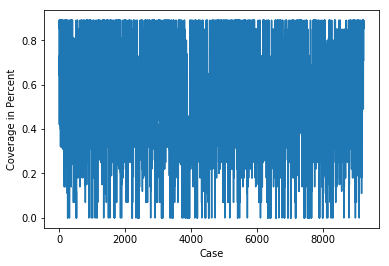

In [2]:
go(settings="hans_med", ambulances = 7, bases = 7)